# Introduction:
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# 1. Define Problem Statement and perform Exploratory Data Analysis

## 1.1. Definition of problem

### Problem statement

The company wants to understand and process the data coming out of data engineering
pipelines:

● Clean, sanitize and manipulate data to get useful features out of raw fields

    - Handle the missing values.
    - Aggregate the data to give a summary for each trip.
    - Extract place, city and state details from the given data.
    - Extract the different date and time components.
    - Handle outliers.
    - Create new features as neccessary

● Make sense out of the raw data and help the data science team to build forecasting
models on it.

    - Perform Hypothesis testing on the Actual time taken and the expected time to see if there is any significant difference between these.
    - Perform Hypothesis testing on the actual distance and the OSRM distances to see if there is any significant difference between these.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm 
import scipy.stats as stat
from sklearn.preprocessing import LabelEncoder 
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [2]:
import warnings  
warnings.filterwarnings('ignore') 

## 1.2. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If equired), missing value detection, statistical summary.

In [3]:
o_data = pd.read_csv("C:\\Users\\moncy\\Documents\\Scaler DSML MSc\\Projects\\Delhivery case study\\delhivery_data.csv")

## Basic data cleaning and exploration:
1. Handle missing values in the data.
2. Analyze the structure of the data.
3. Merge the rows.

In [4]:
o_data.shape

(144867, 24)

Observations:
1. There are 144867 rows and 24 columns in the dataset.

In [5]:
o_data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

### Features available in the dataset

### Column Profiling:

**data** - tells whether the data is testing or training data

**trip_creation_time** – Timestamp of trip creation

**route_schedule_uuid** – Unique Id for a particular route schedule

**route_type** – Transportation type. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way. Carting - Handling system consisting of small vehicles (carts)

**trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)

**source_center** - Source ID of trip origin

**source_name** - Source Name of trip origin

**destination_center** – Destination ID

**destination_name** – Destination Name

**od_start_time** - Trip start time

**od_end_time** – Trip end time

**start_scan_to_end_scan** – Time taken to deliver from source to destination

**is_cutoff** – Unknown field

**cutoff_factor** – Unknown field

**cutoff_timestamp** – Unknown field

**actual_distance_to_destination** – Distance in Kms between source and destination warehouse

**actual_time** – Actual time taken to complete the delivery (Cumulative)

**osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)

**osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)

**factor** – Unknown field

**segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery

**segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery

**segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery

**segment_factor** – Unknown field

In [6]:
o_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

Observations:
1. The features 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor' and 'segment_factor' are mentioned as 'Unknown field'. Hence these can be removed.

In [7]:
o_data[['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']].head()

is_cutoff  cutoff_factor            cutoff_timestamp    factor  \
0       True              9         2018-09-20 04:27:55  1.272727   
1       True             18         2018-09-20 04:17:55  1.200000   
2       True             27  2018-09-20 04:01:19.505586  1.428571   
3       True             36         2018-09-20 03:39:57  1.550000   
4      False             39         2018-09-20 03:33:55  1.545455   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000

In [8]:
df = o_data.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis = 1)

#### Checking data type

In [9]:
df.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0       11.0        11.9653                 14.0               11.0   
1       20.0        21.7243                 10.0                9.0   
2       28.0        32.5395                 16.0                7.0   
3       40.0        45.5620                 21.0               12.0   
4       44.0        54.2181                  6.0                5.0   

   segment_osrm_distance  
0                11.9653  
1                 9.7590  
2                10.8152  
3                13.0224  
4                 3.9153

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

Observations:
1. Some features that have datetime data are 'trip_creation_time', 'od_start_time', 'od_end_time'.

In [12]:
# Converting the date time features from object to datetime64[ns]
df[['trip_creation_time', 'od_start_time', 'od_end_time']] \
= df[['trip_creation_time', 'od_start_time', 'od_end_time']].astype('datetime64[ns]')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

##### Checking number of unique values in each categorical features

In [14]:
for col in df.columns:
    print(f"Number of unique values in {col} ==> {df[col].nunique()}.")

Number of unique values in data ==> 2.
Number of unique values in trip_creation_time ==> 14817.
Number of unique values in route_schedule_uuid ==> 1504.
Number of unique values in route_type ==> 2.
Number of unique values in trip_uuid ==> 14817.
Number of unique values in source_center ==> 1508.
Number of unique values in source_name ==> 1498.
Number of unique values in destination_center ==> 1481.
Number of unique values in destination_name ==> 1468.
Number of unique values in od_start_time ==> 26369.
Number of unique values in od_end_time ==> 26369.
Number of unique values in start_scan_to_end_scan ==> 1915.
Number of unique values in actual_distance_to_destination ==> 144515.
Number of unique values in actual_time ==> 3182.
Number of unique values in osrm_time ==> 1531.
Number of unique values in osrm_distance ==> 138046.
Number of unique values in segment_actual_time ==> 747.
Number of unique values in segment_osrm_time ==> 214.
Number of unique values in segment_osrm_distance ==> 

Observations:
1. The features 'data', 'route_type' have only 2 unique values. Hence these can be converted into 'category' data type.

In [15]:
# Converting 'data' and 'route_type' features into 'category' data type.
df[['data', 'route_type']] = df[['data', 'route_type']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [16]:
# Checking the memory occupied
prev_memory = df.memory_usage().sum()
prev_memory

19992026

Observations:
1. The memory storage utilized for the data set is 19992026 (19+ MB).
2. The float variables are stored as float64. Will check if those are required to be float64. We can see if we can reduce the storage memory.

In [17]:
float_features = list(df.dtypes[df.dtypes == 'float64'].index)
for col in float_features:
    print(f"Min value in {col} is {df[col].min()}")
    print(f"Max value in {col} is {df[col].max()}")
    print("-"*70)

Min value in start_scan_to_end_scan is 20.0
Max value in start_scan_to_end_scan is 7898.0
----------------------------------------------------------------------
Min value in actual_distance_to_destination is 9.00004535977208
Max value in actual_distance_to_destination is 1927.4477046975032
----------------------------------------------------------------------
Min value in actual_time is 9.0
Max value in actual_time is 4532.0
----------------------------------------------------------------------
Min value in osrm_time is 6.0
Max value in osrm_time is 1686.0
----------------------------------------------------------------------
Min value in osrm_distance is 9.0082
Max value in osrm_distance is 2326.1991000000003
----------------------------------------------------------------------
Min value in segment_actual_time is -244.0
Max value in segment_actual_time is 3051.0
----------------------------------------------------------------------
Min value in segment_osrm_time is 0.0
Max value in s

In [18]:
# Converting float64 into float32 for certain variables to reduce the memory occupation.
df[float_features] = df[float_features].astype('float32')

In [19]:
curr_memory = df.memory_usage().sum()
curr_memory

15356282

Observations:
1. Changing the float64 features into float32 reduced the memory usage from 19992026 to 15356282. This is a reduction of about 30% of memory usage.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [21]:
df.dtypes.value_counts()

float32           8
object            6
datetime64[ns]    3
category          1
category          1
Name: count, dtype: int64

Observations:
1. After making the neccessary convertions in the datatypes, there are 2 'category', 2 'datetime64[ns]', 6 'object' and 8 'float32' types of features available.

# 5. Missing values Treatment & Outlier treatment

In [23]:
df.isna().sum()/df.shape[0]*100

data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.202254
destination_center                0.000000
destination_name                  0.180165
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64

Observations:
1. The 'source_name' feature is missing 0.2% data.
2. The 'destination_name' feature is missing 0.18% data.
3. The 'data' variable contains values 'train' and 'test'. This indicates if a particular data will be used as training data or test data. It will make sence to separate the original dataset into train and test datasets.

In [24]:
#training dataset
tr_df = df[df['data'] == 'training']

#test dataset
ts_df = df[df['data'] == 'test']

print(f"Shape of original dataset : {df.shape}")
print(f"Shape of the training dataset : {tr_df.shape}")
print(f"Shape of the test dataset : {ts_df.shape}")

Shape of original dataset : (144867, 19)
Shape of the training dataset : (104858, 19)
Shape of the test dataset : (40009, 19)


In [25]:
print("missing data in training dataset:")
print("-"*35)
print(tr_df.isna().sum()/tr_df.shape[0] * 100)

missing data in training dataset:
-----------------------------------
data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.123024
destination_center                0.000000
destination_name                  0.095367
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64


Observation:
1. In the training dataset, the 'source_name' feature is missing 0.12% data.
2. The 'destination_name' feature is missing 0.095% data.

In [26]:
print("missing data in test dataset:")
print("-"*30)
print(ts_df.isna().sum()/ts_df.shape[0] * 100)

missing data in test dataset:
------------------------------
data                              0.000000
trip_creation_time                0.000000
route_schedule_uuid               0.000000
route_type                        0.000000
trip_uuid                         0.000000
source_center                     0.000000
source_name                       0.409908
destination_center                0.000000
destination_name                  0.402409
od_start_time                     0.000000
od_end_time                       0.000000
start_scan_to_end_scan            0.000000
actual_distance_to_destination    0.000000
actual_time                       0.000000
osrm_time                         0.000000
osrm_distance                     0.000000
segment_actual_time               0.000000
segment_osrm_time                 0.000000
segment_osrm_distance             0.000000
dtype: float64


Observation:
1. In the test dataset, the 'source_name' feature is missing 0.4% data.
2. The 'destination_name' feature is missing 0.4% data.

In [27]:
print("In the training dataset:")
print("-"*25)
print(f"The most frequent source_name used in the dataset is '{tr_df['source_name'].mode()[0]}'. Its used {tr_df['source_name'][tr_df['source_name'] == tr_df['source_name'].mode()[0]].count()} times in the dataset.")
print(f"The most frequent destination_name used in the dataset is '{tr_df['destination_name'].mode()[0]}'. Its used {tr_df['destination_name'][tr_df['destination_name'] == tr_df['destination_name'].mode()[0]].count()} times in the dataset.")
print(f"The source_center of the most frequent source_name is '{tr_df['source_center'][tr_df['source_name'] == tr_df['source_name'].mode()[0]].unique()[0]}'.")
print(f"The destination_center of the most frequent destination_name is ''{tr_df['destination_center'][tr_df['destination_name'] == tr_df['destination_name'].mode()[0]].unique()[0]}'.")

In the training dataset:
-------------------------
The most frequent source_name used in the dataset is 'Gurgaon_Bilaspur_HB (Haryana)'. Its used 16472 times in the dataset.
The most frequent destination_name used in the dataset is 'Gurgaon_Bilaspur_HB (Haryana)'. Its used 11422 times in the dataset.
The source_center of the most frequent source_name is 'IND000000ACB'.
The destination_center of the most frequent destination_name is ''IND000000ACB'.


Observations:
1. The most frequent source_name and the destination_name used in the dataset is 'Gurgaon_Bilaspur_HB (Haryana)'. It is already used 23347 times and 15192 times respectively.
2. The source_center and the destination_center of the most frequent source_name and destination_name is 'IND000000ACB'.

In [28]:
datasets = [df, tr_df, ts_df]
counter = 0
dataset_names = ['original', 'training', 'test']
for dataset in datasets:
    print(f"In the {dataset_names[counter]} dataset:")
    counter += 1
    print("-"*25)
    missing_source = sorted(list(dataset[dataset['source_name'].isna()]['source_center'].value_counts().index))
    missing_destination = sorted(list(dataset[dataset['destination_name'].isna()]['destination_center'].value_counts().index))
    print(f"Number of missing Source names => {len(missing_source)}")
    print(f"The source_center that are missing the source_names are:\n{missing_source}")
    print()
    print(f"Number of missing Destination names => {len(missing_destination)}")
    print(f"The destination_center that are missing the destination_names are:\n{missing_destination}")
    print("="*125)

In the original dataset:
-------------------------
Number of missing Source names => 10
The source_center that are missing the source_names are:
['IND126116AAA', 'IND282002AAD', 'IND331022A1B', 'IND342902A1B', 'IND465333A1B', 'IND505326AAB', 'IND509103AAC', 'IND577116AAA', 'IND841301AAC', 'IND852118A1B']

Number of missing Destination names => 13
The destination_center that are missing the destination_names are:
['IND122015AAC', 'IND126116AAA', 'IND221005A1A', 'IND250002AAC', 'IND282002AAD', 'IND331001A1C', 'IND342902A1B', 'IND465333A1B', 'IND505326AAB', 'IND509103AAC', 'IND577116AAA', 'IND841301AAC', 'IND852118A1B']
In the training dataset:
-------------------------
Number of missing Source names => 8
The source_center that are missing the source_names are:
['IND282002AAD', 'IND331022A1B', 'IND342902A1B', 'IND465333A1B', 'IND505326AAB', 'IND509103AAC', 'IND577116AAA', 'IND841301AAC']

Number of missing Destination names => 10
The destination_center that are missing the destination_nam

Observations:
1. In the original dataset, 10 Source centers are missing Source names.
2. In the training dataset, among the 10 Source centers from the original dataset, only 8 Source centers are assigned to training dataset.
3. In the test dataset, among the 10 Source centers from the original dataset, only 7 Source centers are assigned to training dataset.
4. In the original dataset, 13 destination centers are missing Source names.
5. In the training dataset, among the 13 destination centers from the original dataset, only 10 destination centers are assigned to training dataset.
6. In the test dataset, among the 13 destination centers from the original dataset, only 9 destination centers are assigned to training dataset.
7. Since it is possible to know the source and destination centers in the real world, we can use the Source centers from the original dataset to create custom locations to fill the missing values.

In [29]:
missing_centers = list(set(list(df[df['source_name'].isna()]['source_center'].value_counts().index) + list(df[df['destination_name'].isna()]['destination_center'].value_counts().index)))
print(f"All the centers that are missing a source_name/destination_name are:\n{missing_centers}")

All the centers that are missing a source_name/destination_name are:
['IND465333A1B', 'IND852118A1B', 'IND126116AAA', 'IND282002AAD', 'IND342902A1B', 'IND331022A1B', 'IND577116AAA', 'IND509103AAC', 'IND221005A1A', 'IND505326AAB', 'IND250002AAC', 'IND122015AAC', 'IND331001A1C', 'IND841301AAC']


In [30]:
for cntr in missing_centers:
    print(f"Number of rows for {cntr} with non null source_name is {df[(df['source_center'] == cntr) & (~df['source_name'].isna())].shape[0]}")

Number of rows for IND465333A1B with non null source_name is 0
Number of rows for IND852118A1B with non null source_name is 0
Number of rows for IND126116AAA with non null source_name is 0
Number of rows for IND282002AAD with non null source_name is 0
Number of rows for IND342902A1B with non null source_name is 0
Number of rows for IND331022A1B with non null source_name is 0
Number of rows for IND577116AAA with non null source_name is 0
Number of rows for IND509103AAC with non null source_name is 0
Number of rows for IND221005A1A with non null source_name is 0
Number of rows for IND505326AAB with non null source_name is 0
Number of rows for IND250002AAC with non null source_name is 0
Number of rows for IND122015AAC with non null source_name is 0
Number of rows for IND331001A1C with non null source_name is 0
Number of rows for IND841301AAC with non null source_name is 0


In [31]:
for cntr in missing_centers:
    print(f"Number of rows for {cntr} with non null destination_name is {df[(df['destination_center'] == cntr) & (~df['destination_name'].isna())].shape[0]}")

Number of rows for IND465333A1B with non null destination_name is 0
Number of rows for IND852118A1B with non null destination_name is 0
Number of rows for IND126116AAA with non null destination_name is 0
Number of rows for IND282002AAD with non null destination_name is 0
Number of rows for IND342902A1B with non null destination_name is 0
Number of rows for IND331022A1B with non null destination_name is 0
Number of rows for IND577116AAA with non null destination_name is 0
Number of rows for IND509103AAC with non null destination_name is 0
Number of rows for IND221005A1A with non null destination_name is 0
Number of rows for IND505326AAB with non null destination_name is 0
Number of rows for IND250002AAC with non null destination_name is 0
Number of rows for IND122015AAC with non null destination_name is 0
Number of rows for IND331001A1C with non null destination_name is 0
Number of rows for IND841301AAC with non null destination_name is 0


Observations:
1. There are no non-null source_name/destination name for the these centers.
2. It would make sense to come up with custom names for these centers. Since there are not even a single non null row we can be sure that no data will be overridden by this update.

#### Filling the missing values.

In [32]:
# creating a dictionary with new names for the missing centers
missing_centers_dict = dict()
count = 1
for k in missing_centers:
    missing_centers_dict[k] = 'location_'+str(count)
    count += 1

missing_centers_dict

{'IND465333A1B': 'location_1',
 'IND852118A1B': 'location_2',
 'IND126116AAA': 'location_3',
 'IND282002AAD': 'location_4',
 'IND342902A1B': 'location_5',
 'IND331022A1B': 'location_6',
 'IND577116AAA': 'location_7',
 'IND509103AAC': 'location_8',
 'IND221005A1A': 'location_9',
 'IND505326AAB': 'location_10',
 'IND250002AAC': 'location_11',
 'IND122015AAC': 'location_12',
 'IND331001A1C': 'location_13',
 'IND841301AAC': 'location_14'}

In [33]:
#checking the rows that are missing source_name or destination_name before filling
criteria = ((df['source_center'].isin(missing_centers)) | (df['destination_center'].isin(missing_centers))) & \
(df['source_name'].isna() | (df['destination_name'].isna()))
df[criteria].head()

data         trip_creation_time  \
110  training 2018-09-25 08:53:04.377810   
111  training 2018-09-25 08:53:04.377810   
112  training 2018-09-25 08:53:04.377810   
113  training 2018-09-25 08:53:04.377810   
114  training 2018-09-25 08:53:04.377810   

                                   route_schedule_uuid route_type  \
110  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
112  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   

                   trip_uuid source_center                       source_name  \
110  trip-153786558437756691  IND342601AAA  Piparcity_BsstdDPP_D (Rajasthan)   
111  trip-153786558437756691  IND342601AAA  Piparcity_BsstdDPP_D (Rajasthan)   
112  trip-153786558437756691  IND342902A1B                               NaN   
113  trip-153786558437756691  IND342902A1B                               NaN   
114  trip-153786558437756691  IND342902A1B                               NaN   

    destination_center        destination_name              od_start_time  \
110       IND342902A1B                     NaN 2018-09-26 05:04:49.254901   
111       IND342902A1B                     NaN 2018-09-26 05:04:49.254901   
112       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
113       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
114       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   

                   od_end_time  start_scan_to_end_scan  \
110 2018-09-26 06:58:08.054001                   113.0   
111 2018-09-26 06:58:08.054001                   113.0   
112 2018-09-26 15:54:14.280942                   536.0   
113 2018-09-26 15:54:14.280942                   536.0   
114 2018-09-26 15:54:14.280942                   536.0   

     actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
110                       24.538214         58.0       33.0      30.884501   
111                       34.657707        110.0       43.0      41.536098   
112                       22.783440         48.0       34.0      37.774899   
113                       46.071251         98.0       41.0      56.357498   
114                       67.714996        127.0       58.0      80.481102   

     segment_actual_time  segment_osrm_time  segment_osrm_distance  
110                 58.0               33.0              30.884501  
111                 52.0               10.0              10.651700  
112                 48.0               34.0              37.774899  
113                 49.0               33.0              34.166100  
114                 29.0               17.0              24.123600

In [34]:
for k, v in missing_centers_dict.items():
    df.loc[df['source_center'] == k, 'source_name'] = v
    df.loc[df['destination_center'] == k, 'destination_name'] = v
df[criteria].head()

data         trip_creation_time  \
110  training 2018-09-25 08:53:04.377810   
111  training 2018-09-25 08:53:04.377810   
112  training 2018-09-25 08:53:04.377810   
113  training 2018-09-25 08:53:04.377810   
114  training 2018-09-25 08:53:04.377810   

                                   route_schedule_uuid route_type  \
110  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
111  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
112  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
113  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   
114  thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...        FTL   

                   trip_uuid source_center                       source_name  \
110  trip-153786558437756691  IND342601AAA  Piparcity_BsstdDPP_D (Rajasthan)   
111  trip-153786558437756691  IND342601AAA  Piparcity_BsstdDPP_D (Rajasthan)   
112  trip-153786558437756691  IND342902A1B                        location_5   
113  trip-153786558437756691  IND342902A1B                        location_5   
114  trip-153786558437756691  IND342902A1B                        location_5   

    destination_center        destination_name              od_start_time  \
110       IND342902A1B              location_5 2018-09-26 05:04:49.254901   
111       IND342902A1B              location_5 2018-09-26 05:04:49.254901   
112       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
113       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   
114       IND302014AAA  Jaipur_Hub (Rajasthan) 2018-09-26 06:58:08.054001   

                   od_end_time  start_scan_to_end_scan  \
110 2018-09-26 06:58:08.054001                   113.0   
111 2018-09-26 06:58:08.054001                   113.0   
112 2018-09-26 15:54:14.280942                   536.0   
113 2018-09-26 15:54:14.280942                   536.0   
114 2018-09-26 15:54:14.280942                   536.0   

     actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
110                       24.538214         58.0       33.0      30.884501   
111                       34.657707        110.0       43.0      41.536098   
112                       22.783440         48.0       34.0      37.774899   
113                       46.071251         98.0       41.0      56.357498   
114                       67.714996        127.0       58.0      80.481102   

     segment_actual_time  segment_osrm_time  segment_osrm_distance  
110                 58.0               33.0              30.884501  
111                 52.0               10.0              10.651700  
112                 48.0               34.0              37.774899  
113                 49.0               33.0              34.166100  
114                 29.0               17.0              24.123600

In [35]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

Observations:
1. Now that the missing values in the original dataset are handled, we can update the training and test datasets

In [36]:
# Separating training and test data
tr_df = df[df['data'] == 'training']
ts_df = df[df['data'] == 'test']
df.shape, tr_df.shape, ts_df.shape

((144867, 19), (104858, 19), (40009, 19))

#### Statistical Summary

In [37]:
tr_df.describe(include = 'category').T

count unique       top    freq
data        104858      1  training  104858
route_type  104858      2       FTL   73108

Observations:
1. There are two categories in the route_type feature.
2. The most frequent route_type in the training dataset is 'FTL' which occures 73108 times in the dataset.

In [38]:
ts_df.describe(include = 'category').T

count unique   top   freq
data        40009      1  test  40009
route_type  40009      2   FTL  26552

Observations:
1. There are two categories in the route_type feature.
2. The most frequent route_type in the training dataset is 'FTL' which occures 26552 times in the dataset.

In [39]:
tr_df.describe(include = 'object').T

count unique  \
route_schedule_uuid  104858   1385   
trip_uuid            104858  10654   
source_center        104858   1425   
source_name          104858   1425   
destination_center   104858   1409   
destination_name     104858   1409   

                                                                   top   freq  
route_schedule_uuid  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...   1280  
trip_uuid                                      trip-153741795740530104    101  
source_center                                             IND000000ACB  16472  
source_name                              Gurgaon_Bilaspur_HB (Haryana)  16472  
destination_center                                        IND000000ACB  11422  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)  11422

Observations:

In Training dataset

1. In the route_schedule_uuid, there are 1385 unique value and the most frequent value is occuring 1280 times in the dataset.
2. In trip_uuid, there are 10654 unique values. The most frequent value is 'trip-153741795740530104' which occurs 101 times in the dataset.
3. In source_center, there are 1425 unique values. The most frequent value is 'IND000000ACB' which occurs 16472 times in the dataset.
4. In source_name, there are 1425 unique values. The most frequent value is 'Gurgaon_Bilaspur_HB (Haryana)' which occurs 16472 times in the dataset.
5. In destination_center, there are 1409 unique values. The most frequent value is 'IND000000ACB' which occurs 11422 times in the dataset.
6. In destination_name, there are 1409 unique values. The most frequent value is 'Gurgaon_Bilaspur_HB (Haryana)' which occurs 11422 times in the dataset.

In [40]:
ts_df.describe(include = 'object').T

count unique  \
route_schedule_uuid  40009    981   
trip_uuid            40009   4163   
source_center        40009   1140   
source_name          40009   1140   
destination_center   40009   1116   
destination_name     40009   1116   

                                                                   top  freq  
route_schedule_uuid  thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...   657  
trip_uuid                                      trip-153854305492910872   101  
source_center                                             IND000000ACB  6875  
source_name                              Gurgaon_Bilaspur_HB (Haryana)  6875  
destination_center                                        IND000000ACB  3770  
destination_name                         Gurgaon_Bilaspur_HB (Haryana)  3770

Observations:

In Test dataset

1. In the route_schedule_uuid, there are 981 unique value and the most frequent value is occuring 657 times in the dataset.
2. In trip_uuid, there are 4163 unique values. The most frequent value is 'trip-153854305492910872' which occurs 101 times in the dataset.
3. In source_center, there are 1140 unique values. The most frequent value is 'IND000000ACB' which occurs 6875 times in the dataset.
4. In source_name, there are 1140 unique values. The most frequent value is 'Gurgaon_Bilaspur_HB (Haryana)' which occurs 6875 times in the dataset.
5. In destination_center, there are 1116 unique values. The most frequent value is 'IND000000ACB' which occurs 3770 times in the dataset.
6. In destination_name, there are 1116 unique values. The most frequent value is 'Gurgaon_Bilaspur_HB (Haryana)' which occurs 3770 times in the dataset.

In [41]:
tr_df.describe(include='datetime').T

count                          mean  \
trip_creation_time  104858 2018-09-19 12:35:57.021297664   
od_start_time       104858 2018-09-19 16:57:22.999616512   
od_end_time         104858 2018-09-20 08:42:49.942113536   

                                          min                           25%  \
trip_creation_time 2018-09-12 00:00:16.535741 2018-09-15 19:38:34.268471040   
od_start_time      2018-09-12 00:00:16.535741 2018-09-15 23:11:02.310111744   
od_end_time        2018-09-12 00:50:10.814399 2018-09-16 14:22:32.328868096   

                                             50%  \
trip_creation_time 2018-09-19 14:47:43.719651072   
od_start_time      2018-09-19 19:11:14.956966912   
od_end_time        2018-09-20 08:01:53.835889920   

                                             75%                        max  
trip_creation_time 2018-09-23 02:41:57.706321920 2018-09-26 23:54:27.945614  
od_start_time      2018-09-23 07:33:18.577252096 2018-09-29 03:12:56.095056  
od_end_time        2018-09-24 02:31:18.395973120 2018-09-29 17:37:35.478498

Observations:

In Training dataset
1. The trip_creation_time, ranges between 12-sep-2018 and 26-sep-2018.
2. The average and the median trip_creation_time is 19-sep-2018.
3. The od_start_time, ranges between 12-sep-2018 and 29-sep-2018.
4. The average and the median od_start_time is 19-sep-2018.
5. The od_end_time, ranges between 12-sep-2018 and 29-sep-2018.
6. The average and the median od_end_time is 20-sep-2018.

In [42]:
ts_df.describe(include='datetime').T

count                          mean  \
trip_creation_time  40009 2018-09-30 12:49:41.060956160   
od_start_time       40009 2018-09-30 17:36:14.103224064   
od_end_time         40009 2018-10-01 10:20:44.411163904   

                                          min                           25%  \
trip_creation_time 2018-09-27 00:02:18.970980 2018-09-28 19:34:54.825426944   
od_start_time      2018-09-27 00:02:18.970980 2018-09-29 00:41:49.032058880   
od_end_time        2018-09-27 01:12:44.883134 2018-09-29 13:32:40.672951040   

                                             50%  \
trip_creation_time 2018-09-30 15:56:45.697984000   
od_start_time      2018-09-30 18:59:56.924720128   
od_end_time        2018-10-01 09:08:35.067476992   

                                             75%                        max  
trip_creation_time 2018-10-02 05:42:47.612101120 2018-10-03 23:59:42.701692  
od_start_time      2018-10-02 12:56:24.877600000 2018-10-06 04:27:23.392375  
od_end_time        2018-10-03 05:15:30.943389952 2018-10-08 03:00:24.353479

Observations:

In Test dataset

1. The trip_creation_time, ranges between 27-sep-2018 and 03-oct-2018.
2. The average and the median trip_creation_time is 30-sep-2018.
3. The od_start_time, ranges between 27-sep-2018 and 06-oct-2018.
4. The average and the median od_start_time is 30-sep-2018.
5. The od_end_time, ranges between 27-sep-2018 and 08-oct-2018.
6. The average and the median od_end_time is 01-oct-2018.

In [43]:
tr_df.describe(include = 'float').T

count        mean          std         min  \
start_scan_to_end_scan          104858.0  944.954224  1017.591064   20.000000   
actual_distance_to_destination  104858.0  230.286728   339.500519    9.000267   
actual_time                     104858.0  410.314240   587.562622    9.000000   
osrm_time                       104858.0  210.743439   303.417206    6.000000   
osrm_distance                   104858.0  280.215637   414.804840    9.008200   
segment_actual_time             104858.0   36.393951    52.651733 -244.000000   
segment_osrm_time               104858.0   18.631512    15.039765    0.000000   
segment_osrm_distance           104858.0   22.955750    18.299019    0.000000   

                                       25%         50%          75%  \
start_scan_to_end_scan          165.000000  453.000000  1579.000000   
actual_distance_to_destination   23.702353   66.383465   270.843536   
actual_time                      53.000000  134.000000   498.000000   
osrm_time                        28.000000   66.000000   250.000000   
osrm_distance                    30.558324   79.847702   330.617844   
segment_actual_time              20.000000   29.000000    41.000000   
segment_osrm_time                11.000000   17.000000    23.000000   
segment_osrm_distance            12.269725   23.576950    27.939650   

                                        max  
start_scan_to_end_scan          4535.000000  
actual_distance_to_destination  1927.447754  
actual_time                     4532.000000  
osrm_time                       1686.000000  
osrm_distance                   2326.199219  
segment_actual_time             3051.000000  
segment_osrm_time               1611.000000  
segment_osrm_distance           2191.403809

Observations:

In Training dataset

1. The start_scan_to_end_scan, ranges between 20 and 4535.
2. The average start_scan_to_end_scan is 944.95 and the median start_scan_to_end_scan is 453. The distribution is right skewed or positively skewed.
3. The actual_distance_to_destination, ranges between 9 and 1927.4.
4. The average actual_distance_to_destination is 230.3 and the median actual_distance_to_destination is 66.4. The distribution is right skewed or positively skewed.
5. The actual_time, ranges between 9 and 4532.
6. The average actual_time is 410.3 and the median actual_time is 134. The distribution is right skewed or positively skewed.
7. The osrm_time, ranges between 6 and 1686.
8. The average osrm_time is 210.7 and the median osrm_time is 66. The distribution is right skewed or positively skewed.
9. The osrm_distance, ranges between 9 and 2326.2.
10. The average osrm_distance is 280.2 and the median osrm_distance is 79.8. The distribution is right skewed or positively skewed.
11. The segment_actual_time, ranges between -244 and 3051.
12. The average segment_actual_time is 36.4 and the median segment_actual_time is 29. The distribution is right skewed or positively skewed.
13. The segment_osrm_time, ranges between 0 and 1611.
14. The average segment_osrm_time is 18.6 and the median segment_osrm_time is 17. The distribution is slightly right skewed or slightly positively skewed.
15. The segment_osrm_distance, ranges between 0 and 2191.
16. The average segment_osrm_distance is 22.96 and the median segment_osrm_distance is 23.6. The distribution is slightly left skewed or slightly negatively skewed.

In [44]:
ts_df.describe(include = 'float').T

count         mean          std        min  \
start_scan_to_end_scan          40009.0  1004.006287  1085.118530  27.000000   
actual_distance_to_destination  40009.0   243.997650   358.793854   9.000046   
actual_time                     40009.0   434.259979   624.562439   9.000000   
osrm_time                       40009.0   222.058014   319.596985   6.000000   
osrm_distance                   40009.0   296.711090   437.016205   9.051000   
segment_actual_time             40009.0    35.677597    55.906509  -5.000000   
segment_osrm_time               40009.0    18.182659    14.056093   0.000000   
segment_osrm_distance           40009.0    22.496876    16.652781   0.000000   

                                       25%         50%          75%  \
start_scan_to_end_scan          152.000000  441.000000  1824.000000   
actual_distance_to_destination   22.649893   60.842098   309.966034   
actual_time                      48.000000  124.000000   558.000000   
osrm_time                        25.000000   60.000000   282.000000   
osrm_distance                    28.437300   74.369400   379.306305   
segment_actual_time              19.000000   28.000000    39.000000   
segment_osrm_time                10.000000   17.000000    22.000000   
segment_osrm_distance            11.627700   23.349100    27.463900   

                                        max  
start_scan_to_end_scan          7898.000000  
actual_distance_to_destination  1720.910400  
actual_time                     4154.000000  
osrm_time                       1610.000000  
osrm_distance                   2190.049805  
segment_actual_time             2541.000000  
segment_osrm_time                481.000000  
segment_osrm_distance            642.018127

Observations:

In Test dataset

1. The start_scan_to_end_scan, ranges between 27 and 7898.
2. The average start_scan_to_end_scan is 1004 and the median start_scan_to_end_scan is 441. The distribution is right skewed or positively skewed.
3. The actual_distance_to_destination, ranges between 9 and 1720.9.
4. The average actual_distance_to_destination is 243.998 and the median actual_distance_to_destination is 60.84. The distribution is right skewed or positively skewed.
5. The actual_time, ranges between 9 and 4154.
6. The average actual_time is 434.26 and the median actual_time is 124. The distribution is right skewed or positively skewed.
7. The osrm_time, ranges between 6 and 1610.
8. The average osrm_time is 222.06 and the median osrm_time is 60. The distribution is right skewed or positively skewed.
9. The osrm_distance, ranges between 9.05 and 2190.
10. The average osrm_distance is 296.71 and the median osrm_distance is 74.4. The distribution is right skewed or positively skewed.
11. The segment_actual_time, ranges between -5 and 2541.
12. The average segment_actual_time is 35.68 and the median segment_actual_time is 28. The distribution is right skewed or positively skewed.
13. The segment_osrm_time, ranges between 0 and 421.
14. The average segment_osrm_time is 18.18 and the median segment_osrm_time is 17. The distribution is slightly right skewed or slightly positively skewed.
15. The segment_osrm_distance, ranges between 0 and 642.02.
16. The average segment_osrm_distance is 22.4 and the median segment_osrm_distance is 23.35. The distribution is slightly left skewed or slightly negatively skewed.

In [45]:
tr_df['trip_creation_time'].min(), tr_df['trip_creation_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-09-26 23:54:27.945614'))

Observations:
1. The data is available for trips between '2018-09-12' and '2018-09-26'.

In [46]:
ts_df['trip_creation_time'].min(), ts_df['trip_creation_time'].max()

(Timestamp('2018-09-27 00:02:18.970980'),
 Timestamp('2018-10-03 23:59:42.701692'))

Observations:
1. The data is available for trips between '2018-09-27' and '2018-10-03'.

## 3. Merging of rows and aggregation of fields

In [47]:
# Grouping and Aggregating the data
group1 = ['trip_uuid', 'source_center', 'destination_center']
aggregation_dict = {'data' : 'first', 
                    'trip_creation_time': 'first', 
                    'route_type' : 'first',
                    'source_name' : 'first',
                    'destination_name' : 'first', 
                    'od_start_time' : 'first', 
                    'od_end_time': 'last',
                    'start_scan_to_end_scan' : 'first', 
                    'actual_distance_to_destination' : 'last',
                    'actual_time' : 'last', 
                    'osrm_time' : 'last', 
                    'osrm_distance' : 'last', 
                    'segment_actual_time' : 'sum',
                    'segment_osrm_time' : 'sum', 'segment_osrm_distance' : 'sum'}

# creating aggregated data based on 'trip_uuid', 'source_center' and 'destination_center'
tr_df_grouped1 = tr_df.groupby(by = group1).aggregate(aggregation_dict)
ts_df_grouped1 = ts_df.groupby(by = group1).aggregate(aggregation_dict)
tr_df_grouped1 = tr_df_grouped1.reset_index()
ts_df_grouped1 = ts_df_grouped1.reset_index()

##### Calculating the total time taken for a delivery from Source to Destination
Calculate the time taken between od_start_time and od_end_time and keep it as a feature.

In [48]:
def get_total_mins(time):
    return round(time.total_seconds() / 60, 2)

In [49]:
# creating od_total time and converting it to minutes in training dataset
tr_df_grouped1['od_total_time'] = tr_df_grouped1['od_end_time'] - tr_df_grouped1['od_start_time']
tr_df_grouped1['od_total_time'] = tr_df_grouped1['od_total_time'].apply(get_total_mins)

# creating od_total time and converting it to minutes in test dataset
ts_df_grouped1['od_total_time'] = ts_df_grouped1['od_end_time'] - ts_df_grouped1['od_start_time']
ts_df_grouped1['od_total_time'] = ts_df_grouped1['od_total_time'].apply(get_total_mins)

In [50]:
tr_df_grouped1[group1+['od_total_time']].head()

trip_uuid source_center destination_center  od_total_time
0  trip-153671041653548748  IND209304AAA       IND000000ACB        1260.60
1  trip-153671041653548748  IND462022AAA       IND209304AAA         999.51
2  trip-153671042288605164  IND561203AAB       IND562101AAA          58.83
3  trip-153671042288605164  IND572101AAA       IND561203AAB         122.78
4  trip-153671043369099517  IND000000ACB       IND160002AAC         834.64

In [51]:
#grouping the df_grouped1 by just trip_uuid
aggregation_dict = {'data' : 'first', 
                    'trip_creation_time': 'first', 
                    'route_type' : 'first',
                    'source_name' : 'first',
                    'source_center' : 'first',
                    'destination_name' : 'last', 
                    'destination_center' : 'last',
                    'od_total_time' : 'sum',
                    'start_scan_to_end_scan' : 'sum', 
                    'actual_distance_to_destination' : 'sum',
                    'actual_time' : 'sum', 
                    'osrm_time' : 'sum', 
                    'osrm_distance' : 'sum', 
                    'segment_actual_time' : 'sum',
                    'segment_osrm_time' : 'sum', 
                    'segment_osrm_distance' : 'sum'}
tr_df_tripid_grouped = tr_df_grouped1.groupby(by = 'trip_uuid').aggregate(aggregation_dict)
tr_df_tripid_grouped = tr_df_tripid_grouped.reset_index()

ts_df_tripid_grouped = ts_df_grouped1.groupby(by = 'trip_uuid').aggregate(aggregation_dict)
ts_df_tripid_grouped = ts_df_tripid_grouped.reset_index()

In [52]:
tr_df_tripid_grouped.shape, tr_df_grouped1.shape,tr_df.shape

((10654, 17), (18947, 19), (104858, 19))

In [55]:
print(f"About {round((tr_df.shape[0] - tr_df_tripid_grouped.shape[0])/tr_df.shape[0]*100,2)}\
% of rows in training dataset reduced as part of aggregation.")

About 89.84% of rows in training dataset reduced as part of aggregation.


In [56]:
ts_df_tripid_grouped.shape, ts_df_grouped1.shape,ts_df.shape

((4163, 17), (7421, 19), (40009, 19))

In [58]:
print(f"About {round((ts_df.shape[0] - ts_df_tripid_grouped.shape[0])/ts_df.shape[0]*100,2)}\
% of rows in test dataset reduced as part of aggregation.")

About 89.59% of rows in test dataset reduced as part of aggregation.


## 1.3. Visual Analysis (distribution plots of all the continuous variable(s), boxplots of all the categorical variables)
## 1.4. Insights based on EDA
            1. Comments on range of attributes, outliers of various attributes
            2. Comments on the distribution of the variables and relationship between them
            3. Comments for each univariate and bivariate plot

##### Used the training data for visual analysis.

In [59]:
tr_df_tripid_grouped.head()

trip_uuid      data         trip_creation_time route_type  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741        FTL   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430    Carting   
2  trip-153671043369099517  training 2018-09-12 00:00:33.691250        FTL   
3  trip-153671046011330457  training 2018-09-12 00:01:00.113710    Carting   
4  trip-153671052974046625  training 2018-09-12 00:02:09.740725        FTL   

                          source_name source_center  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  IND209304AAA   
1   Doddablpur_ChikaDPP_D (Karnataka)  IND561203AAB   
2       Gurgaon_Bilaspur_HB (Haryana)  IND000000ACB   
3            Mumbai Hub (Maharashtra)  IND400072AAB   
4              Bellary_Dc (Karnataka)  IND583101AAA   

                     destination_name destination_center  od_total_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA        2260.11   
1   Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB         181.61   
2       Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB        3934.36   
3      Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA         100.49   
4       Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA         718.34   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                  2259.0                      824.732849       1562.0   
1                   180.0                       73.186905        143.0   
2                  3933.0                     1927.404297       3347.0   
3                   100.0                       17.175274         59.0   
4                   717.0                      127.448502        341.0   

   osrm_time  osrm_distance  segment_actual_time  segment_osrm_time  \
0      717.0     991.352295               1548.0             1008.0   
1       68.0      85.111000                141.0               65.0   
2     1740.0    2354.066650               3308.0             1941.0   
3       15.0      19.680000                 59.0               16.0   
4      117.0     146.791794                340.0              115.0   

   segment_osrm_distance  
0            1320.473267  
1              84.189400  
2            2545.267822  
3              19.876600  
4             146.791901

In [60]:
print("Continuous variables are:")
tr_df.dtypes[tr_df.dtypes == 'float32'].index

Continuous variables are:


Index(['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

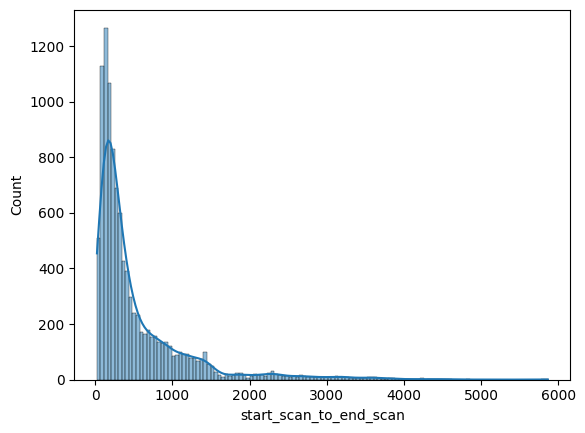

In [61]:
sns.histplot(data = tr_df_tripid_grouped, x = 'start_scan_to_end_scan', kde = True)
plt.show()

Observations:
1. The start_scan_to_end_scan variable is right skewed and not normal distribution.
2. Most of the data is less than 1000.

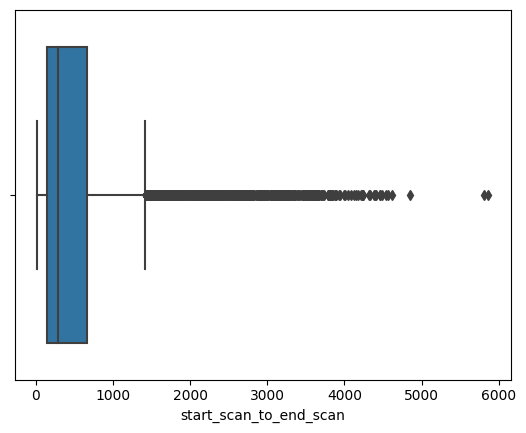

In [62]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'start_scan_to_end_scan')
plt.show()

Observations:
1. There are some outliers present in the start_scan_to_end_scan variable.

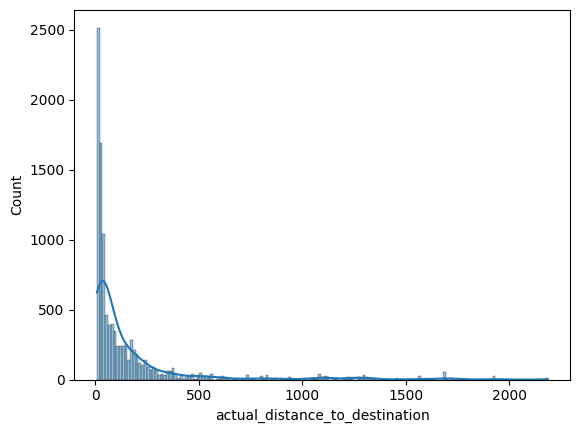

In [63]:
sns.histplot(data = tr_df_tripid_grouped, x = 'actual_distance_to_destination', kde = True)
plt.show()

Observations:
1. The actual_distance_to_destination variable is right skewed and not normal distribution.
2. Most of the data is less than 200.

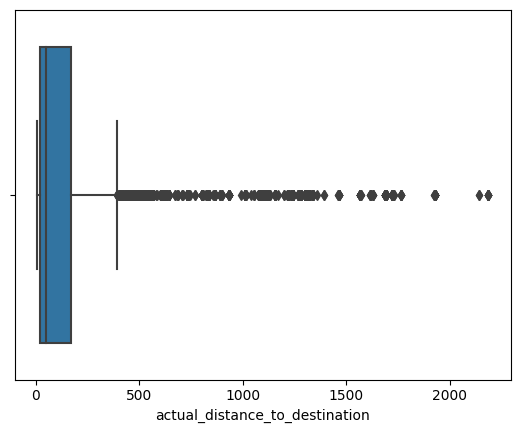

In [64]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'actual_distance_to_destination')
plt.show()

Observations:
1. There are outliers present in the actual_distance_to_destination variable.

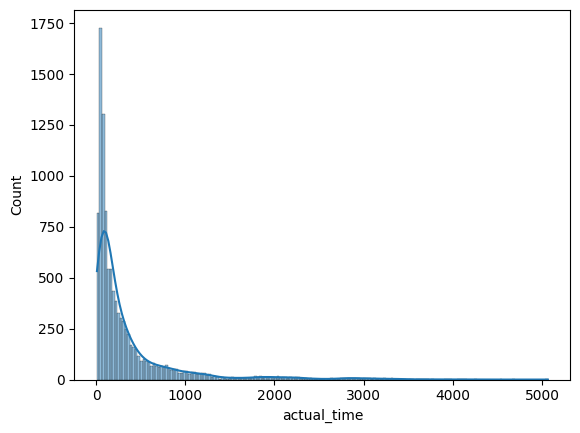

In [65]:
sns.histplot(data = tr_df_tripid_grouped, x = 'actual_time', kde = True)
plt.show()

Observations:
1. The actual_time variable is right skewed and not normal distribution.
2. Most of the data is less than 500.

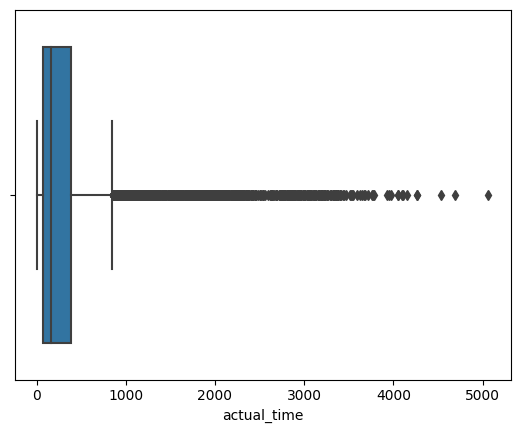

In [66]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'actual_time')
plt.show()

Observations:
1. There are outliers present in the actual_time variable.

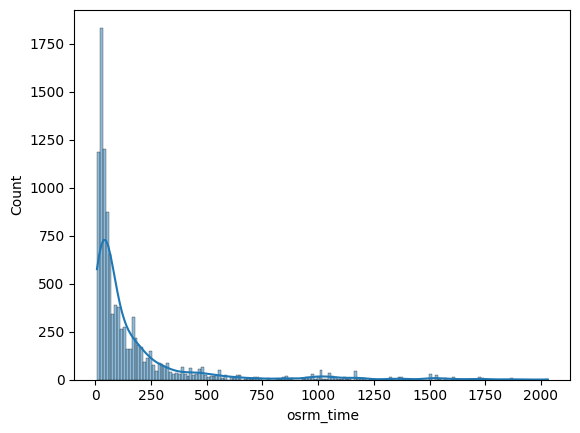

In [67]:
sns.histplot(data = tr_df_tripid_grouped, x = 'osrm_time', kde = True)
plt.show()

Observations:
1. The osrm_time variable is right skewed and not normal distribution.
2. Most of the data is less than 200.

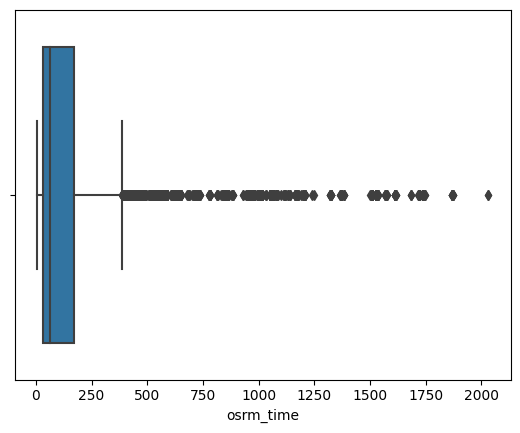

In [68]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'osrm_time')
plt.show()

Observations:
1. There are outliers present in the osrm_time variable.

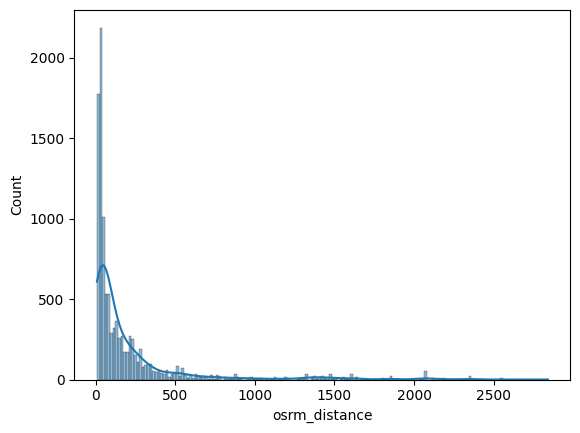

In [69]:
sns.histplot(data = tr_df_tripid_grouped, x = 'osrm_distance', kde = True)
plt.show()

Observations:
1. The osrm_distance variable is right skewed and not normal distribution.
2. Most of the data is less than 200.

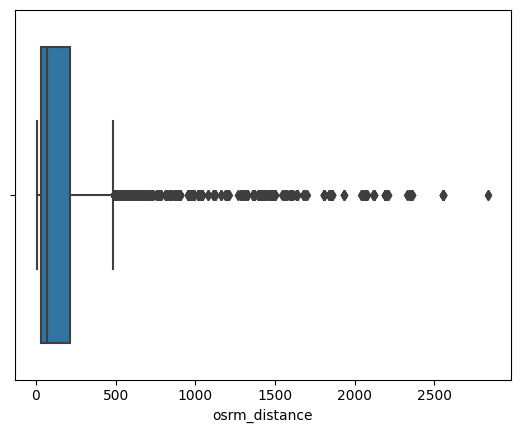

In [70]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'osrm_distance')
plt.show()

Observations:
1. There are outliers present in the osrm_distance variable.

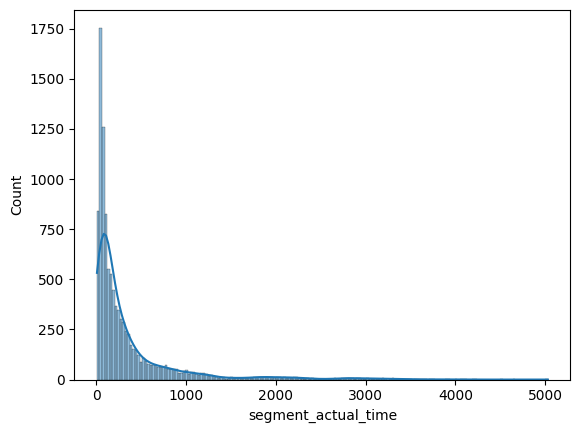

In [71]:
sns.histplot(data = tr_df_tripid_grouped, x = 'segment_actual_time', kde = True)
plt.show()

Observations:
1. The segment_actual_time variable is right skewed and not normal distribution.
2. Most of the data is less than 100.

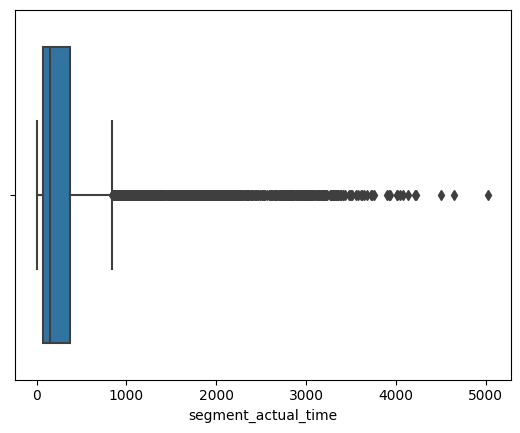

In [72]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'segment_actual_time')
plt.show()

Observations:
1. There are a lot of outliers present in the segment_actual_time variable.

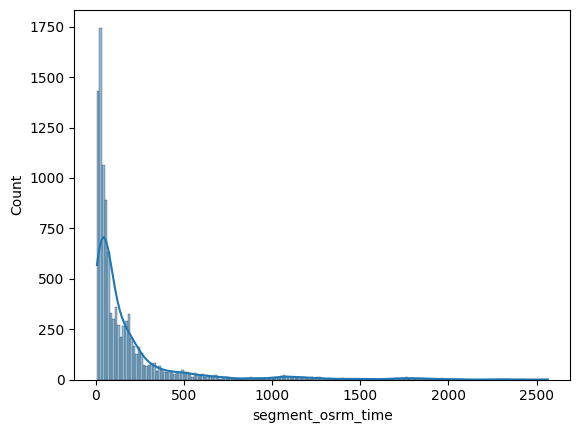

In [73]:
sns.histplot(data = tr_df_tripid_grouped, x = 'segment_osrm_time', kde = True)
plt.show()

Observations:
1. The segment_osrm_time variable is right skewed and not normal distribution.
2. Most of the data is less than 80.

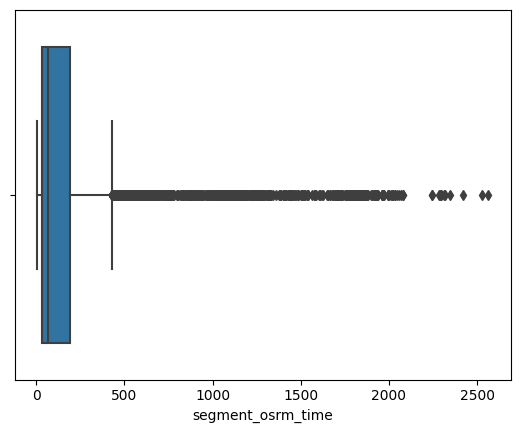

In [74]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'segment_osrm_time')
plt.show()

Observations:
1. There are a lot of outliers present in the segment_osrm_time variable.

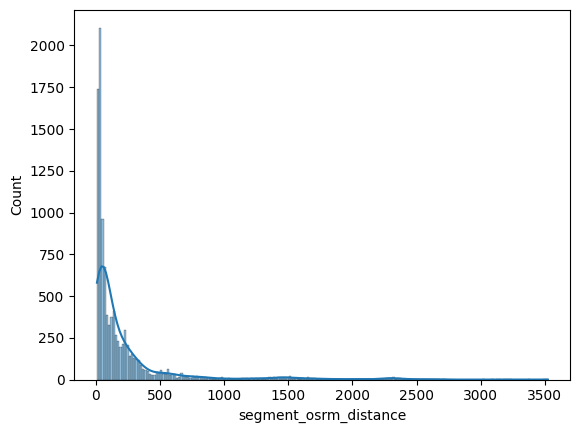

In [75]:
sns.histplot(data = tr_df_tripid_grouped, x = 'segment_osrm_distance', kde = True)
plt.show()

Observations:
1. The segment_osrm_distance variable is right skewed and not normal distribution.
2. Most of the data is less than 75.

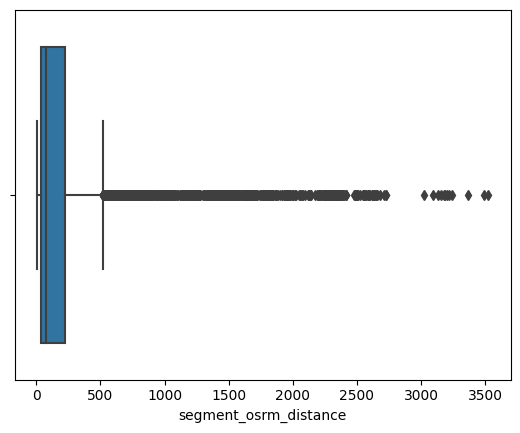

In [76]:
sns.boxplot(data = tr_df_tripid_grouped, x = 'segment_osrm_distance')
plt.show()

Observations:
1. There are a lot of outliers present in the segment_osrm_distance variable.

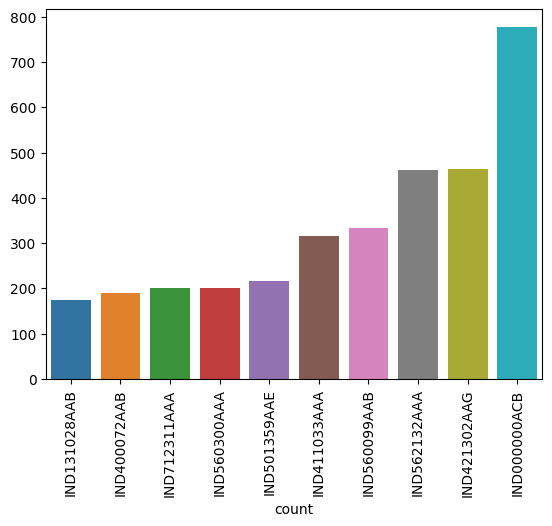

source_center
IND000000ACB    777
IND421302AAG    464
IND562132AAA    462
IND560099AAB    333
IND411033AAA    316
IND501359AAE    216
IND560300AAA    202
IND712311AAA    200
IND400072AAB    189
IND131028AAB    174
Name: count, dtype: int64


In [77]:
feature = 'source_center'
top_n = 10
sns.barplot(data = tr_df_tripid_grouped[feature].value_counts()[:top_n], 
            x = list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index),  
            y = tr_df_tripid_grouped[feature].value_counts()[:top_n].values).set_xticklabels(list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index[::-1]))
plt.xticks(rotation = 90)
plt.show()

print(tr_df_tripid_grouped[feature].value_counts()[:top_n])

Observations:
1. The top 5 source centers in the training dataset are IND000000ACB, IND421302AAG, IND562132AAA , IND560099AAB and IND411033AAA. 

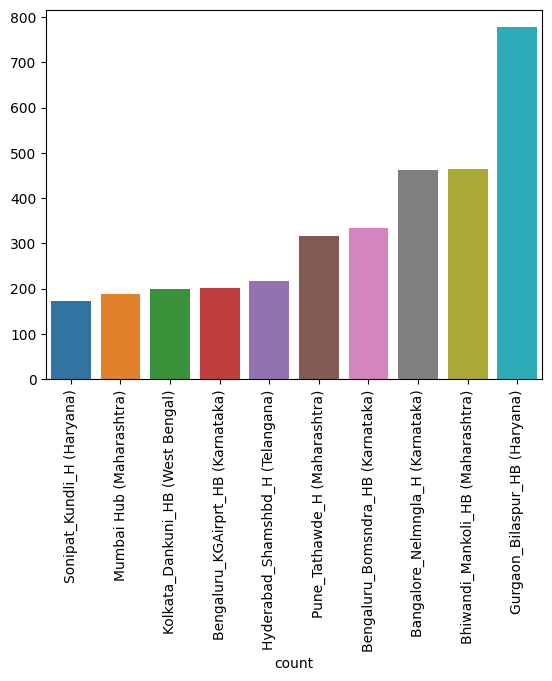

source_name
Gurgaon_Bilaspur_HB (Haryana)        777
Bhiwandi_Mankoli_HB (Maharashtra)    464
Bangalore_Nelmngla_H (Karnataka)     462
Bengaluru_Bomsndra_HB (Karnataka)    333
Pune_Tathawde_H (Maharashtra)        316
Hyderabad_Shamshbd_H (Telangana)     216
Bengaluru_KGAirprt_HB (Karnataka)    202
Kolkata_Dankuni_HB (West Bengal)     200
Mumbai Hub (Maharashtra)             189
Sonipat_Kundli_H (Haryana)           174
Name: count, dtype: int64


In [78]:
feature = 'source_name'
top_n = 10
sns.barplot(data = tr_df_tripid_grouped[feature].value_counts()[:top_n], 
            x = list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index),  
            y = tr_df_tripid_grouped[feature].value_counts()[:top_n].values).set_xticklabels(list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index[::-1]))
plt.xticks(rotation = 90)
plt.show()
print(tr_df_tripid_grouped[feature].value_counts()[:top_n])

Observations:
1. The top 5 source names in the training dataset are Gurgaon_Bilaspur_HB (Haryana), Bhiwandi_Mankoli_HB (Maharashtra), Bangalore_Nelmngla_H (Karnataka), Bengaluru_Bomsndra_HB (Karnataka) and Pune_Tathawde_H (Maharashtra).

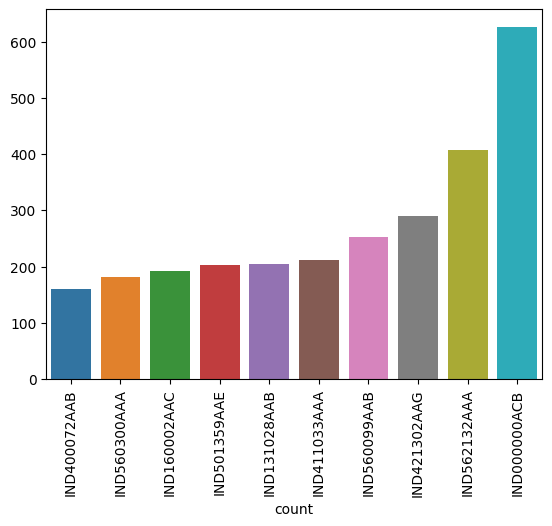

destination_center
IND000000ACB    626
IND562132AAA    408
IND421302AAG    290
IND560099AAB    252
IND411033AAA    212
IND131028AAB    204
IND501359AAE    203
IND160002AAC    193
IND560300AAA    181
IND400072AAB    161
Name: count, dtype: int64


In [79]:
feature = 'destination_center'
top_n = 10
sns.barplot(data = tr_df_tripid_grouped[feature].value_counts()[:top_n], 
            x = list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index),  
            y = tr_df_tripid_grouped[feature].value_counts()[:top_n].values).set_xticklabels(list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index[::-1]))
plt.xticks(rotation = 90)
plt.show()
print(tr_df_tripid_grouped[feature].value_counts()[:top_n])

Observations:
1. Top 5 destination centers in the dataset are IND000000ACB, IND562132AAA, IND421302AAG, IND560099AAB and IND411033AAA.

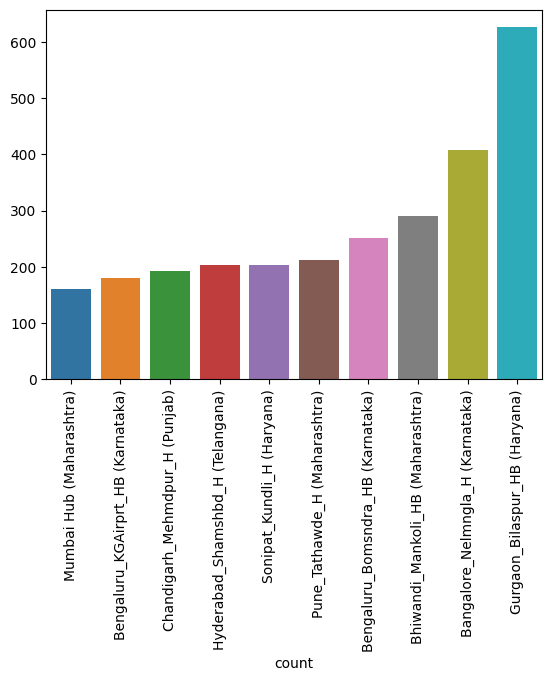

destination_name
Gurgaon_Bilaspur_HB (Haryana)        626
Bangalore_Nelmngla_H (Karnataka)     408
Bhiwandi_Mankoli_HB (Maharashtra)    290
Bengaluru_Bomsndra_HB (Karnataka)    252
Pune_Tathawde_H (Maharashtra)        212
Sonipat_Kundli_H (Haryana)           204
Hyderabad_Shamshbd_H (Telangana)     203
Chandigarh_Mehmdpur_H (Punjab)       193
Bengaluru_KGAirprt_HB (Karnataka)    181
Mumbai Hub (Maharashtra)             161
Name: count, dtype: int64


In [80]:
feature = 'destination_name'
top_n = 10
sns.barplot(data = tr_df_tripid_grouped[feature].value_counts()[:top_n], 
            x = list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index),  
            y = tr_df_tripid_grouped[feature].value_counts()[:top_n].values).set_xticklabels(list(tr_df_tripid_grouped[feature].value_counts()[:top_n].index[::-1]))
plt.xticks(rotation = 90)
plt.show()
print(tr_df_tripid_grouped[feature].value_counts()[:top_n])

Observations:
1. Top 5 destination names in the training dataset are Gurgaon_Bilaspur_HB (Haryana), Bangalore_Nelmngla_H (Karnataka), Bhiwandi_Mankoli_HB (Maharashtra), Bengaluru_Bomsndra_HB (Karnataka) and Pune_Tathawde_H (Maharashtra).

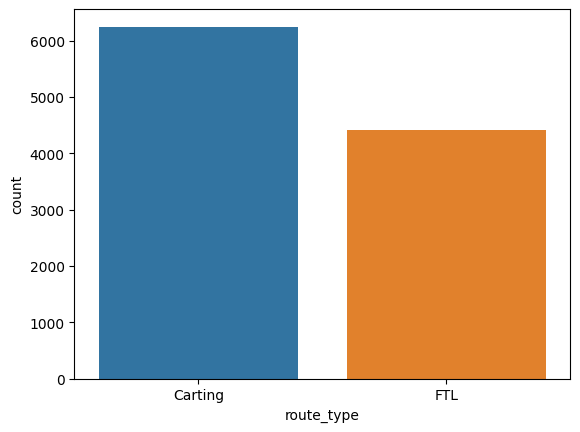

route_type
Carting    6245
FTL        4409
Name: count, dtype: int64

In [81]:
sns.countplot(data = tr_df_tripid_grouped, x = 'route_type')
plt.show()

tr_df_tripid_grouped['route_type'].value_counts()

Observations:
1. There are more data with 'Carting' route_type than 'FTL' route_type. 

# 2. Feature Creation
### Build some features to prepare the data for actual analysis. Extract features from the below fields:

1. Destination Name: Split and extract features out of destination. City-place-code (State)

2. Source Name: Split and extract features out of destination. City-place-code (State)

3. Trip_creation_time: Extract features like month, year and day etc

### Destination Name: Split and extract features out of source and destination. City-place-code (State)

In [82]:
def extract_state(location_name):
    location = location_name.split("(")
    if len(location) == 1:
        return location[0]
    else:
        return location[1].replace(")","")

In [83]:
def extract_city(location_name):
    if "location" in location_name:
        return location_name
    else:
        city_name = location_name.split("_")[0].split()[0]
        return city_name     

In [84]:
def extract_place(location_name):
    if "location" in location_name:
        return location_name
    place = "_".join(" ".join(location_name.split("(")[0].split("_")).split()[1:])
    return place

In [85]:
# Extracting place, city and state features in the training dataset
tr_df_tripid_grouped['source_place'] = tr_df_tripid_grouped['source_name'].apply(extract_place)
tr_df_tripid_grouped['source_city'] = tr_df_tripid_grouped['source_name'].apply(extract_city)
tr_df_tripid_grouped['source_state'] = tr_df_tripid_grouped['source_name'].apply(extract_state)
tr_df_tripid_grouped['destination_place'] = tr_df_tripid_grouped['destination_name'].apply(extract_place)
tr_df_tripid_grouped['destination_city'] = tr_df_tripid_grouped['destination_name'].apply(extract_city)
tr_df_tripid_grouped['destination_state'] = tr_df_tripid_grouped['destination_name'].apply(extract_state)
tr_df_tripid_grouped.head()

trip_uuid      data         trip_creation_time route_type  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741        FTL   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430    Carting   
2  trip-153671043369099517  training 2018-09-12 00:00:33.691250        FTL   
3  trip-153671046011330457  training 2018-09-12 00:01:00.113710    Carting   
4  trip-153671052974046625  training 2018-09-12 00:02:09.740725        FTL   

                          source_name source_center  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  IND209304AAA   
1   Doddablpur_ChikaDPP_D (Karnataka)  IND561203AAB   
2       Gurgaon_Bilaspur_HB (Haryana)  IND000000ACB   
3            Mumbai Hub (Maharashtra)  IND400072AAB   
4              Bellary_Dc (Karnataka)  IND583101AAA   

                     destination_name destination_center  od_total_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA        2260.11   
1   Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB         181.61   
2       Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB        3934.36   
3      Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA         100.49   
4       Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA         718.34   

   start_scan_to_end_scan  ...  osrm_distance  segment_actual_time  \
0                  2259.0  ...     991.352295               1548.0   
1                   180.0  ...      85.111000                141.0   
2                  3933.0  ...    2354.066650               3308.0   
3                   100.0  ...      19.680000                 59.0   
4                   717.0  ...     146.791794                340.0   

   segment_osrm_time  segment_osrm_distance  source_place  source_city  \
0             1008.0            1320.473267   Central_H_6       Kanpur   
1               65.0              84.189400    ChikaDPP_D   Doddablpur   
2             1941.0            2545.267822   Bilaspur_HB      Gurgaon   
3               16.0              19.876600           Hub       Mumbai   
4              115.0             146.791901            Dc      Bellary   

    source_state destination_place destination_city destination_state  
0  Uttar Pradesh       Central_H_6           Kanpur     Uttar Pradesh  
1      Karnataka        ChikaDPP_D       Doddablpur         Karnataka  
2        Haryana       Bilaspur_HB          Gurgaon           Haryana  
3    Maharashtra         MiraRd_IP           Mumbai       Maharashtra  
4      Karnataka        WrdN1DPP_D           Sandur         Karnataka  

[5 rows x 23 columns]

In [86]:
# Extracting place, city and state features in the test dataset
ts_df_tripid_grouped['source_place'] = ts_df_tripid_grouped['source_name'].apply(extract_place)
ts_df_tripid_grouped['source_city'] = ts_df_tripid_grouped['source_name'].apply(extract_city)
ts_df_tripid_grouped['source_state'] = ts_df_tripid_grouped['source_name'].apply(extract_state)
ts_df_tripid_grouped['destination_place'] = ts_df_tripid_grouped['destination_name'].apply(extract_place)
ts_df_tripid_grouped['destination_city'] = ts_df_tripid_grouped['destination_name'].apply(extract_city)
ts_df_tripid_grouped['destination_state'] = ts_df_tripid_grouped['destination_name'].apply(extract_state)
ts_df_tripid_grouped.head()

trip_uuid  data         trip_creation_time route_type  \
0  trip-153800653897073708  test 2018-09-27 00:02:18.970980    Carting   
1  trip-153800654935210748  test 2018-09-27 00:02:29.352390    Carting   
2  trip-153800658820968126  test 2018-09-27 00:03:08.209931        FTL   
3  trip-153800659468028518  test 2018-09-27 00:03:14.680535    Carting   
4  trip-153800661729668086  test 2018-09-27 00:03:37.296972    Carting   

                      source_name source_center  \
0  Dhule_MIDCAvdn_I (Maharashtra)  IND424006AAA   
1        Mumbai Hub (Maharashtra)  IND400072AAB   
2          Jaipur_Hub (Rajasthan)  IND302014AAA   
3     Mumbai_Kalyan (Maharashtra)  IND421302AAF   
4    Surat_Central_D_12 (Gujarat)  IND395009AAA   

                      destination_name destination_center  od_total_time  \
0  Chalisgaon_BhadgDPP_D (Maharashtra)       IND424101AAA         145.82   
1       Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA          81.11   
2        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB         610.77   
3       Mumbai_East_I_21 (Maharashtra)       IND421302AAR         104.51   
4          Surat_Central_I_4 (Gujarat)       IND395023AAD         228.87   

   start_scan_to_end_scan  ...  osrm_distance  segment_actual_time  \
0                   145.0  ...      56.874500                126.0   
1                    81.0  ...      21.731001                 58.0   
2                   610.0  ...     220.843002                334.0   
3                   104.0  ...      11.554900                 27.0   
4                   228.0  ...      18.183599                131.0   

   segment_osrm_time  segment_osrm_distance  source_place  source_city  \
0               47.0              67.492500    MIDCAvdn_I        Dhule   
1               17.0              21.730999           Hub       Mumbai   
2              163.0             220.843002           Hub       Jaipur   
3                9.0              11.554900        Kalyan       Mumbai   
4               17.0              18.183601  Central_D_12        Surat   

   source_state destination_place destination_city destination_state  
0   Maharashtra        BhadgDPP_D       Chalisgaon       Maharashtra  
1   Maharashtra         MiraRd_IP           Mumbai       Maharashtra  
2     Rajasthan       Bilaspur_HB          Gurgaon           Haryana  
3   Maharashtra         East_I_21           Mumbai       Maharashtra  
4       Gujarat       Central_I_4            Surat           Gujarat  

[5 rows x 23 columns]

# 1.4 continuation

In [87]:
def get_details(dataset, feature):
    print(f"There are {dataset[feature].nunique()} unique values in the {feature} feature.")
    print(f"Top 10 {feature} with respect to number of trips: \n{dataset[feature].value_counts()[:10]}")
    print(f"Some sample unique values in the {feature} feature are:\n{dataset[feature].unique()[:10]}")

In [88]:
get_details(tr_df_tripid_grouped,'source_place')

There are 698 unique values in the source_place feature.
Top 10 source_place with respect to number of trips: 
source_place
Bilaspur_HB    777
Hub            497
Mankoli_HB     464
Nelmngla_H     462
Bomsndra_HB    333
Tathawde_H     316
Shamshbd_H     216
DC             210
KGAirprt_HB    202
Dankuni_HB     200
Name: count, dtype: int64
Some sample unique values in the source_place feature are:
['Central_H_6' 'ChikaDPP_D' 'Bilaspur_HB' 'Hub' 'Dc' 'Poonamallee'
 'Chrompet_DPC' 'Layout_PC' 'Central_D_12' 'Lajpat_IP']


Observations:
1. There are 698 unique values in the source_place feature.
2. Top 10 source places where the trips were completed are: Bilaspur_HB (777 trips), Hub (497 trips), Mankoli_HB (464 trips), Nelmngla_H (462 trips), Bomsndra_HB (333 trisps), Tathawde_H (316 trips), Shamshbd_H (216 trips), DC (210 trips), KGAirprt_HB (202 trisps) and Dankuni_HB (200 trips).

In [89]:
get_details(tr_df_tripid_grouped,'source_city')

There are 643 unique values in the source_city feature.
Top 10 source_city with respect to number of trips: 
source_city
Gurgaon      840
Bengaluru    754
Mumbai       618
Bangalore    478
Bhiwandi     464
Delhi        416
Hyderabad    377
Pune         374
Chennai      240
Kolkata      224
Name: count, dtype: int64
Some sample unique values in the source_city feature are:
['Kanpur' 'Doddablpur' 'Gurgaon' 'Mumbai' 'Bellary' 'Chennai' 'HBR'
 'Surat' 'Delhi' 'Pune']


Observations:
1. There are 643 unique values in the source_city feature.
2. Top 10 source cities where the trips were completed are: Gurgaon (840 trips), Bengaluru (754 trips), Mumbai (618 trips), Bangalore (478 trips), Bhiwandi (464 trips), Delhi (416 trips), Hyderabad (377 trips), Pune (374 trips), Chennai (240 trips) and Kolkata (224 trips).

In [90]:
tr_df_tripid_grouped.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_type', 'source_name',
       'source_center', 'destination_name', 'destination_center',
       'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'source_place', 'source_city', 'source_state',
       'destination_place', 'destination_city', 'destination_state'],
      dtype='object')

In [93]:
tr_df_tripid_grouped.groupby(by = ['source_place'])[['trip_uuid','actual_distance_to_destination','actual_time']]\
.agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'})\
.sort_values(by = 'trip_uuid', ascending = False)

trip_uuid  actual_distance_to_destination  actual_time
source_place                                                        
Bilaspur_HB         777                      487.926514   890.426025
Hub                 497                      168.717422   386.692139
Mankoli_HB          464                      239.139145   464.829742
Nelmngla_H          462                      212.085037   393.151520
Bomsndra_HB         333                       64.194969   144.567566
...                 ...                             ...          ...
Kataram_D             1                      146.860840   248.000000
Kalyanpr_D            1                       33.569302    44.000000
Selakui_D             1                       22.934771   165.000000
Shahdara              1                       10.195272    58.000000
MandyaRD_D            1                      188.373718   528.000000

[698 rows x 3 columns]

Observations:
1. In the training dataset, the busiest source place is 'Bilaspur_HB' with 777 trips, average actual distance to destination is 487.9 and the average actual time is 890.43. Followed by source place 'Hub' with 497, average actual distance to destination is 168.72 and the average actual time is 386.69.

In [94]:
get_details(tr_df_tripid_grouped,'source_state')

There are 33 unique values in the source_state feature.
Top 10 source_state with respect to number of trips: 
source_state
Maharashtra      1870
Karnataka        1556
Haryana          1360
Tamil Nadu        775
Telangana         565
Delhi             550
Uttar Pradesh     530
Gujarat           510
West Bengal       491
Punjab            410
Name: count, dtype: int64
Some sample unique values in the source_state feature are:
['Uttar Pradesh' 'Karnataka' 'Haryana' 'Maharashtra' 'Tamil Nadu'
 'Gujarat' 'Delhi' 'Telangana' 'Rajasthan' 'Assam']


Observations:
1. There are 33 unique values in the source_state feature.
2. Top 10 source cities where the trips were completed are: Maharashtra (1870 trips), Karnataka (1556 trips), Haryana (1360 trips), Tamil Nadu (775 trips), Telangana (565 trips), Delhi (550 trips), Uttar Pradesh (530 trips), Gujarat (510 trips), West Bengal (491 trips) and Punjab (410 trips).

In [95]:
get_details(tr_df_tripid_grouped,'destination_place')

There are 773 unique values in the destination_place feature.
Top 10 destination_place with respect to number of trips: 
destination_place
Bilaspur_HB    626
Hub            415
Nelmngla_H     408
Mankoli_HB     290
DC             272
Bomsndra_HB    252
Tathawde_H     212
Kundli_H       204
Shamshbd_H     203
Mehmdpur_H     193
Name: count, dtype: int64
Some sample unique values in the destination_place feature are:
['Central_H_6' 'ChikaDPP_D' 'Bilaspur_HB' 'MiraRd_IP' 'WrdN1DPP_D'
 'Poonamallee' 'Vandalur_Dc' 'Layout_PC' 'Central_D_3' 'Bhogal']


Observations:
1. There are 773 unique values in the destination_place feature.
2. Top 10 source cities where the trips were completed are: Bilaspur_HB (626 trips), Hub (415 trips), Nelmngla_H (408 trips), Mankoli_HB (290 trips), DC (272 trips), Bomsndra_HB (252 trips), Tathawde_H (212 trips), Kundli_H (204 trips), Shamshbd_H (203 trips) and Mehmdpur_H (193 trips).

In [96]:
tr_df_tripid_grouped.groupby(by = ['destination_place'])[['trip_uuid','actual_distance_to_destination','actual_time']]\
.agg({'trip_uuid':'count','actual_distance_to_destination':'mean','actual_time':'mean'})\
.sort_values(by = 'trip_uuid', ascending = False)

trip_uuid  actual_distance_to_destination  actual_time
destination_place                                                        
Bilaspur_HB              626                      455.487579   837.063904
Hub                      415                      195.575043   421.985535
Nelmngla_H               408                      339.857147   614.377441
Mankoli_HB               290                      188.337082   379.675873
DC                       272                      137.257645   348.503662
...                      ...                             ...          ...
RjghatRd_D                 1                       87.590675   158.000000
Rjndpara_D                 1                      193.124695   405.000000
HydRoad_DC                 1                       96.319092   144.000000
Rjndrngr_D                 1                      177.785919  1111.000000
Mainrd_D                   1                      203.815201   594.000000

[773 rows x 3 columns]

Observations:
1. In the training dataset, the busiest destination place is 'Bilaspur_HB' with 626 trips, average actual distance to destination is 455.49 and the average actual time is 837.06. Followed by destination place 'Hub' with 415, average actual distance to destination is 195.58 and the average actual time is 421.99.

In [97]:
get_details(tr_df_tripid_grouped,'destination_city')

There are 753 unique values in the destination_city feature.
Top 10 destination_city with respect to number of trips: 
destination_city
Bengaluru     773
Mumbai        751
Gurgaon       668
Bangalore     410
Delhi         408
Hyderabad     360
Bhiwandi      314
Chennai       280
Pune          253
Chandigarh    250
Name: count, dtype: int64
Some sample unique values in the destination_city feature are:
['Kanpur' 'Doddablpur' 'Gurgaon' 'Mumbai' 'Sandur' 'Chennai' 'HBR' 'Surat'
 'Delhi' 'PNQ']


Observations:
1. There are 753 unique values in the destination_city feature.
2. Top 10 source cities where the trips were completed are: Bengaluru (773 trips), Mumbai (751 trips), Gurgaon (668 trips), Bangalore (410 trips), Delhi (408 trips), Hyderabad (360 trips), Bhiwandi (314 trips), Chennai (280 trips), Pune (253 trips) and Chandigarh (250 trips).

In [98]:
get_details(tr_df_tripid_grouped,'destination_state')

There are 37 unique values in the destination_state feature.
Top 10 destination_state with respect to number of trips: 
destination_state
Maharashtra      1763
Karnataka        1670
Haryana          1235
Tamil Nadu        810
Uttar Pradesh     572
Telangana         554
West Bengal       516
Gujarat           492
Delhi             491
Punjab            448
Name: count, dtype: int64
Some sample unique values in the destination_state feature are:
['Uttar Pradesh' 'Karnataka' 'Haryana' 'Maharashtra' 'Tamil Nadu'
 'Gujarat' 'Delhi' 'Telangana' 'Rajasthan' 'Madhya Pradesh']


Observations:
1. There are 37 unique values in the destination_state feature.
2. Top 10 source cities where the trips were completed are: Maharashtra (1763 trips), Karnataka (1670 trips), Haryana (1235 trips), Tamil Nadu (810 trips), Uttar Pradesh (572 trips), Telangana (554 trips), West Bengal (516 trips), Gujarat (492 trips), Delhi (491 trips) and Punjab (448 trips).

### Trip_creation_time: Extract features like month, year and day etc

In [99]:
# Extracting time components in training dataset
tr_df_tripid_grouped['trip_creation_date'] = pd.to_datetime(tr_df_tripid_grouped['trip_creation_time'].dt.date)
tr_df_tripid_grouped['trip_creation_day'] = tr_df_tripid_grouped['trip_creation_time'].dt.day.astype("int8")
tr_df_tripid_grouped['trip_creation_month'] = tr_df_tripid_grouped['trip_creation_time'].dt.month.astype("int8")
tr_df_tripid_grouped['trip_creation_year'] = tr_df_tripid_grouped['trip_creation_time'].dt.year.astype("int16")
tr_df_tripid_grouped['trip_creation_week'] = tr_df_tripid_grouped['trip_creation_time'].dt.isocalendar().week.astype("int8")
tr_df_tripid_grouped['trip_creation_hour'] = tr_df_tripid_grouped['trip_creation_time'].dt.hour.astype("int8")
tr_df_tripid_grouped['trip_creation_min'] = tr_df_tripid_grouped['trip_creation_time'].dt.minute.astype("int8")
tr_df_tripid_grouped['trip_creation_sec'] = tr_df_tripid_grouped['trip_creation_time'].dt.second.astype("int8")
tr_df_tripid_grouped['trip_creation_micsec'] = tr_df_tripid_grouped['trip_creation_time'].dt.microsecond.astype("int32")
tr_df_tripid_grouped.head()

trip_uuid      data         trip_creation_time route_type  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741        FTL   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430    Carting   
2  trip-153671043369099517  training 2018-09-12 00:00:33.691250        FTL   
3  trip-153671046011330457  training 2018-09-12 00:01:00.113710    Carting   
4  trip-153671052974046625  training 2018-09-12 00:02:09.740725        FTL   

                          source_name source_center  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  IND209304AAA   
1   Doddablpur_ChikaDPP_D (Karnataka)  IND561203AAB   
2       Gurgaon_Bilaspur_HB (Haryana)  IND000000ACB   
3            Mumbai Hub (Maharashtra)  IND400072AAB   
4              Bellary_Dc (Karnataka)  IND583101AAA   

                     destination_name destination_center  od_total_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA        2260.11   
1   Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB         181.61   
2       Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB        3934.36   
3      Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA         100.49   
4       Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA         718.34   

   start_scan_to_end_scan  ...  destination_state  trip_creation_date  \
0                  2259.0  ...      Uttar Pradesh          2018-09-12   
1                   180.0  ...          Karnataka          2018-09-12   
2                  3933.0  ...            Haryana          2018-09-12   
3                   100.0  ...        Maharashtra          2018-09-12   
4                   717.0  ...          Karnataka          2018-09-12   

   trip_creation_day  trip_creation_month  trip_creation_year  \
0                 12                    9                2018   
1                 12                    9                2018   
2                 12                    9                2018   
3                 12                    9                2018   
4                 12                    9                2018   

   trip_creation_week  trip_creation_hour trip_creation_min trip_creation_sec  \
0                  37                   0                 0                16   
1                  37                   0                 0                22   
2                  37                   0                 0                33   
3                  37                   0                 1                 0   
4                  37                   0                 2                 9   

  trip_creation_micsec  
0               535741  
1               886430  
2               691250  
3               113710  
4               740725  

[5 rows x 32 columns]

In [100]:
# Extracting time components in test dataset
ts_df_tripid_grouped['trip_creation_date'] = pd.to_datetime(ts_df_tripid_grouped['trip_creation_time'].dt.date)
ts_df_tripid_grouped['trip_creation_day'] = ts_df_tripid_grouped['trip_creation_time'].dt.day.astype("int8")
ts_df_tripid_grouped['trip_creation_month'] = ts_df_tripid_grouped['trip_creation_time'].dt.month.astype("int8")
ts_df_tripid_grouped['trip_creation_year'] = ts_df_tripid_grouped['trip_creation_time'].dt.year.astype("int16")
ts_df_tripid_grouped['trip_creation_week'] = ts_df_tripid_grouped['trip_creation_time'].dt.isocalendar().week.astype("int8")
ts_df_tripid_grouped['trip_creation_hour'] = ts_df_tripid_grouped['trip_creation_time'].dt.hour.astype("int8")
ts_df_tripid_grouped['trip_creation_min'] = ts_df_tripid_grouped['trip_creation_time'].dt.minute.astype("int8")
ts_df_tripid_grouped['trip_creation_sec'] = ts_df_tripid_grouped['trip_creation_time'].dt.second.astype("int8")
ts_df_tripid_grouped['trip_creation_micsec'] = ts_df_tripid_grouped['trip_creation_time'].dt.microsecond.astype("int32")
ts_df_tripid_grouped.head()

trip_uuid  data         trip_creation_time route_type  \
0  trip-153800653897073708  test 2018-09-27 00:02:18.970980    Carting   
1  trip-153800654935210748  test 2018-09-27 00:02:29.352390    Carting   
2  trip-153800658820968126  test 2018-09-27 00:03:08.209931        FTL   
3  trip-153800659468028518  test 2018-09-27 00:03:14.680535    Carting   
4  trip-153800661729668086  test 2018-09-27 00:03:37.296972    Carting   

                      source_name source_center  \
0  Dhule_MIDCAvdn_I (Maharashtra)  IND424006AAA   
1        Mumbai Hub (Maharashtra)  IND400072AAB   
2          Jaipur_Hub (Rajasthan)  IND302014AAA   
3     Mumbai_Kalyan (Maharashtra)  IND421302AAF   
4    Surat_Central_D_12 (Gujarat)  IND395009AAA   

                      destination_name destination_center  od_total_time  \
0  Chalisgaon_BhadgDPP_D (Maharashtra)       IND424101AAA         145.82   
1       Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA          81.11   
2        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB         610.77   
3       Mumbai_East_I_21 (Maharashtra)       IND421302AAR         104.51   
4          Surat_Central_I_4 (Gujarat)       IND395023AAD         228.87   

   start_scan_to_end_scan  ...  destination_state  trip_creation_date  \
0                   145.0  ...        Maharashtra          2018-09-27   
1                    81.0  ...        Maharashtra          2018-09-27   
2                   610.0  ...            Haryana          2018-09-27   
3                   104.0  ...        Maharashtra          2018-09-27   
4                   228.0  ...            Gujarat          2018-09-27   

   trip_creation_day  trip_creation_month  trip_creation_year  \
0                 27                    9                2018   
1                 27                    9                2018   
2                 27                    9                2018   
3                 27                    9                2018   
4                 27                    9                2018   

   trip_creation_week  trip_creation_hour trip_creation_min trip_creation_sec  \
0                  39                   0                 2                18   
1                  39                   0                 2                29   
2                  39                   0                 3                 8   
3                  39                   0                 3                14   
4                  39                   0                 3                37   

  trip_creation_micsec  
0               970980  
1               352390  
2               209931  
3               680535  
4               296972  

[5 rows x 32 columns]

In [101]:
tr_df_tripid_grouped.shape

(10654, 32)

In [102]:
ts_df_tripid_grouped.shape

(4163, 32)

Observations:
1. There are 10654 data points and 32 features in the training dataset after extracting more features.
2. There are 4163 data points and 32 features in the test dataset after extracting more features.

In [103]:
tr_df_tripid_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10654 entries, 0 to 10653
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       10654 non-null  object        
 1   data                            10654 non-null  category      
 2   trip_creation_time              10654 non-null  datetime64[ns]
 3   route_type                      10654 non-null  category      
 4   source_name                     10654 non-null  object        
 5   source_center                   10654 non-null  object        
 6   destination_name                10654 non-null  object        
 7   destination_center              10654 non-null  object        
 8   od_total_time                   10654 non-null  float64       
 9   start_scan_to_end_scan          10654 non-null  float32       
 10  actual_distance_to_destination  10654 non-null  float32       
 11  ac

Observations:
1. There are 2 category variables, 2 datetime variables, 9 float variables, 8 int variables and 11 object variables.

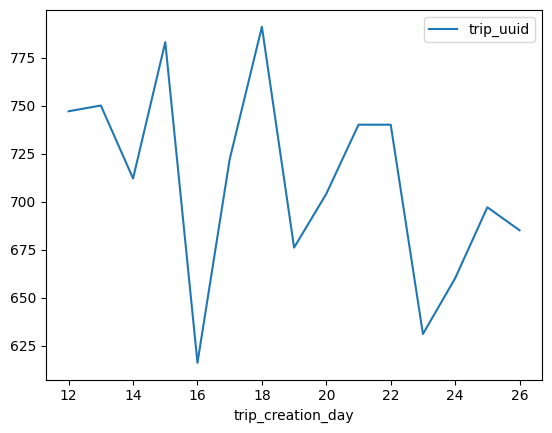

                   trip_uuid
trip_creation_day           
18                       791
15                       783
13                       750
12                       747
21                       740
22                       740
17                       722
14                       712
20                       704
25                       697
26                       685
19                       676
24                       660
23                       631
16                       616


In [104]:
# Grouping by trip_creation_day for the Trip count
day_grp = tr_df_tripid_grouped.groupby(by = ['trip_creation_day'])[['trip_uuid']].count()\
.sort_values(by = ['trip_creation_day'], ascending  = True)
day_grp.plot()
plt.show()
print(tr_df_tripid_grouped.groupby(by = ['trip_creation_day'])[['trip_uuid']].count()\
      .sort_values(by = ['trip_uuid'], ascending  = False))

Observations:
1. The training dataset contains days of the month from 12 to 26 only.
2. Most of the trips are done on the 18th and 15th days.
3. Most of the trips to be have done in the mid of the month.

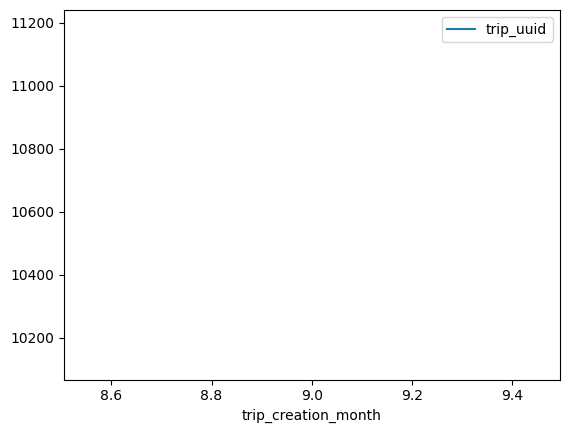

                     trip_uuid
trip_creation_month           
9                        10654
There are 1 unique values in the trip_creation_month feature.
Top 10 trip_creation_month with respect to number of trips: 
trip_creation_month
9    10654
Name: count, dtype: int64
Some sample unique values in the trip_creation_month feature are:
[9]


In [105]:
month_grp = tr_df_tripid_grouped.groupby(by = ['trip_creation_month'])[['trip_uuid']]\
.count().sort_values(by = ['trip_creation_month'], ascending  = True)
month_grp.plot()
plt.show()
print(tr_df_tripid_grouped.groupby(by = ['trip_creation_month'])[['trip_uuid']]\
      .count().sort_values(by = ['trip_uuid'], ascending  = False))
get_details(tr_df_tripid_grouped, 'trip_creation_month')

Observations:
1. The training dataset has data only for the month of september.

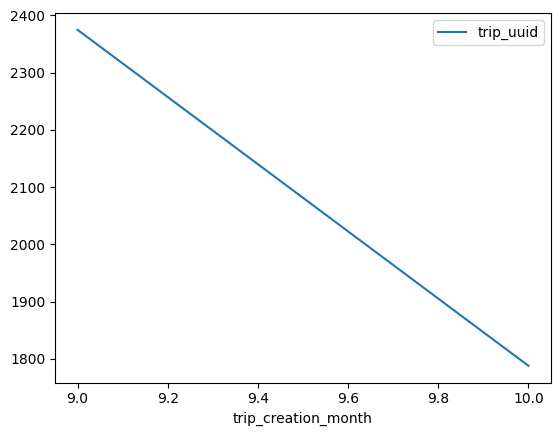

                     trip_uuid
trip_creation_month           
9                         2375
10                        1788
There are 2 unique values in the trip_creation_month feature.
Top 10 trip_creation_month with respect to number of trips: 
trip_creation_month
9     2375
10    1788
Name: count, dtype: int64
Some sample unique values in the trip_creation_month feature are:
[ 9 10]


In [106]:
month_grp = ts_df_tripid_grouped.groupby(by = ['trip_creation_month'])[['trip_uuid']]\
.count().sort_values(by = ['trip_creation_month'], ascending  = True)

month_grp.plot()
plt.show()

print(ts_df_tripid_grouped.groupby(by = ['trip_creation_month'])[['trip_uuid']]\
      .count().sort_values(by = ['trip_uuid'], ascending  = False))
get_details(ts_df_tripid_grouped, 'trip_creation_month')

Observations:
1. In the test dataset there are data for 2 values (9 and 10).
2. There are 2375 datapoints for month 9 (september) and 1788 datapoints for month 10 (October).

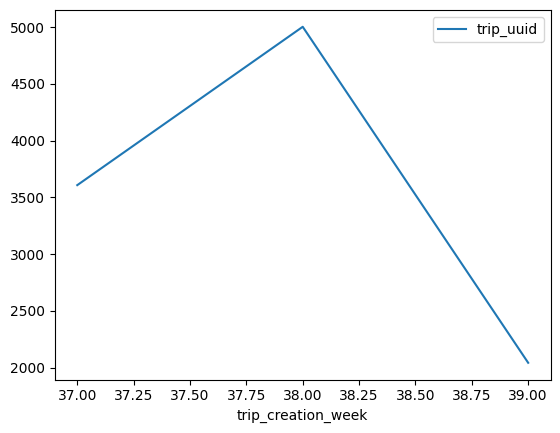

                    trip_uuid
trip_creation_week           
38                       5004
37                       3608
39                       2042


In [107]:
week_grp = tr_df_tripid_grouped.groupby(by = ['trip_creation_week'])[['trip_uuid']]\
.count().sort_values(by = ['trip_creation_week'], ascending  = True)
week_grp.plot()
plt.show()
print(tr_df_tripid_grouped.groupby(by = ['trip_creation_week'])[['trip_uuid']]\
      .count().sort_values(by = ['trip_uuid'], ascending  = False))

Observations:
1. In the training dataset, there are 3 unique values in the trip_creation_week variable.
2. Per the training dataset, most of the trips have happened in the 38th week.

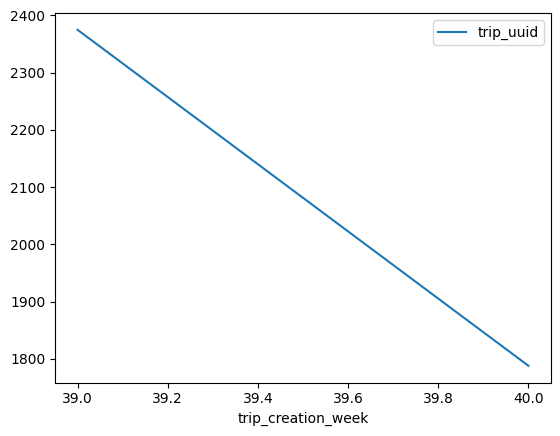

                    trip_uuid
trip_creation_week           
39                       2375
40                       1788


In [109]:
week_grp = ts_df_tripid_grouped.groupby(by = ['trip_creation_week'])[['trip_uuid']]\
.count().sort_values(by = ['trip_creation_week'], ascending  = True)
week_grp.plot()
plt.show()
print(ts_df_tripid_grouped.groupby(by = ['trip_creation_week'])[['trip_uuid']]\
      .count().sort_values(by = ['trip_uuid'], ascending  = False))

Observations:
1. In the test dataset, there are two unique values (39 and 40) for trip_creation_week variable.
2. Most of the trips in the test dataset are made in the 39th week.

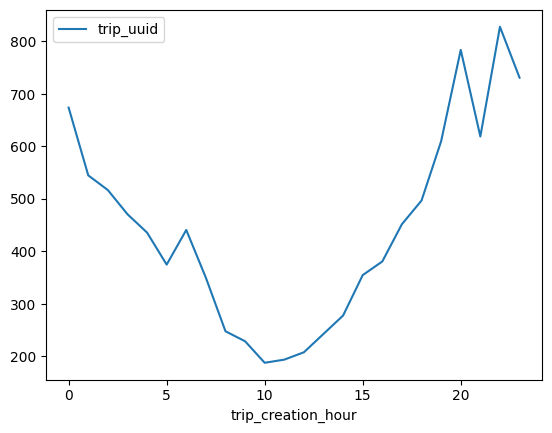

There are 24 unique values in the trip_creation_hour feature.
Top 10 trip_creation_hour with respect to number of trips: 
trip_creation_hour
22    828
20    784
23    731
0     674
21    619
19    610
1     545
2     517
18    497
3     471
Name: count, dtype: int64
Some sample unique values in the trip_creation_hour feature are:
[0 1 2 3 4 5 6 7 8 9]


In [110]:
hour_grp = tr_df_tripid_grouped.groupby(by = ['trip_creation_hour'])[['trip_uuid']]\
.count().sort_values(by = ['trip_creation_hour'], ascending  = True)
hour_grp.plot()
plt.show()
get_details(tr_df_tripid_grouped,'trip_creation_hour')

Observations:
1. Most of the trips are made between 7 pm to 3 am. During the day time less number of trips are done.

[]

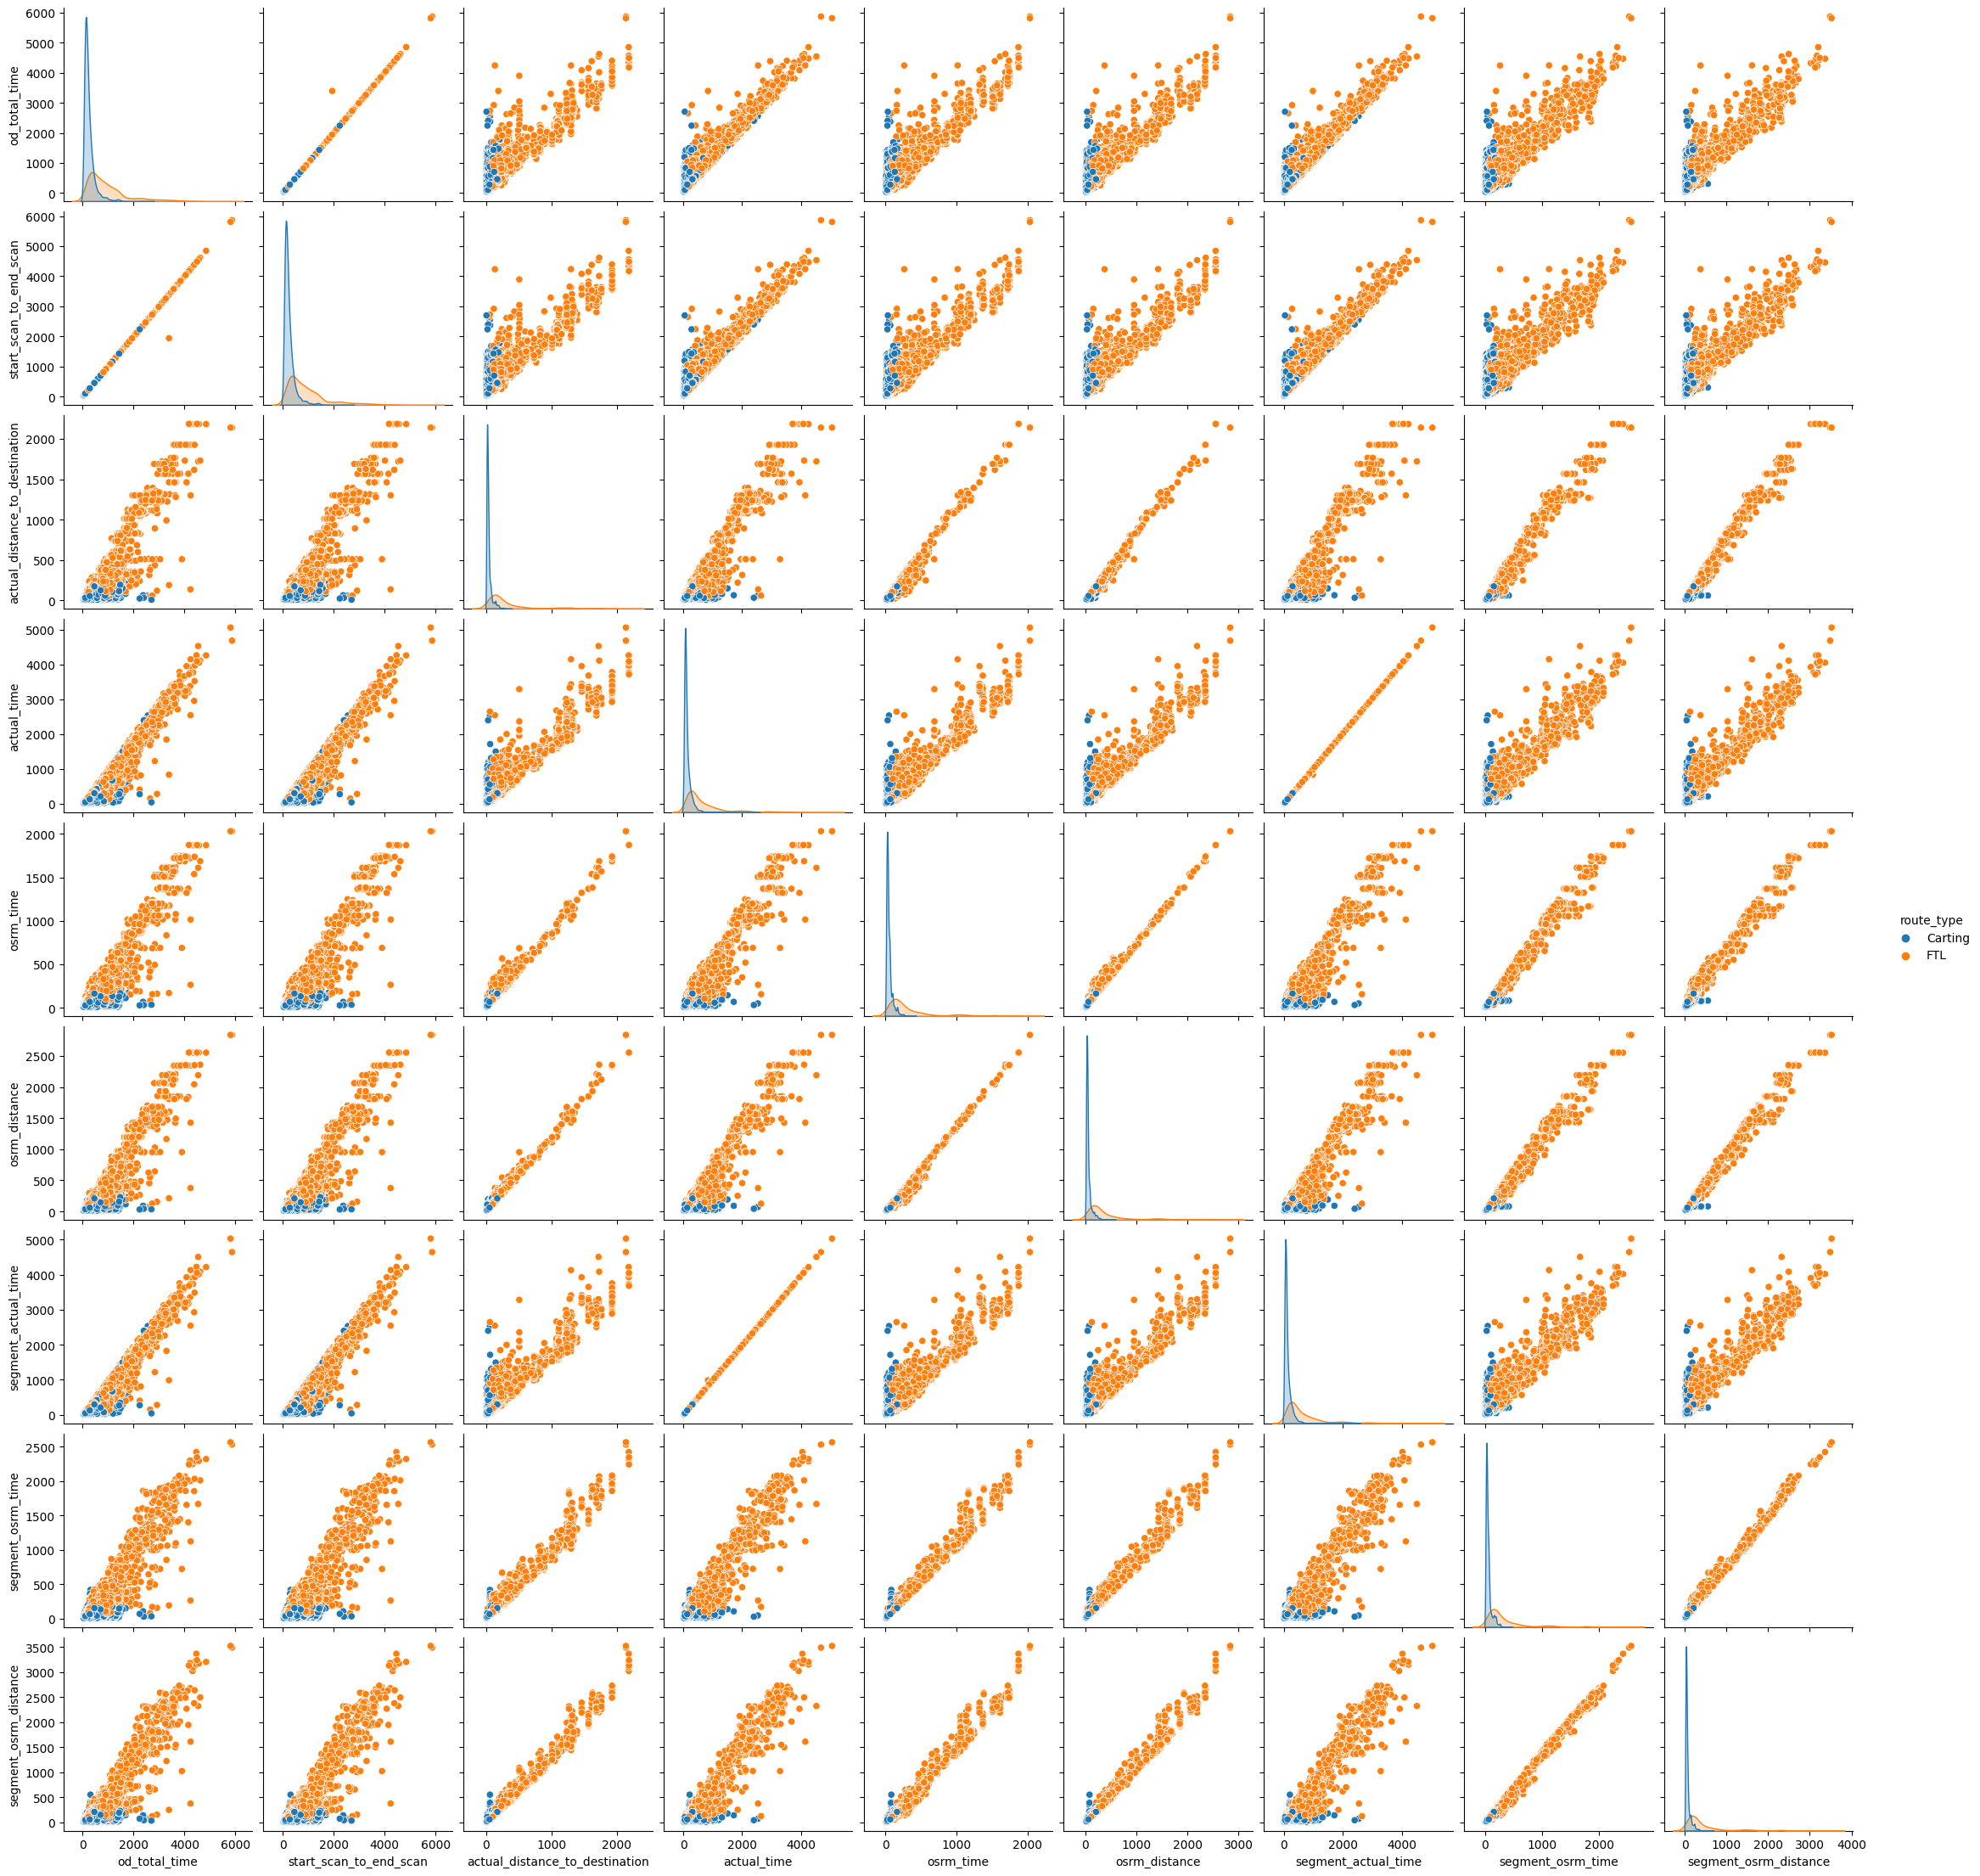

In [111]:
numerical_features = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
sns.pairplot(data = tr_df_tripid_grouped,
             vars = numerical_features,
             hue = 'route_type')
plt.plot()

Observations:
1. The 'segment_osrm_distance' is positively correlated to 'actual_distance_to_destination', 'osrm_time', 'osrm_distance' and 'segment_osrm_time'.
2. The 'segment_osrm_time' is positively correlated to 'actual_distance_to_destination', 'osrm_time', 'osrm_distance'
3. The 'segment_actual_time' is postively correlated to 'actual_time'.
4. The 'osrm_distance' is positively correlated to 'actual_distance_to_destination' and 'osrm_time'.
5. The 'osrm_time' is positively correlated to 'actual_distance_to_destination', 'osrm_distance'.
6. The 'start_scan_to_end_scan' is positively correlated to 'od_total_time'.
7. The other features are also positively correlated to each other however the correlation is lesser than what is mentioned above.

[]

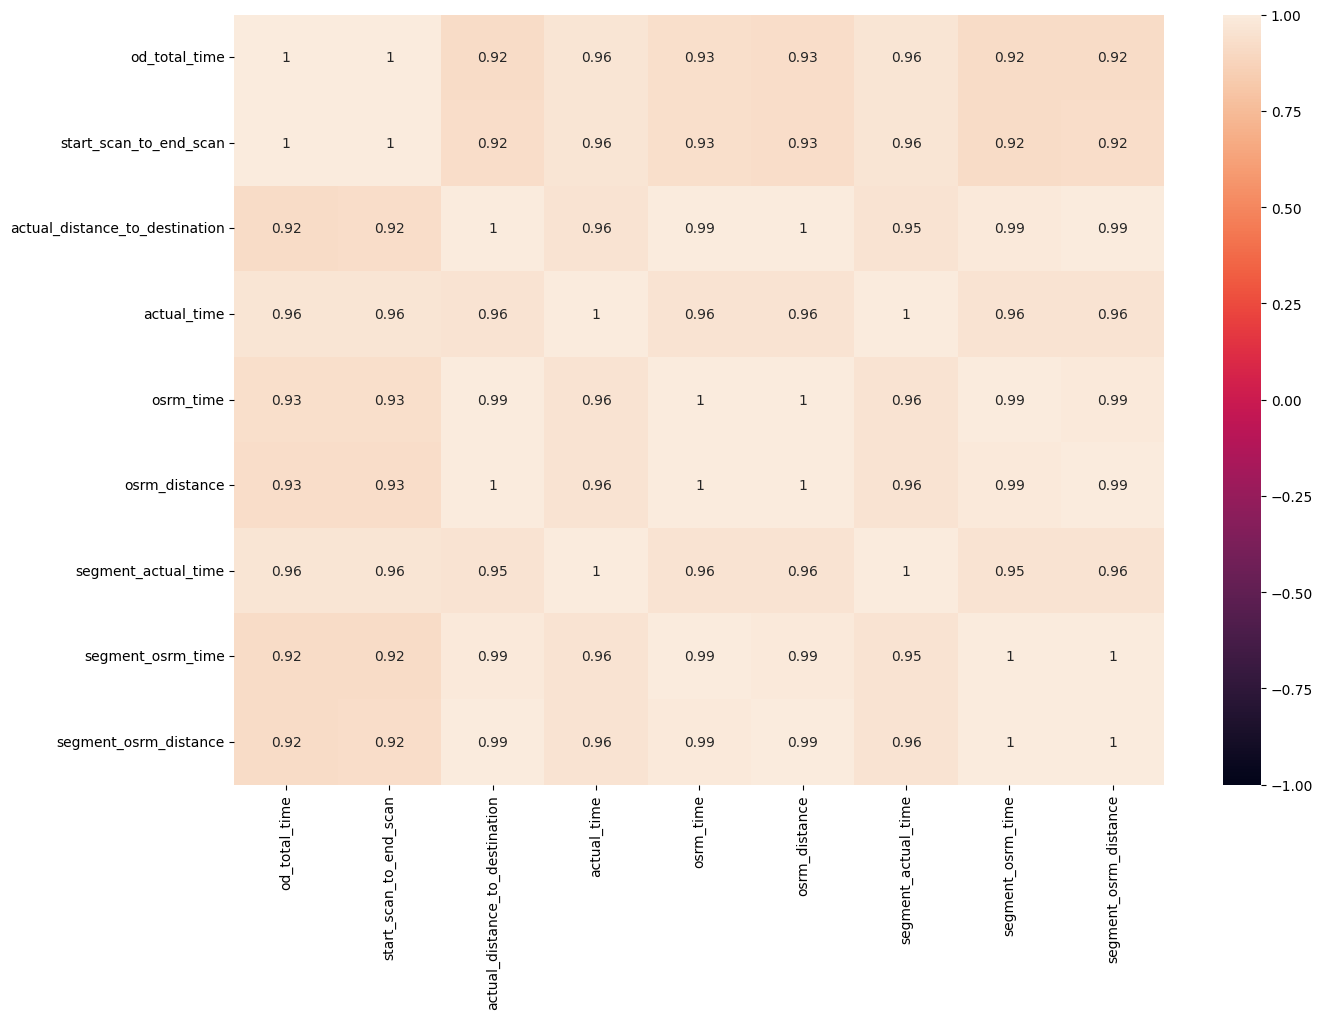

In [112]:
df_corr = tr_df_tripid_grouped[numerical_features].corr()
df_corr
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

Observations:
1. From the Heatmap, we can see that all of the numerical features are very strongly correlated to each other which are greater than 0.92.
2. 'segment_osrm_distance' and 'segment_osrm_time', 'segment_actual_distance' and 'actual_time', 'osrm_distance' and 'actual_distance_to_destination', 'osrm_distance' and 'osrm_time', 'od_total_time' and 'start_scan_to_end_scan' are very highly positively correlated that the correlation score is 1.

# 5. Outlier treatment

Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis

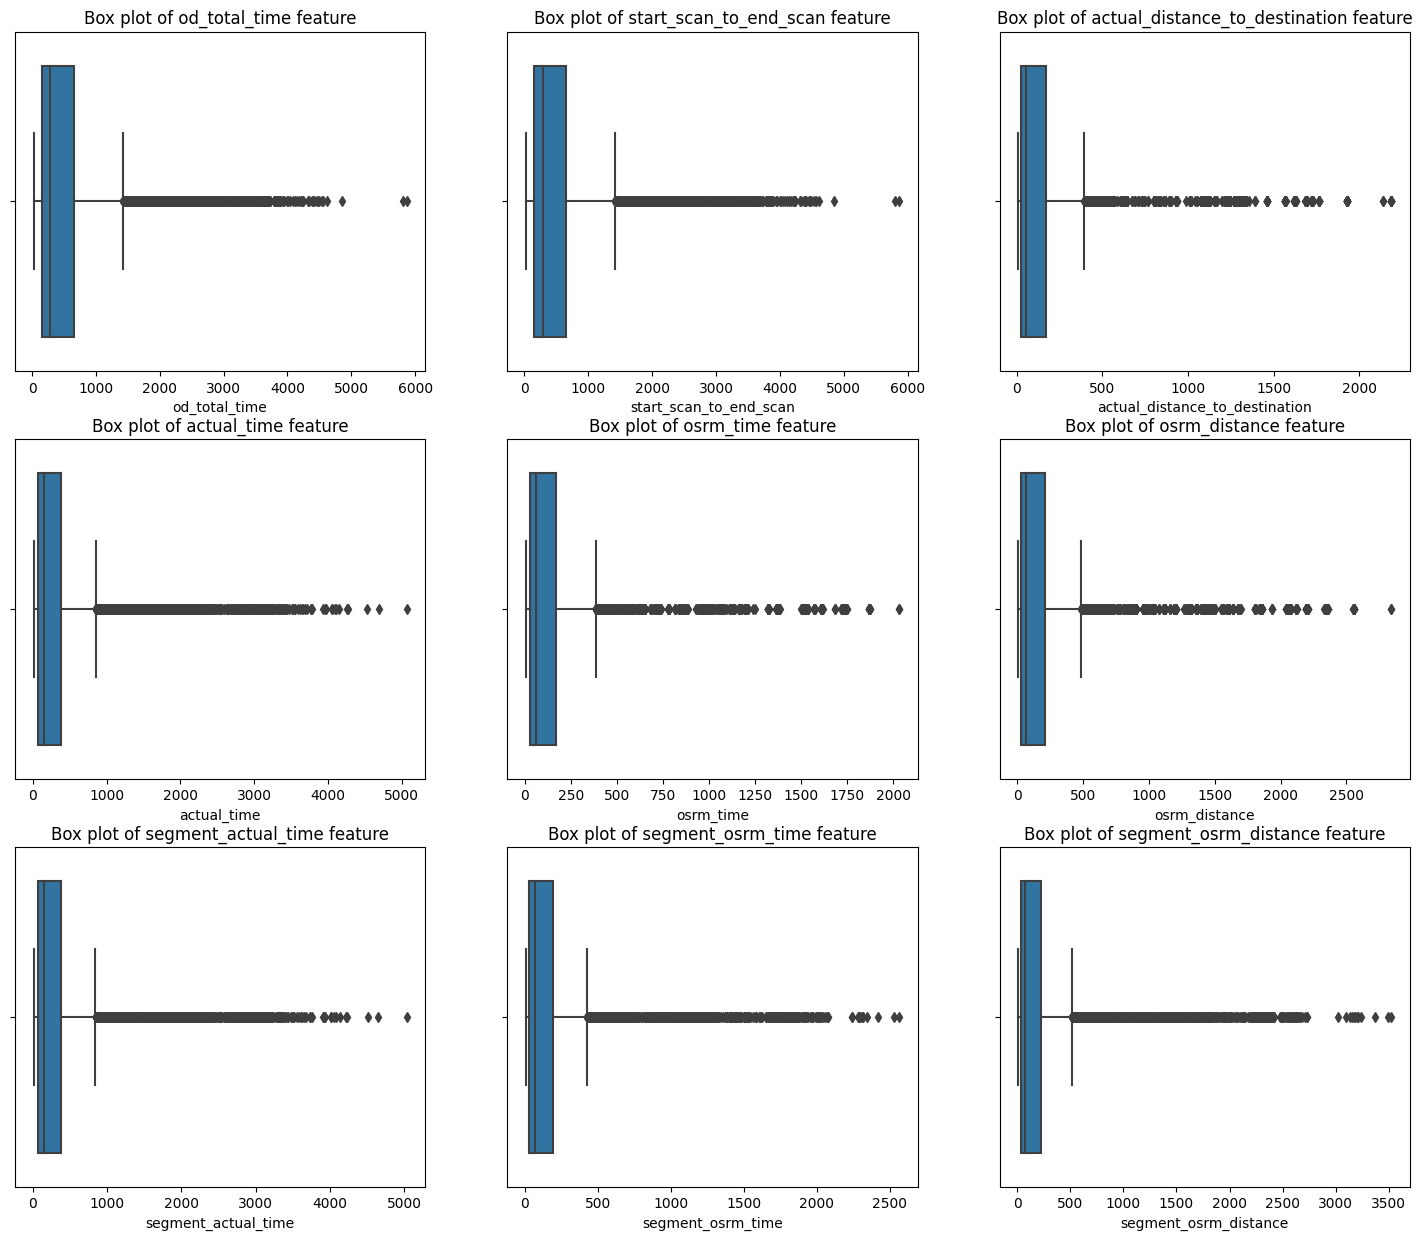

In [113]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = tr_df_tripid_grouped[numerical_features[i]])
    plt.title(f"Box plot of {numerical_features[i]} feature")
    plt.plot()

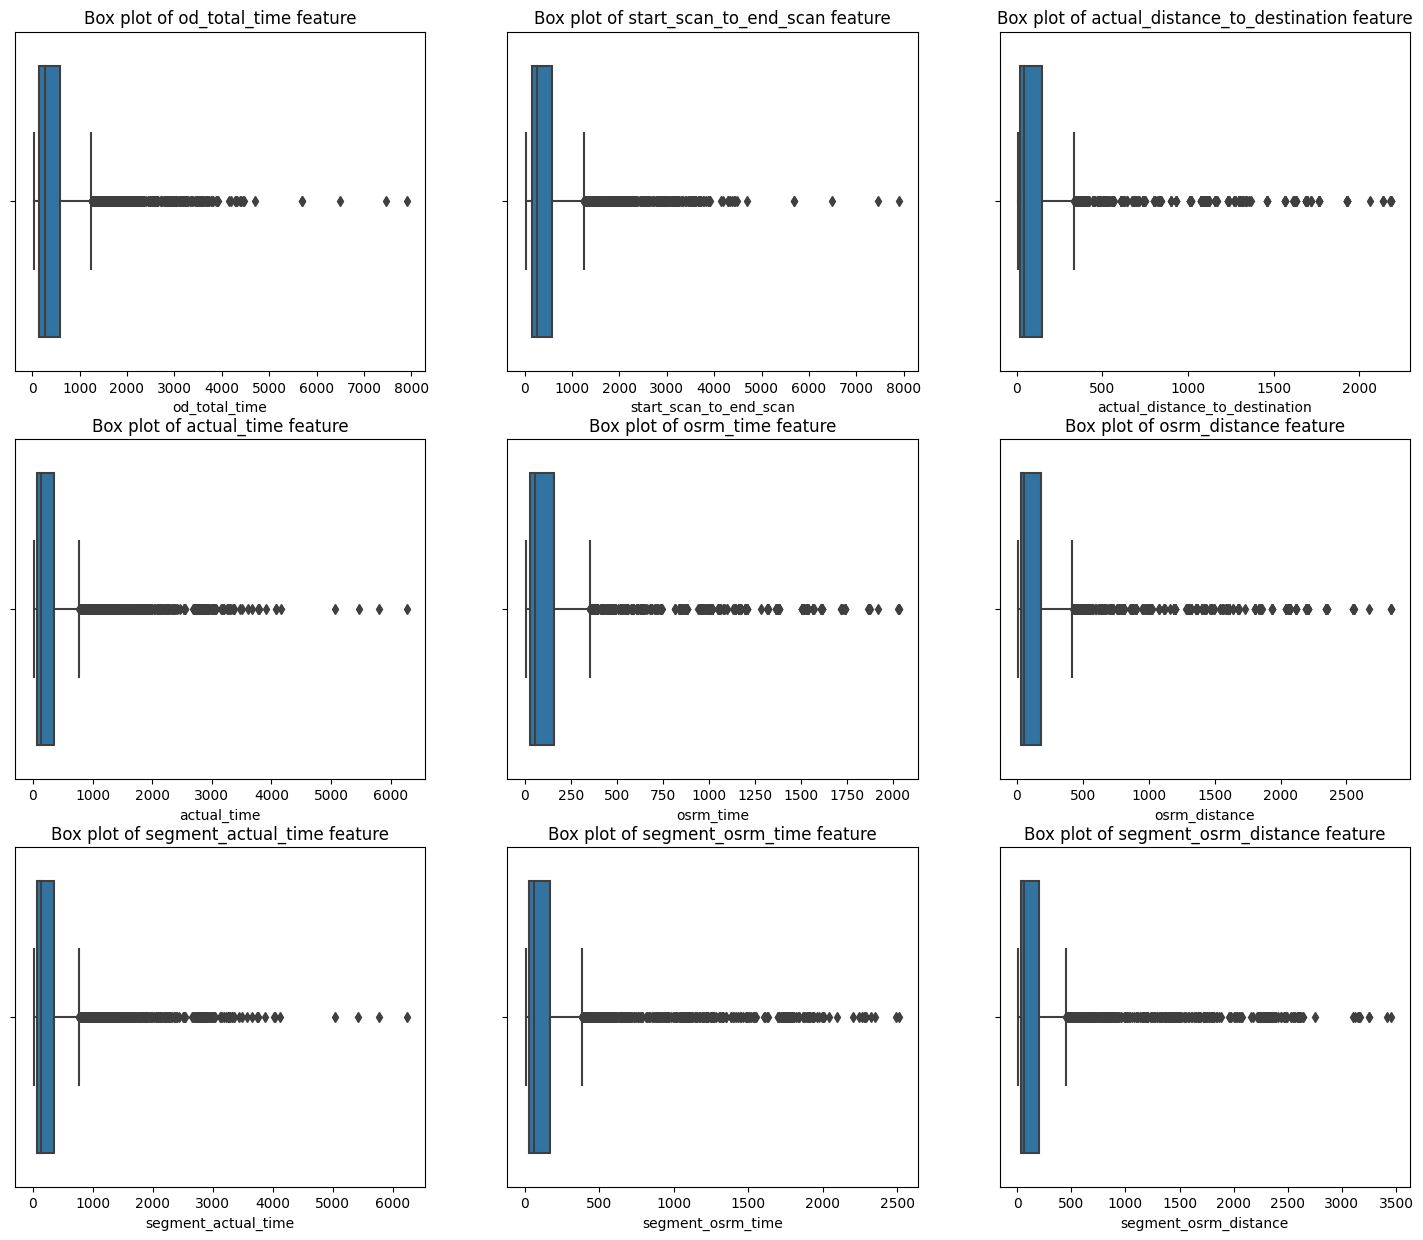

In [114]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = ts_df_tripid_grouped[numerical_features[i]])
    plt.title(f"Box plot of {numerical_features[i]} feature")
    plt.plot()

Observations:
1. There are outliers in every numerical features in both training and test datasets.

In [115]:
for col in numerical_features:
    Q1 = np.quantile(tr_df_tripid_grouped[col], 0.25)
    Q3 = np.quantile(tr_df_tripid_grouped[col], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = tr_df_tripid_grouped.loc[(tr_df_tripid_grouped[col] < lower_bound) | (tr_df_tripid_grouped[col] > upper_bound)]
    print('Feature :', col)
    print(f'First quarter : {Q1}')
    print(f'Third quarter : {Q3}')
    print(f'Inter Quartile Range : {IQR}')
    print(f'Lower Bound : {lower_bound}')
    print(f'Upper Bound : {upper_bound}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Feature : od_total_time
First quarter : 150.96249999999998
Third quarter : 660.7625
Inter Quartile Range : 509.80000000000007
Lower Bound : -613.7375000000001
Upper Bound : 1425.4625
Number of outliers : 811
----------------------------------
Feature : start_scan_to_end_scan
First quarter : 150.0
Third quarter : 659.0
Inter Quartile Range : 509.0
Lower Bound : -613.5
Upper Bound : 1422.5
Number of outliers : 813
----------------------------------
Feature : actual_distance_to_destination
First quarter : 23.464022159576416
Third quarter : 171.25977325439453
Inter Quartile Range : 147.79575109481812
Lower Bound : -198.22960448265076
Upper Bound : 392.9533998966217
Number of outliers : 1002
----------------------------------
Feature : actual_time
First quarter : 68.0
Third quarter : 381.75
Inter Quartile Range : 313.75
Lower Bound : -402.625
Upper Bound : 852.375
Number of outliers : 1150
----------------------------------
Feature : osrm_time
First quarter : 30.0
Third quarter : 173.0
Inte

In [116]:
for i in numerical_features:
    print(f"The min value in {i} is {tr_df_tripid_grouped[i].min()} and max value is {tr_df_tripid_grouped[i].max()}.")

The min value in od_total_time is 23.46 and max value is 5864.79.
The min value in start_scan_to_end_scan is 23.0 and max value is 5864.0.
The min value in actual_distance_to_destination is 9.002461433410645 and max value is 2186.09814453125.
The min value in actual_time is 10.0 and max value is 5064.0.
The min value in osrm_time is 7.0 and max value is 2031.0.
The min value in osrm_distance is 9.07289981842041 and max value is 2839.358154296875.
The min value in segment_actual_time is 10.0 and max value is 5028.0.
The min value in segment_osrm_time is 7.0 and max value is 2564.0.
The min value in segment_osrm_distance is 9.07289981842041 and max value is 3523.63232421875.


In [117]:
for i in numerical_features:
    print(f"The min value in {i} is {ts_df_tripid_grouped[i].min()} and max value is {tr_df_tripid_grouped[i].max()}.")

The min value in od_total_time is 27.8 and max value is 5864.79.
The min value in start_scan_to_end_scan is 27.0 and max value is 5864.0.
The min value in actual_distance_to_destination is 9.006254196166992 and max value is 2186.09814453125.
The min value in actual_time is 9.0 and max value is 5064.0.
The min value in osrm_time is 6.0 and max value is 2031.0.
The min value in osrm_distance is 9.290300369262695 and max value is 2839.358154296875.
The min value in segment_actual_time is 9.0 and max value is 5028.0.
The min value in segment_osrm_time is 6.0 and max value is 2564.0.
The min value in segment_osrm_distance is 9.290300369262695 and max value is 3523.63232421875.


Observations:
1. Although we have outliers in our dataset, based on the min and the max values, these outliers could just be valid values. They could just be long distance deliveries. Based on the values, they seem valid. In order to remove or treat the outliers, we need good reasons. I do not see any reason to remove or treat these outliers. Hence concluding that these are just natural outliers are leaving them as they are.

# 6. Checking relationship between aggregated fields
### In-depth analysis and feature engineering:

#### Note: Using only the training dataset for this analysis

#### od_total_time vs start_scan_to_end_scan

In [118]:
tr_df_tripid_grouped[["od_total_time","start_scan_to_end_scan"]].describe().reset_index()

index  od_total_time  start_scan_to_end_scan
0  count   10654.000000            10654.000000
1   mean     534.152610              533.129639
2    std     645.113972              644.500122
3    min      23.460000               23.000000
4    25%     150.962500              150.000000
5    50%     288.020000              287.000000
6    75%     660.762500              659.000000
7    max    5864.790000             5864.000000

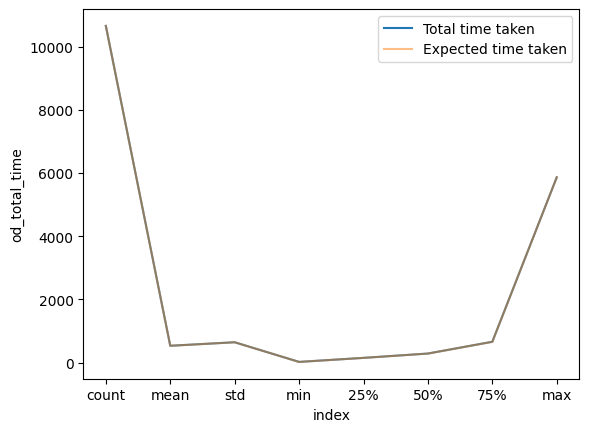

In [119]:
d = tr_df_tripid_grouped[["od_total_time","start_scan_to_end_scan"]].describe().reset_index()
sns.lineplot(data = d, x = 'index', y = 'od_total_time', label = 'Total time taken', alpha = 1)
sns.lineplot(data = d, x = 'index', y = 'start_scan_to_end_scan', label = 'Expected time taken', alpha = 0.5)
plt.legend()
plt.show()

Observations:
1. The above visualization shows that the statistical parameters of od_total_time and the start_scan_to_end_scan are very similar.

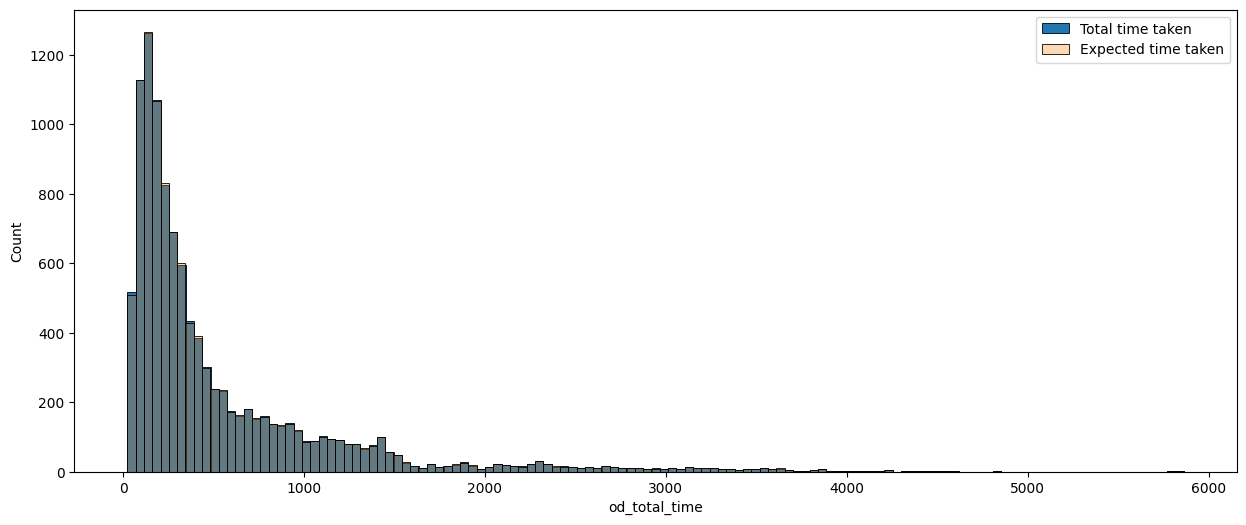

In [120]:
plt.figure(figsize = (15, 6))
sns.histplot(data = tr_df_tripid_grouped, x = 'od_total_time', label = 'Total time taken', alpha = 1)
sns.histplot(data = tr_df_tripid_grouped, x = 'start_scan_to_end_scan', label = 'Expected time taken', alpha = 0.3)
plt.legend()
plt.show()

Observations:
1. The visualization above shows that both od_total_time and start_scan_to_end_scan features seem to be overlapping. This suggests that the data in both features are very similar. 

##### Performing Hypothesis Testing to statistically confirm the similarity between od_total_time and start_scan_to_end_scan features.

1. Set up Null Hypothesis:
    1. Null Hypothesis, H0 - od_total_time and start_scan_to_end_scan are the same.
    2. Alternate Hypothesis, HA - od_total_time and start_scan_to_end_scan are different.
2. Verifying the assumptions for the hypothesis:
    1. t-Test assumptions
        1. The data are continuous.
        2. The sample data have been randomly sampled from a population.
        3. There is homogeneity of variance (i.e., the variability of the data in each group is similar).
        4. The distribution is approximately normal.   
     2. Perform the Mann-Whitney U test if the assumptions of the t-test are not met
3. Defining the Test statistics:
    1. The test statistic to be use is the T test for independence for 2-samples.
4. Compute the p-value and fix value of alpha.
    1. Assuming the alpha to be 0.05.
5. Compare p-value and alpha.
    1. If p-val > alpha : Accept H0
    2. If p-val < alpha : Reject H0

#### Checking the assumptions for t-test

##### Checking for normality

In [121]:
def check_normality(data,feature):
    #QQ plot
    print(f"Plotting the QQ plot for {feature} feature.")
    sm.qqplot(data[feature], line ='r') 
    plt.show()
    heading = f"Performing Shapiro test - Test or Normality for {feature}:"
    print(heading)
    print("-"*len(heading))
    test_stat, p_value = stat.shapiro(data[feature])
    print('>>p-value', p_value)
    if p_value < 0.05:
        print('Result: The sample does not follow normal distribution')
    else:
        print('Result: The sample follows normal distribution')   

Plotting the QQ plot for od_total_time feature.


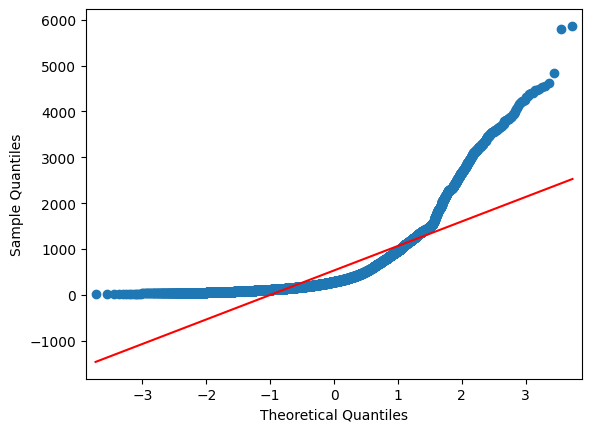

Performing Shapiro test - Test or Normality for od_total_time:
--------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [122]:
check_normality(tr_df_tripid_grouped,'od_total_time')

Plotting the QQ plot for start_scan_to_end_scan feature.


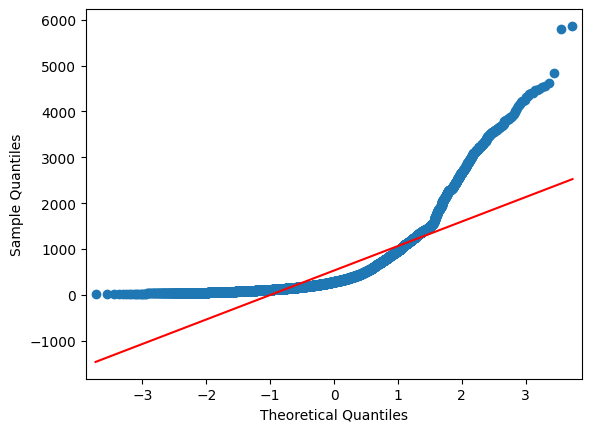

Performing Shapiro test - Test or Normality for start_scan_to_end_scan:
-----------------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [123]:
check_normality(tr_df_tripid_grouped,'start_scan_to_end_scan')

Observations:
1. Since the features are not normally distributed, we can try to do boxcox transformation to make the normally distributed. 

Plotting the QQ plot for trans_od_total_time feature.


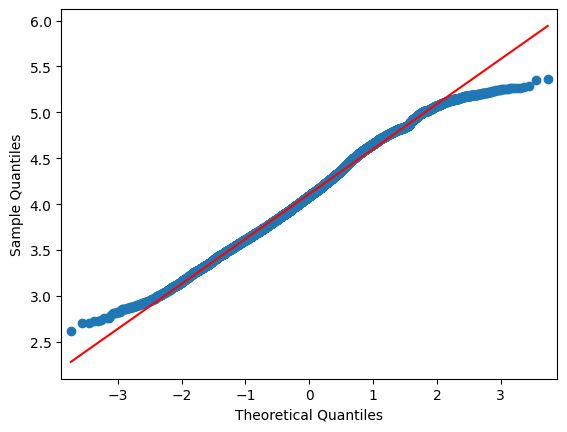

Performing Shapiro test - Test or Normality for trans_od_total_time:
--------------------------------------------------------------------
>>p-value 8.423355771754096e-22
Result: The sample does not follow normal distribution


In [124]:
#Performing nBoxcox transformation
tr_df_tripid_grouped['trans_od_total_time'] = stat.boxcox(tr_df_tripid_grouped['od_total_time'])[0]
check_normality(tr_df_tripid_grouped,'trans_od_total_time')

Plotting the QQ plot for trans_od_total_time feature.


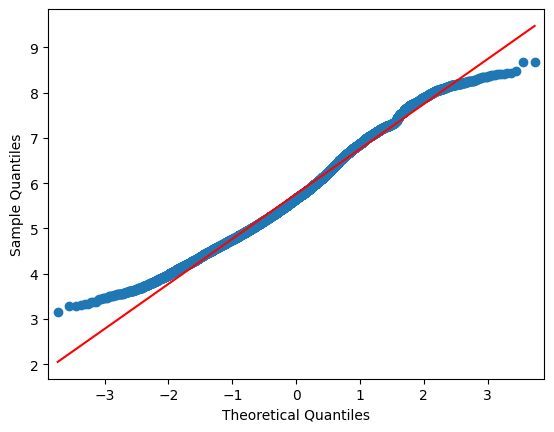

Performing Shapiro test - Test or Normality for trans_od_total_time:
--------------------------------------------------------------------
>>p-value 1.6356161673499654e-29
Result: The sample does not follow normal distribution


In [125]:
tr_df_tripid_grouped['trans_od_total_time'] = np.log(tr_df_tripid_grouped['od_total_time'])
check_normality(tr_df_tripid_grouped,'trans_od_total_time')

Observations:
1. For od_total_time feature, the boxcox transformation with the p-value of 8.423355771754096e-22 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 1.6356161673499654e-29 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Plotting the QQ plot for trans_start_scan_to_end_scan feature.


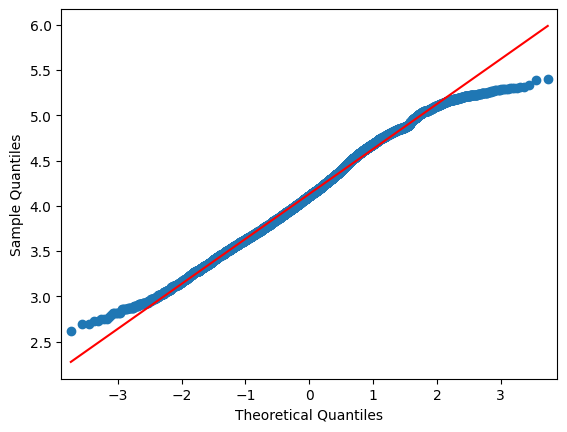

Performing Shapiro test - Test or Normality for trans_start_scan_to_end_scan:
-----------------------------------------------------------------------------
>>p-value 1.138063399914977e-21
Result: The sample does not follow normal distribution


In [126]:
tr_df_tripid_grouped['trans_start_scan_to_end_scan'] = stat.boxcox(tr_df_tripid_grouped['start_scan_to_end_scan'])[0]
check_normality(tr_df_tripid_grouped,'trans_start_scan_to_end_scan')

Plotting the QQ plot for trans_start_scan_to_end_scan feature.


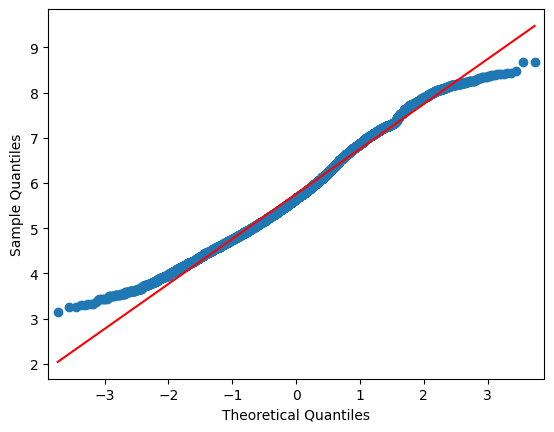

Performing Shapiro test - Test or Normality for trans_start_scan_to_end_scan:
-----------------------------------------------------------------------------
>>p-value 2.753641671411399e-29
Result: The sample does not follow normal distribution


In [127]:
tr_df_tripid_grouped['trans_start_scan_to_end_scan'] = np.log(tr_df_tripid_grouped['start_scan_to_end_scan'])
check_normality(tr_df_tripid_grouped,'trans_start_scan_to_end_scan')

Observations:
1. For start_scan_to_end_scan feature, the boxcox transformation with the p-value of 1.138063399914977e-21 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 2.753641671411399e-29 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Homogeneity of Variances using Lavene's test

In [128]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stat.levene(tr_df_tripid_grouped['od_total_time'], tr_df_tripid_grouped['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.957822685981482
The samples have Homogenous Variance 


Observations: 
1. The samples are not normally distributed. Hence we cannot apply t-test here.
2. We can opt for the Mann-Whitney U test which is the non parametric equivalent of the t-test.
3. The Mann-Whitney U test is a non-parametric test that can be used when the assumptions of the t-test are not met. It is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [129]:
test_stat, p_value = stat.mannwhitneyu(tr_df_tripid_grouped['od_total_time'], tr_df_tripid_grouped['start_scan_to_end_scan'])
print('P-value :',p_value)
if p_value < 0.05:
    print('The samples are not similar.')
else:
    print('The samples are similar.') 

P-value : 0.8145123207217033
The samples are similar.


Observations:
1. The p-value (0.81) is greater than the alpha(0.5). Hence, we can conclude that the features od_total_time and start_scan_to_end_scan are similar.

##### actual_time  aggregated value vs OSRM time aggregated value

In [130]:
tr_df_tripid_grouped[["actual_time","osrm_time"]].describe().reset_index()

index   actual_time     osrm_time
0  count  10654.000000  10654.000000
1   mean    361.542236    164.123611
2    std    552.876953    267.959534
3    min     10.000000      7.000000
4    25%     68.000000     30.000000
5    50%    157.000000     62.000000
6    75%    381.750000    173.000000
7    max   5064.000000   2031.000000

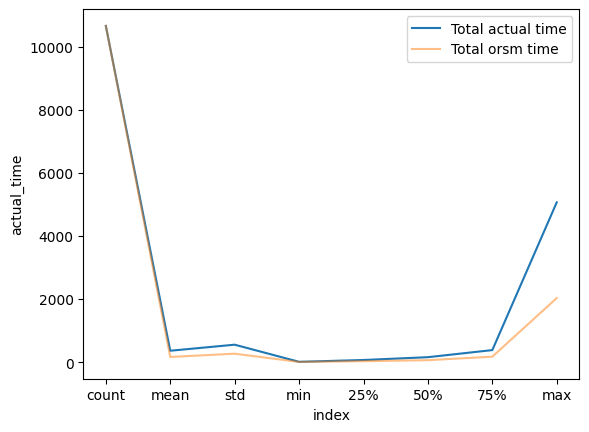

In [131]:
d = tr_df_tripid_grouped[["actual_time","osrm_time"]].describe().reset_index()
sns.lineplot(data = d, x = 'index', y = 'actual_time', label = 'Total actual time', alpha = 1)
sns.lineplot(data = d, x = 'index', y = 'osrm_time', label = 'Total orsm time', alpha = 0.5)
plt.legend()
plt.show()

Observations:
1. The above visualization shows that the statistical parameters of actual_time and the osrm_time are almost similar.

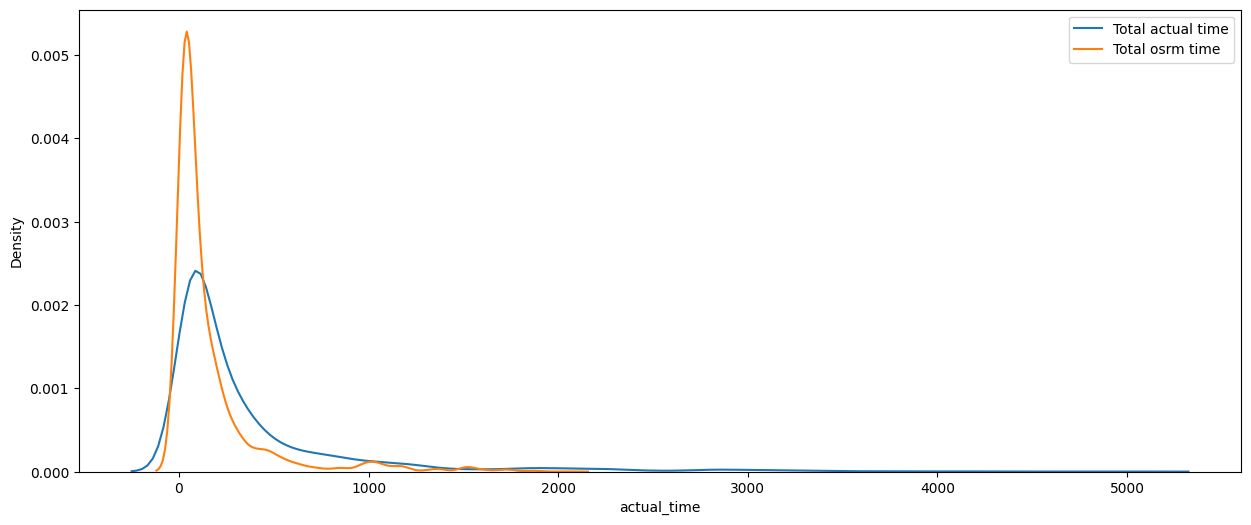

In [132]:
plt.figure(figsize = (15, 6))
sns.kdeplot(data = tr_df_tripid_grouped, x = 'actual_time', label = 'Total actual time', alpha = 1)
sns.kdeplot(data = tr_df_tripid_grouped, x = 'osrm_time', label = 'Total osrm time', alpha = 1)
plt.legend()
plt.show()

Observations:
1. The visualization above shows that both actual_time and osrm_time features seem to be slightly overlapping. However, there are some differences in between the distributions. 

##### Checking for normality

Plotting the QQ plot for actual_time feature.


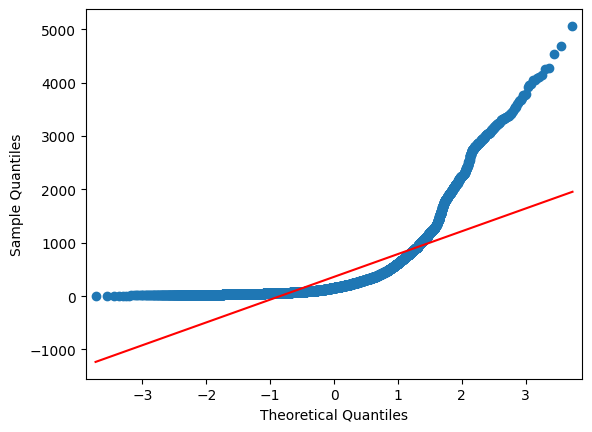

Performing Shapiro test - Test or Normality for actual_time:
------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [133]:
check_normality(tr_df_tripid_grouped, 'actual_time')

Plotting the QQ plot for osrm_time feature.


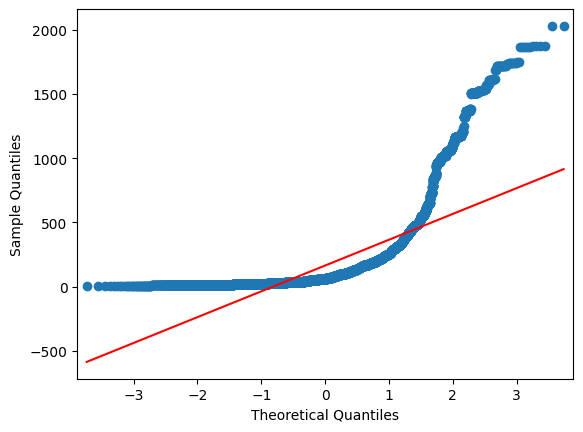

Performing Shapiro test - Test or Normality for osrm_time:
----------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [134]:
check_normality(tr_df_tripid_grouped, 'osrm_time')

Plotting the QQ plot for trans_actual_time feature.


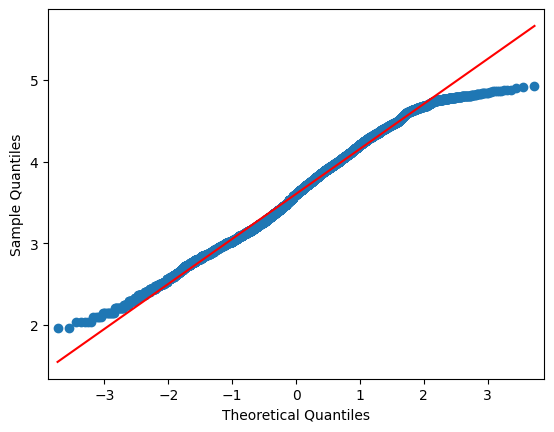

Performing Shapiro test - Test or Normality for trans_actual_time:
------------------------------------------------------------------
>>p-value 4.519472872863014e-25
Result: The sample does not follow normal distribution


In [135]:
tr_df_tripid_grouped['trans_actual_time'] = stat.boxcox(tr_df_tripid_grouped['actual_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_actual_time')

Plotting the QQ plot for trans_actual_time feature.


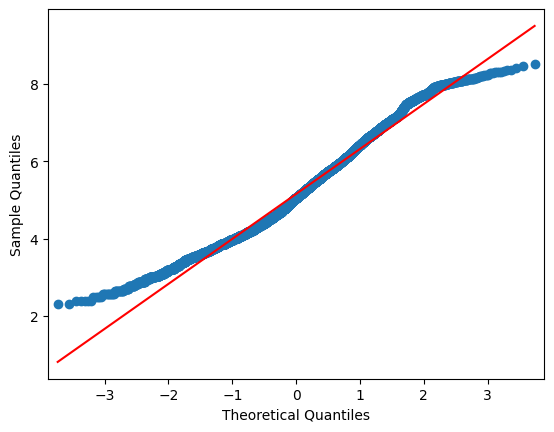

Performing Shapiro test - Test or Normality for trans_actual_time:
------------------------------------------------------------------
>>p-value 3.7976778643962185e-35
Result: The sample does not follow normal distribution


In [136]:
tr_df_tripid_grouped['trans_actual_time'] = np.log(tr_df_tripid_grouped['actual_time'])
check_normality(tr_df_tripid_grouped, 'trans_actual_time')

Observations:
1. For actual_time feature, the boxcox transformation with the p-value of 4.519472872863014e-25 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 3.7976778643962185e-35 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Plotting the QQ plot for trans_osrm_time feature.


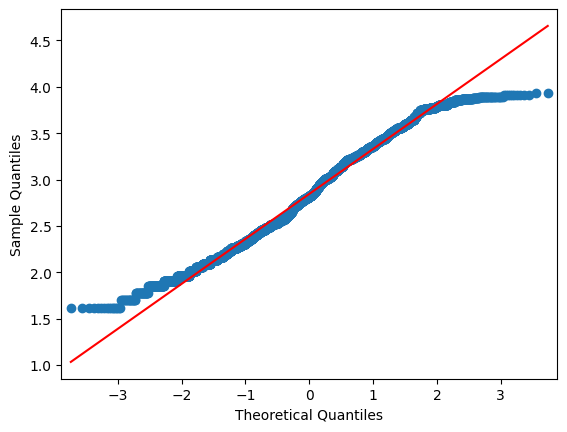

Performing Shapiro test - Test or Normality for trans_osrm_time:
----------------------------------------------------------------
>>p-value 6.0599456229805425e-31
Result: The sample does not follow normal distribution


In [137]:
tr_df_tripid_grouped['trans_osrm_time'] = stat.boxcox(tr_df_tripid_grouped['osrm_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_osrm_time')

Plotting the QQ plot for trans_osrm_time feature.


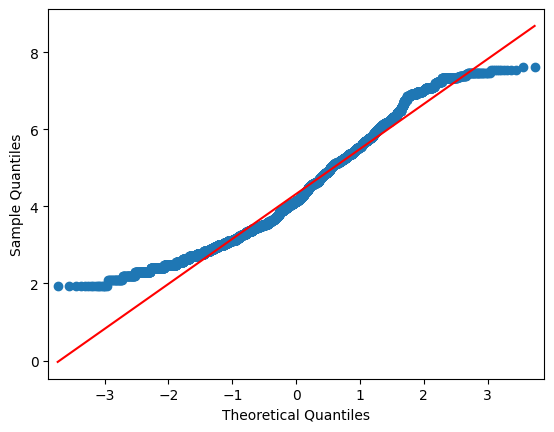

Performing Shapiro test - Test or Normality for trans_osrm_time:
----------------------------------------------------------------
>>p-value 9.640933434554741e-43
Result: The sample does not follow normal distribution


In [138]:
tr_df_tripid_grouped['trans_osrm_time'] = np.log(tr_df_tripid_grouped['osrm_time'])
check_normality(tr_df_tripid_grouped, 'trans_osrm_time')

Observations:
1. For osrm_time feature, the boxcox transformation with the p-value of 6.0599456229805425e-31 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 9.640933434554741e-43 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Homogeneity of Variances using Lavene's test

In [139]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stat.levene(tr_df_tripid_grouped['actual_time'], tr_df_tripid_grouped['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 2.759660409756848e-166
The samples do not have  Homogenous Variance


Observations: 
1. The samples are not normally distributed. Hence we cannot apply t-test here.
2. We can opt for the Mann-Whitney U test which is the non parametric equivalent of the t-test.
3. The Mann-Whitney U test is a non-parametric test that can be used when the assumptions of the t-test are not met. It is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [140]:
test_stat, p_value = stat.mannwhitneyu(tr_df_tripid_grouped['actual_time'], tr_df_tripid_grouped['osrm_time'])
print('P-value :',p_value)
if p_value < 0.05:
    print('The samples are not similar.')
else:
    print('The samples are similar.') 

P-value : 0.0
The samples are not similar.


Observations:
1. The p-value (0.0) is lesser than the alpha(0.5). Hence, we can conclude that the features actual_time and osrm_time are not similar.

##### actual_time aggregated value vs segment actual time aggregated value

In [141]:
tr_df_tripid_grouped[["actual_time","segment_actual_time"]].describe().reset_index()

index   actual_time  segment_actual_time
0  count  10654.000000         10654.000000
1   mean    361.542236           358.193817
2    std    552.876953           547.688293
3    min     10.000000            10.000000
4    25%     68.000000            68.000000
5    50%    157.000000           155.000000
6    75%    381.750000           378.000000
7    max   5064.000000          5028.000000

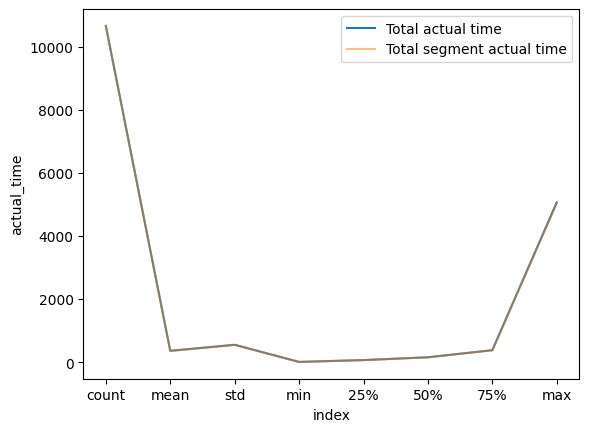

In [142]:
d = tr_df_tripid_grouped[["actual_time","segment_actual_time"]].describe().reset_index()
sns.lineplot(data = d, x = 'index', y = 'actual_time', label = 'Total actual time', alpha = 1)
sns.lineplot(data = d, x = 'index', y = 'segment_actual_time', label = 'Total segment actual time', alpha = 0.5)
plt.legend()
plt.show()

Observations:
1. The above visualization shows that the statistical parameters of od_total_time and the segment_actual_time are very similar.

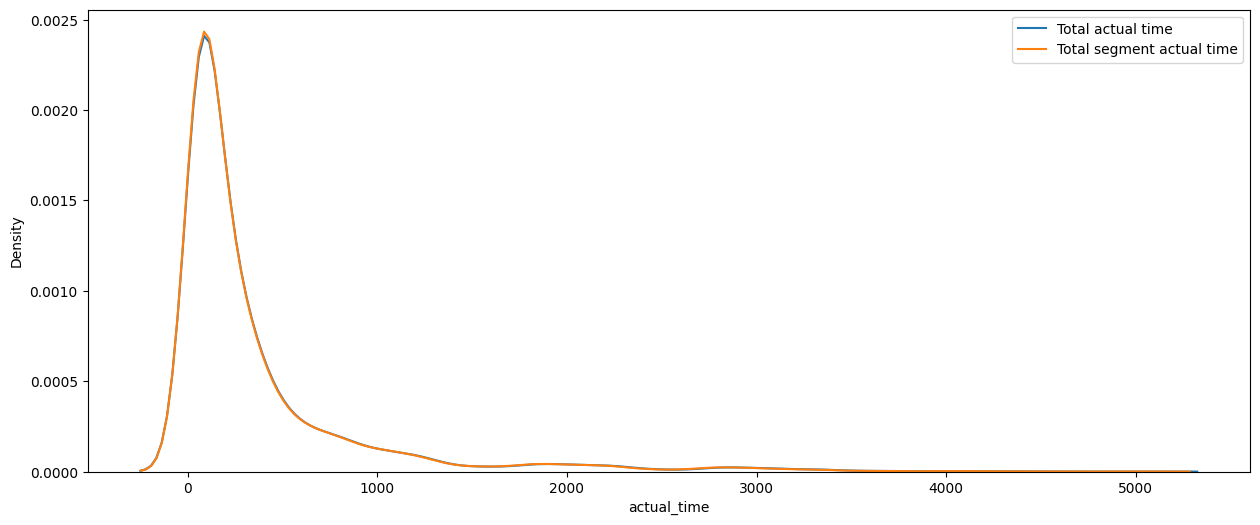

In [143]:
plt.figure(figsize = (15, 6))
sns.kdeplot(data = tr_df_tripid_grouped, x = 'actual_time', label = 'Total actual time', alpha = 1)
sns.kdeplot(data = tr_df_tripid_grouped, x = 'segment_actual_time', label = 'Total segment actual time', alpha = 1)
plt.legend()
plt.show()

Observations:
1. The visualization above shows that both od_total_time and segment_actual_time features seem to be overlapping. This suggests that the data in both features are very similar. 

##### Checking for normality

Plotting the QQ plot for actual_time feature.


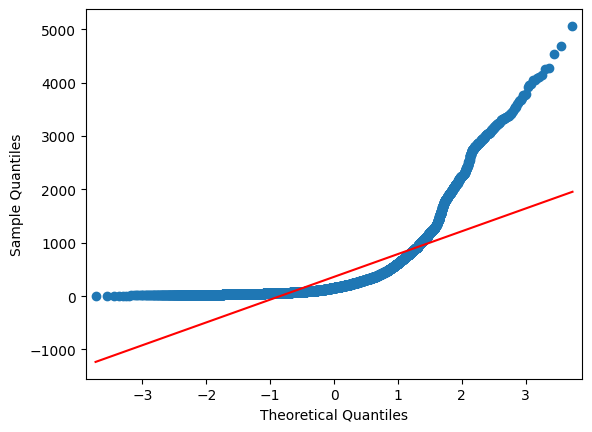

Performing Shapiro test - Test or Normality for actual_time:
------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [144]:
check_normality(tr_df_tripid_grouped, 'actual_time')

Plotting the QQ plot for segment_actual_time feature.


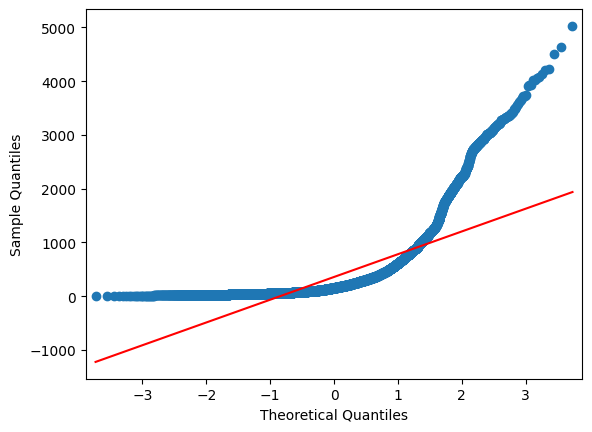

Performing Shapiro test - Test or Normality for segment_actual_time:
--------------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [145]:
check_normality(tr_df_tripid_grouped, 'segment_actual_time')

Plotting the QQ plot for trans_actual_time feature.


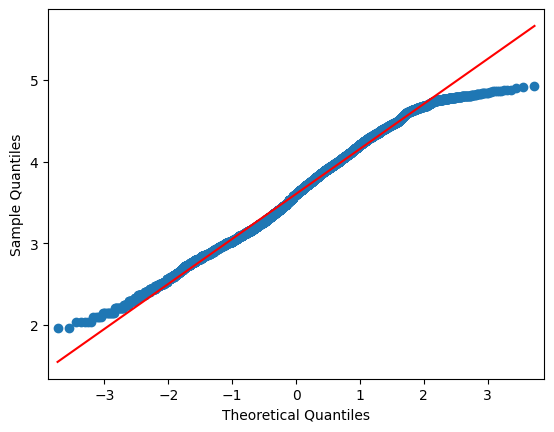

Performing Shapiro test - Test or Normality for trans_actual_time:
------------------------------------------------------------------
>>p-value 4.519472872863014e-25
Result: The sample does not follow normal distribution


In [146]:
tr_df_tripid_grouped['trans_actual_time'] = stat.boxcox(tr_df_tripid_grouped['actual_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_actual_time')

Plotting the QQ plot for trans_actual_time feature.


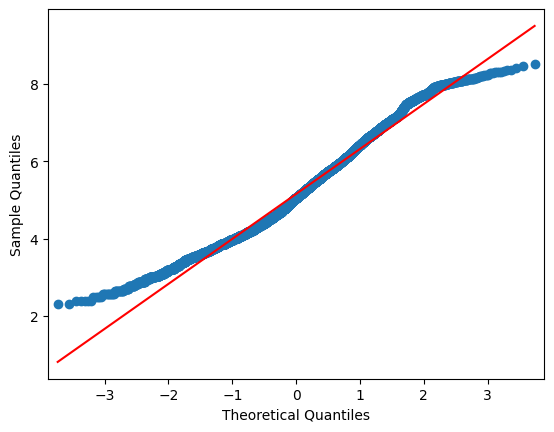

Performing Shapiro test - Test or Normality for trans_actual_time:
------------------------------------------------------------------
>>p-value 3.7976778643962185e-35
Result: The sample does not follow normal distribution


In [147]:
tr_df_tripid_grouped['trans_actual_time'] = np.log(tr_df_tripid_grouped['actual_time'])
check_normality(tr_df_tripid_grouped, 'trans_actual_time')

Observations:
1. For actual_time feature, the boxcox transformation with the p-value of 4.519472872863014e-25 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 3.7976778643962185e-35 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Plotting the QQ plot for trans_segment_actual_time feature.


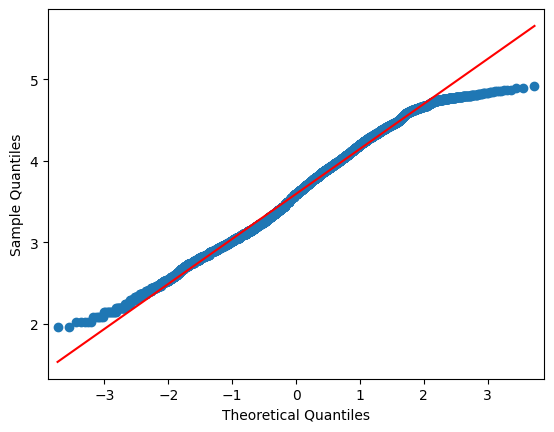

Performing Shapiro test - Test or Normality for trans_segment_actual_time:
--------------------------------------------------------------------------
>>p-value 2.657709367544521e-25
Result: The sample does not follow normal distribution


In [148]:
tr_df_tripid_grouped['trans_segment_actual_time'] = stat.boxcox(tr_df_tripid_grouped['segment_actual_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_segment_actual_time')

Plotting the QQ plot for trans_segment_actual_time feature.


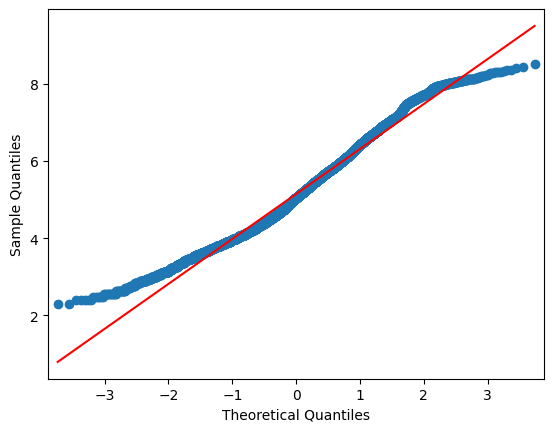

Performing Shapiro test - Test or Normality for trans_segment_actual_time:
--------------------------------------------------------------------------
>>p-value 2.8977766717974037e-35
Result: The sample does not follow normal distribution


In [149]:
tr_df_tripid_grouped['trans_segment_actual_time'] = np.log(tr_df_tripid_grouped['segment_actual_time'])
check_normality(tr_df_tripid_grouped, 'trans_segment_actual_time')

Observations:
1. For segment_actual_time feature, the boxcox transformation with the p-value of 4.519472872863014e-25 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 2.8977766717974037e-35 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Homogeneity of Variances using Lavene's test

In [150]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stat.levene(tr_df_tripid_grouped['actual_time'], tr_df_tripid_grouped['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.7281827942948772
The samples have Homogenous Variance 


Observations: 
1. The samples are not normally distributed. Hence we cannot apply t-test here.
2. We can opt for the Mann-Whitney U test which is the non parametric equivalent of the t-test.
3. The Mann-Whitney U test is a non-parametric test that can be used when the assumptions of the t-test are not met. It is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [151]:
test_stat, p_value = stat.mannwhitneyu(tr_df_tripid_grouped['actual_time'], tr_df_tripid_grouped['segment_actual_time'])
print('P-value :',p_value)
if p_value < 0.05:
    print('The samples are not similar.')
else:
    print('The samples are similar.') 

P-value : 0.48605796338934215
The samples are similar.


Observations:
1. The p-value (0.49) is greater than the alpha(0.5). Hence, we can conclude that the features actual_time and segment_actual_time are similar.

###### osrm distance aggregated value vs segment osrm distance aggregated value

In [152]:
tr_df_tripid_grouped[["osrm_distance","segment_osrm_distance"]].describe().reset_index()

index  osrm_distance  segment_osrm_distance
0  count   10654.000000           10654.000000
1   mean     207.502716             225.933365
2    std     365.361023             409.231781
3    min       9.072900               9.072900
4    25%      31.572950              33.516726
5    50%      70.295399              73.536549
6    75%     213.882603             226.864552
7    max    2839.358154            3523.632324

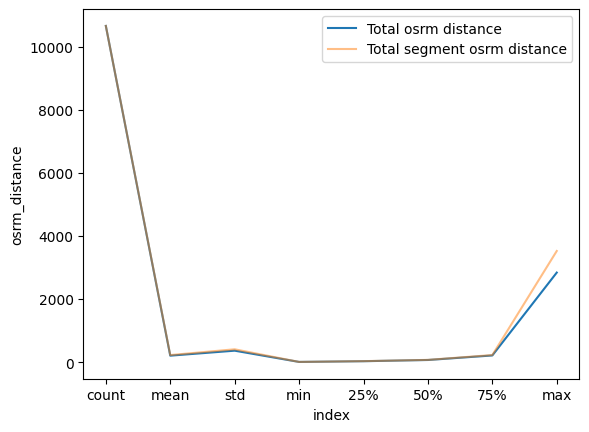

In [153]:
d = tr_df_tripid_grouped[["osrm_distance","segment_osrm_distance"]].describe().reset_index()
sns.lineplot(data = d, x = 'index', y = 'osrm_distance', label = 'Total osrm distance', alpha = 1)
sns.lineplot(data = d, x = 'index', y = 'segment_osrm_distance', label = 'Total segment osrm distance', alpha = 0.5)
plt.legend()
plt.show()

Observations:
1. The above visualization shows that the statistical parameters of osrm_distance and the segment_osrm_distance are very similar.

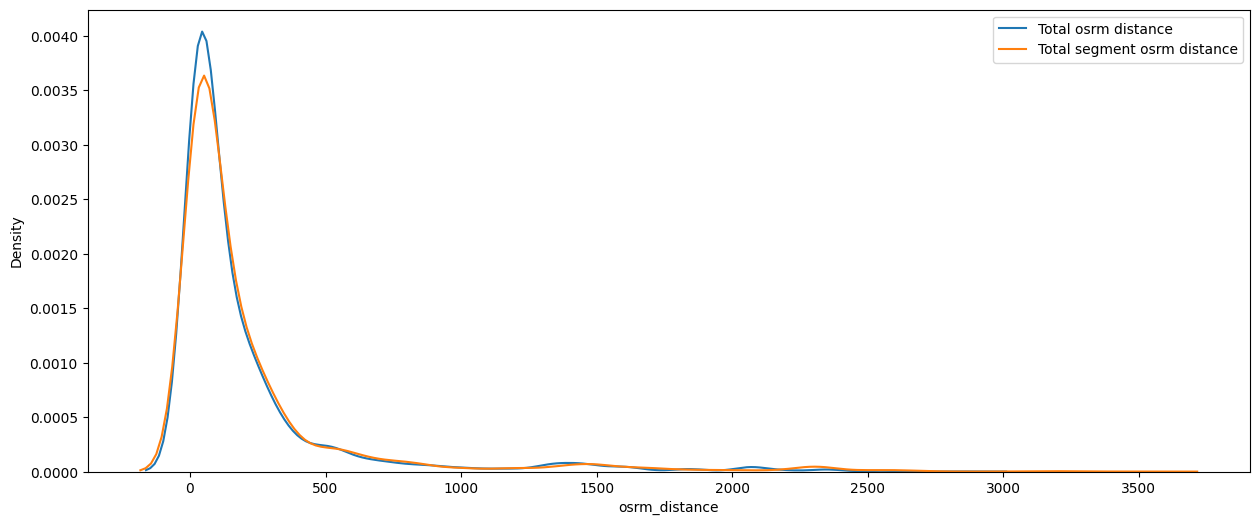

In [154]:
plt.figure(figsize = (15, 6))
sns.kdeplot(data = tr_df_tripid_grouped, x = 'osrm_distance', label = 'Total osrm distance', alpha = 1)
sns.kdeplot(data = tr_df_tripid_grouped, x = 'segment_osrm_distance', label = 'Total segment osrm distance', alpha = 1)
plt.legend()
plt.show()

Observations:
1. The visualization above shows that both osrm_distance and segment_osrm_distance features seem to be overlapping. This suggests that the data in both features are very similar. 
2. Slightly more data in osrm_distance is very close to 0.

##### Checking for normality

Plotting the QQ plot for osrm_distance feature.


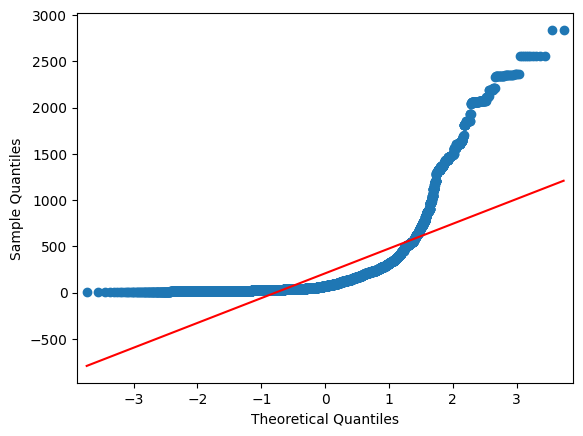

Performing Shapiro test - Test or Normality for osrm_distance:
--------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [155]:
check_normality(tr_df_tripid_grouped, 'osrm_distance')

Plotting the QQ plot for segment_osrm_distance feature.


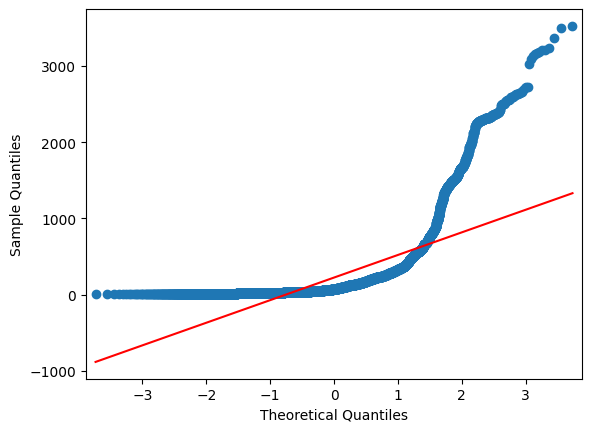

Performing Shapiro test - Test or Normality for segment_osrm_distance:
----------------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [156]:
check_normality(tr_df_tripid_grouped, "segment_osrm_distance")

Plotting the QQ plot for trans_osrm_distance feature.


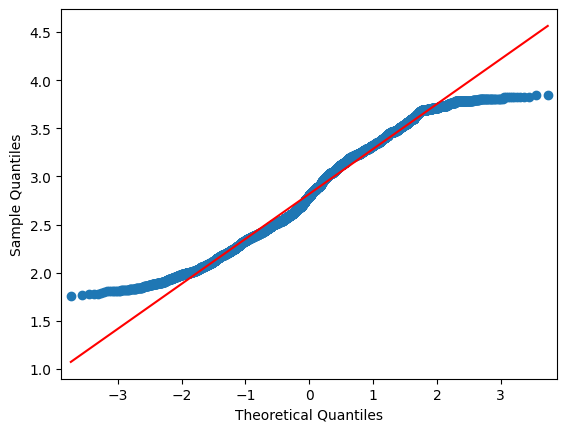

Performing Shapiro test - Test or Normality for trans_osrm_distance:
--------------------------------------------------------------------
>>p-value 2.782428275270749e-36
Result: The sample does not follow normal distribution


In [157]:
tr_df_tripid_grouped['trans_osrm_distance'] = stat.boxcox(tr_df_tripid_grouped['osrm_distance'])[0]
check_normality(tr_df_tripid_grouped, 'trans_osrm_distance')

Plotting the QQ plot for trans_osrm_distance feature.


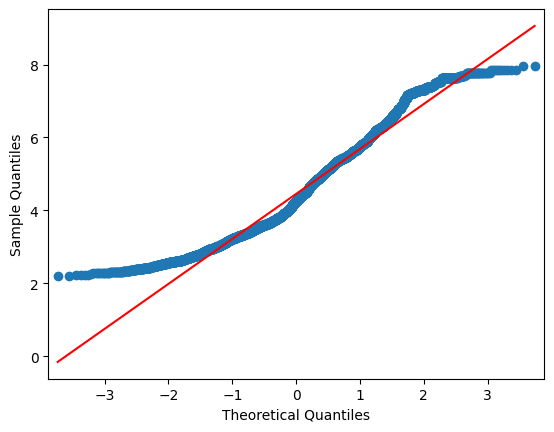

Performing Shapiro test - Test or Normality for trans_osrm_distance:
--------------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [158]:
tr_df_tripid_grouped['trans_osrm_distance'] = np.log(tr_df_tripid_grouped['osrm_distance'])
check_normality(tr_df_tripid_grouped, 'trans_osrm_distance')

Observations:
1. For osrm_distance feature, the boxcox transformation with the p-value of 2.782428275270749e-36 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 0.0 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Plotting the QQ plot for trans_segment_osrm_distance feature.


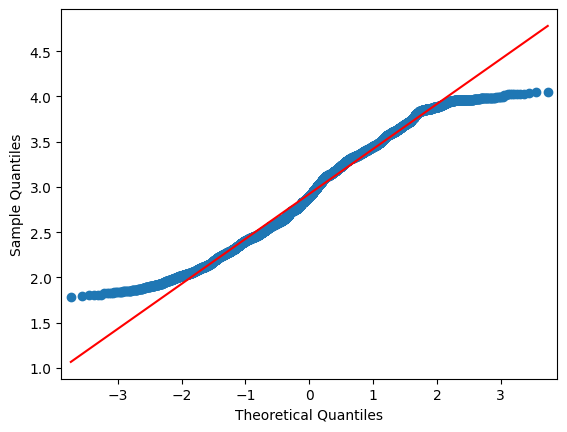

Performing Shapiro test - Test or Normality for trans_segment_osrm_distance:
----------------------------------------------------------------------------
>>p-value 6.898937314890138e-34
Result: The sample does not follow normal distribution


In [159]:
tr_df_tripid_grouped['trans_segment_osrm_distance'] = stat.boxcox(tr_df_tripid_grouped['segment_osrm_distance'])[0]
check_normality(tr_df_tripid_grouped, 'trans_segment_osrm_distance')

Plotting the QQ plot for trans_segment_osrm_distance feature.


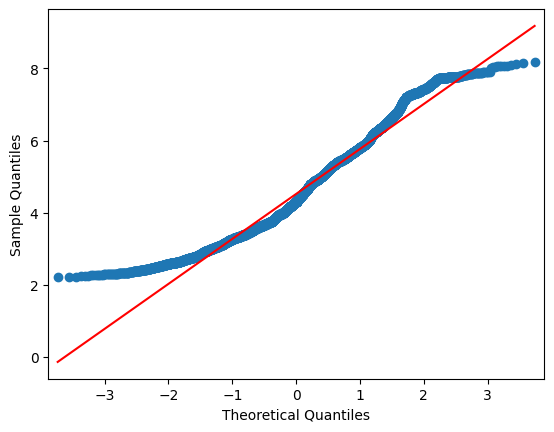

Performing Shapiro test - Test or Normality for trans_segment_osrm_distance:
----------------------------------------------------------------------------
>>p-value 7.006492321624085e-45
Result: The sample does not follow normal distribution


In [160]:
tr_df_tripid_grouped['trans_segment_osrm_distance'] = np.log(tr_df_tripid_grouped['segment_osrm_distance'])
check_normality(tr_df_tripid_grouped, 'trans_segment_osrm_distance')

Observations:
1. For segment_osrm_distance feature, the boxcox transformation with the p-value of 6.898937314890138e-34 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 7.006492321624085e-45 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Homogeneity of Variances using Lavene's test

In [161]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stat.levene(tr_df_tripid_grouped['osrm_distance'], tr_df_tripid_grouped['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.0018542847149972878
The samples do not have  Homogenous Variance


Observations: 
1. The samples are not normally distributed. Hence we cannot apply t-test here.
2. We can opt for the Mann-Whitney U test which is the non parametric equivalent of the t-test.
3. The Mann-Whitney U test is a non-parametric test that can be used when the assumptions of the t-test are not met. It is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [162]:
test_stat, p_value = stat.mannwhitneyu(tr_df_tripid_grouped['osrm_distance'], tr_df_tripid_grouped['segment_osrm_distance'])
print('P-value :',p_value)
if p_value < 0.05:
    print('The samples are not similar.')
else:
    print('The samples are similar.') 

P-value : 3.573612732608438e-05
The samples are not similar.


Observations:
1. Although visually osrm_distance and segment_osrm_distance features look similar, the p-value (3.573612732608438e-05) is lesser than the alpha(0.5). Hence, we can conclude that the features osrm_distance and segment_osrm_distance are not similar.

###### osrm time aggregated value vs segment osrm time aggregated value

In [163]:
tr_df_tripid_grouped[["osrm_time","segment_osrm_time"]].describe().reset_index()

index     osrm_time  segment_osrm_time
0  count  10654.000000       10654.000000
1   mean    164.123611         183.373657
2    std    267.959534         308.917664
3    min      7.000000           7.000000
4    25%     30.000000          31.000000
5    50%     62.000000          68.000000
6    75%    173.000000         190.000000
7    max   2031.000000        2564.000000

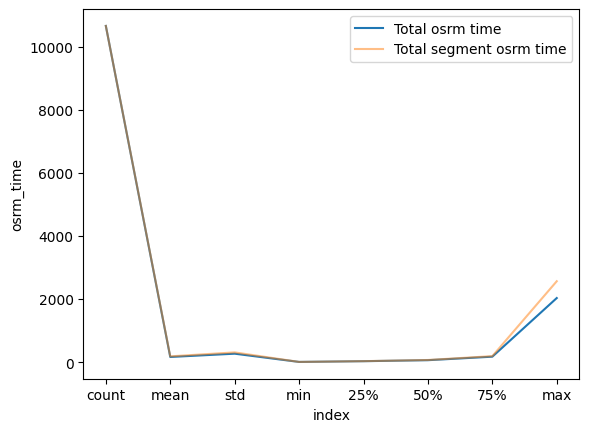

In [164]:
d = tr_df_tripid_grouped[["osrm_time","segment_osrm_time"]].describe().reset_index()
sns.lineplot(data = d, x = 'index', y = 'osrm_time', label = 'Total osrm time', alpha = 1)
sns.lineplot(data = d, x = 'index', y = 'segment_osrm_time', label = 'Total segment osrm time', alpha = 0.5)
plt.legend()
plt.show()

Observations:
1. The above visualization shows that the statistical parameters of osrm_time and the segment_osrm_time are very similar.

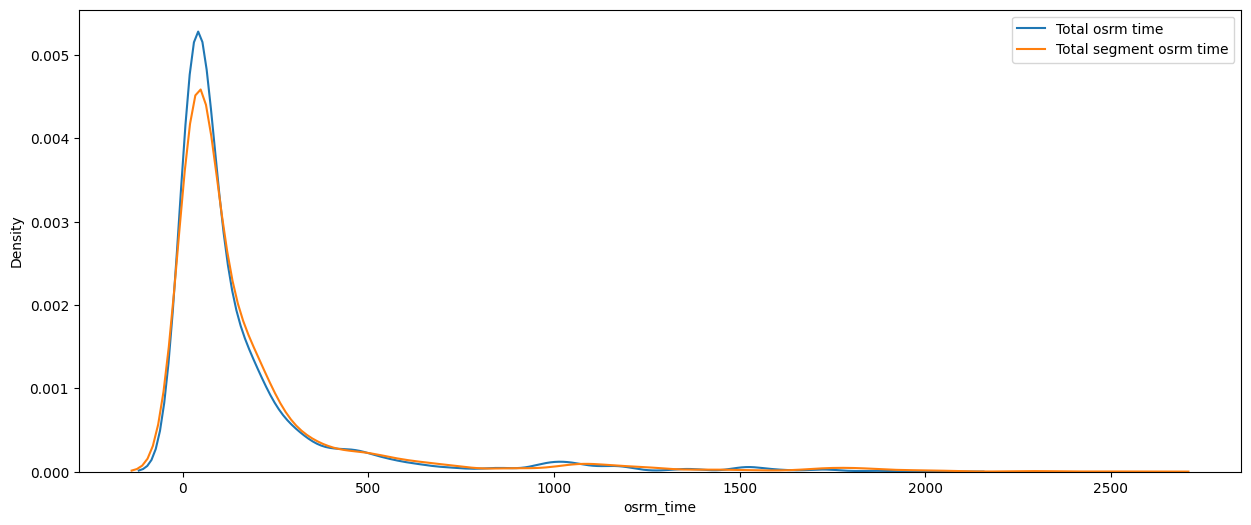

In [165]:
plt.figure(figsize = (15, 6))
sns.kdeplot(data = tr_df_tripid_grouped, x = 'osrm_time', label = 'Total osrm time', alpha = 1)
sns.kdeplot(data = tr_df_tripid_grouped, x = 'segment_osrm_time', label = 'Total segment osrm time', alpha = 1)
plt.legend()
plt.show()

Observations:
1. The visualization above shows that both osrm_distance and segment_osrm_distance features seem to be overlapping. This suggests that the data in both features are very similar. 
2. Slightly more data in osrm_distance is very close to 0.

##### Checking for normality

Plotting the QQ plot for osrm_time feature.


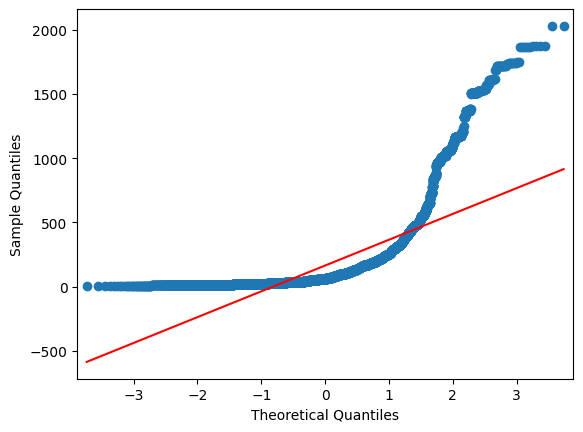

Performing Shapiro test - Test or Normality for osrm_time:
----------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [166]:
check_normality(tr_df_tripid_grouped, 'osrm_time')

Plotting the QQ plot for segment_osrm_time feature.


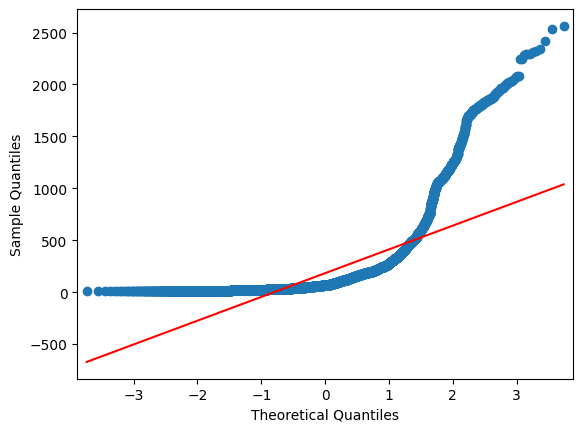

Performing Shapiro test - Test or Normality for segment_osrm_time:
------------------------------------------------------------------
>>p-value 0.0
Result: The sample does not follow normal distribution


In [167]:
check_normality(tr_df_tripid_grouped, "segment_osrm_time")

Plotting the QQ plot for trans_osrm_time feature.


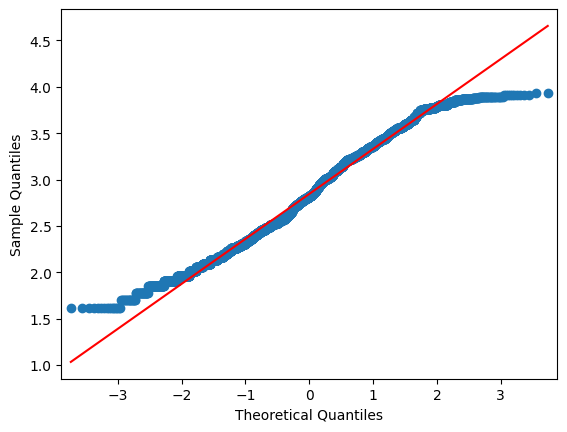

Performing Shapiro test - Test or Normality for trans_osrm_time:
----------------------------------------------------------------
>>p-value 6.0599456229805425e-31
Result: The sample does not follow normal distribution


In [168]:
tr_df_tripid_grouped['trans_osrm_time'] = stat.boxcox(tr_df_tripid_grouped['osrm_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_osrm_time')

Plotting the QQ plot for trans_osrm_time feature.


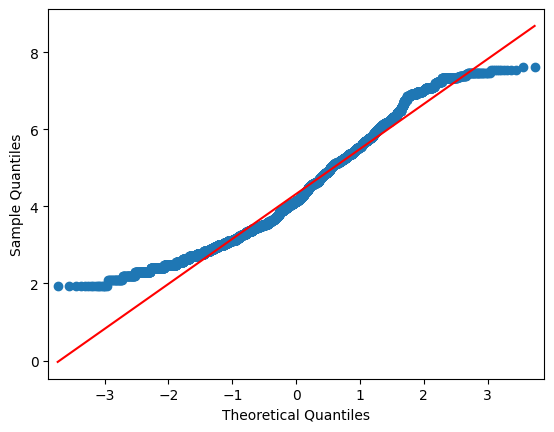

Performing Shapiro test - Test or Normality for trans_osrm_time:
----------------------------------------------------------------
>>p-value 9.640933434554741e-43
Result: The sample does not follow normal distribution


In [169]:
tr_df_tripid_grouped['trans_osrm_time'] = np.log(tr_df_tripid_grouped['osrm_time'])
check_normality(tr_df_tripid_grouped, 'trans_osrm_time')

Observations:
1. For osrm_time feature, the boxcox transformation with the p-value of 6.0599456229805425e-31 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 9.640933434554741e-43 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Plotting the QQ plot for trans_segment_osrm_time feature.


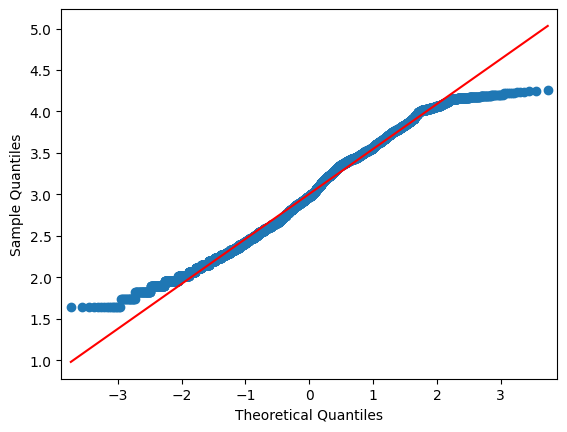

Performing Shapiro test - Test or Normality for trans_segment_osrm_time:
------------------------------------------------------------------------
>>p-value 8.674675854379e-30
Result: The sample does not follow normal distribution


In [170]:
tr_df_tripid_grouped['trans_segment_osrm_time'] = stat.boxcox(tr_df_tripid_grouped['segment_osrm_time'])[0]
check_normality(tr_df_tripid_grouped, 'trans_segment_osrm_time')

Plotting the QQ plot for trans_segment_osrm_time feature.


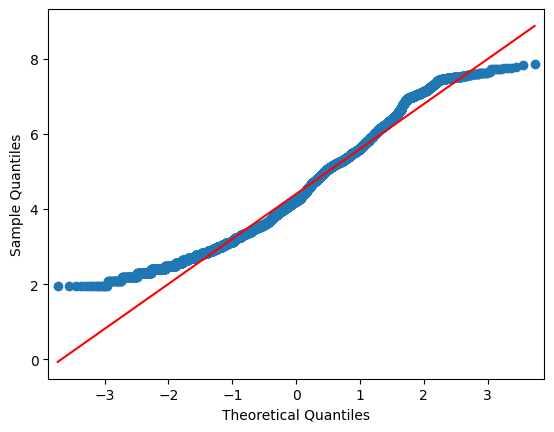

Performing Shapiro test - Test or Normality for trans_segment_osrm_time:
------------------------------------------------------------------------
>>p-value 1.3546772644167304e-40
Result: The sample does not follow normal distribution


In [171]:
tr_df_tripid_grouped['trans_segment_osrm_time'] = np.log(tr_df_tripid_grouped['segment_osrm_time'])
check_normality(tr_df_tripid_grouped, 'trans_segment_osrm_time')

Observations:
1. For osrm_time feature, the boxcox transformation with the p-value of 8.674675854379e-30 in Shapiro test is more likely to be normally distributed because its p-value is larger than the p-value of 1.3546772644167304e-40 from the numpy log transformation. However, both p-values are extremely smaller than alpha = 0.05. So in both cases, we would reject the null hypothesis of normality. This suggests that neither transformation is working here. So, considering using non-parametric statistical methods.

Homogeneity of Variances using Lavene's test

In [172]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = stat.levene(tr_df_tripid_grouped['osrm_time'], tr_df_tripid_grouped['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 5.905264969066188e-06
The samples do not have  Homogenous Variance


Observations: 
1. The samples are not normally distributed. Hence we cannot apply t-test here.
2. We can opt for the Mann-Whitney U test which is the non parametric equivalent of the t-test.
3. The Mann-Whitney U test is a non-parametric test that can be used when the assumptions of the t-test are not met. It is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

In [173]:
test_stat, p_value = stat.mannwhitneyu(tr_df_tripid_grouped['osrm_time'], tr_df_tripid_grouped['segment_osrm_time'])
print('P-value :',p_value)
if p_value < 0.05:
    print('The samples are not similar.')
else:
    print('The samples are similar.') 

P-value : 1.5605357729940005e-06
The samples are not similar.


Observations:
1. The p-value (1.5605357729940005e-06) is lesser than the alpha(0.5). Hence, we can conclude that the features osrm_time and segment_osrm_time are not similar.

In [174]:
# dropping the transformed columns since they are not useful
tr_df_tripid_grouped = tr_df_tripid_grouped.drop(['trans_od_total_time', 'trans_start_scan_to_end_scan',
       'trans_actual_time', 'trans_osrm_time', 'trans_segment_actual_time',
       'trans_osrm_distance', 'trans_segment_osrm_distance',
       'trans_segment_osrm_time'], axis = 1)

In [175]:
tr_df_tripid_grouped.head(2)

trip_uuid      data         trip_creation_time route_type  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741        FTL   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430    Carting   

                          source_name source_center  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  IND209304AAA   
1   Doddablpur_ChikaDPP_D (Karnataka)  IND561203AAB   

                     destination_name destination_center  od_total_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA        2260.11   
1   Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB         181.61   

   start_scan_to_end_scan  ...  destination_state  trip_creation_date  \
0                  2259.0  ...      Uttar Pradesh          2018-09-12   
1                   180.0  ...          Karnataka          2018-09-12   

   trip_creation_day  trip_creation_month  trip_creation_year  \
0                 12                    9                2018   
1                 12                    9                2018   

   trip_creation_week  trip_creation_hour trip_creation_min trip_creation_sec  \
0                  37                   0                 0                16   
1                  37                   0                 0                22   

  trip_creation_micsec  
0               535741  
1               886430  

[2 rows x 32 columns]

# 7. Handling categorical values

One-hot encoding the 'route_type' categorical variables (like route_type)

In [176]:
# training dataset

tr_df_tripid_grouped['route_type'].value_counts()

route_type
Carting    6245
FTL        4409
Name: count, dtype: int64

In [177]:
# Test data
ts_df_tripid_grouped['route_type'].value_counts()

route_type
Carting    2663
FTL        1500
Name: count, dtype: int64

In [178]:
label_encoder = LabelEncoder()
tr_df_tripid_grouped['encoded_route_type'] = label_encoder.fit_transform(tr_df_tripid_grouped['route_type'])
ts_df_tripid_grouped['encoded_route_type'] = label_encoder.transform(ts_df_tripid_grouped['route_type'])

In [179]:
#Checking transformation in training dataset
tr_df_tripid_grouped['encoded_route_type'].value_counts()

encoded_route_type
0    6245
1    4409
Name: count, dtype: int64

In [180]:
#Checking transformation in test dataset
ts_df_tripid_grouped['encoded_route_type'].value_counts()

encoded_route_type
0    2663
1    1500
Name: count, dtype: int64

In [181]:
tr_df_tripid_grouped.dtypes[tr_df_tripid_grouped.dtypes == 'object']

trip_uuid             object
source_name           object
source_center         object
destination_name      object
destination_center    object
source_place          object
source_city           object
source_state          object
destination_place     object
destination_city      object
destination_state     object
dtype: object

Considering the route type as the target for the encoding

In [182]:
sc_target_encoder = TargetEncoder()
dc_target_encoder = TargetEncoder()
splace_target_encoder = TargetEncoder()
scity_target_encoder = TargetEncoder()
sstate_target_encoder = TargetEncoder()
dplace_target_encoder = TargetEncoder()
dcity_target_encoder = TargetEncoder()
dstate_target_encoder = TargetEncoder()

tr_df_tripid_grouped['enc_source_center'] = sc_target_encoder\
.fit_transform(tr_df_tripid_grouped['source_center'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_destination_center'] = dc_target_encoder\
.fit_transform(tr_df_tripid_grouped['destination_center'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_source_place'] = splace_target_encoder\
.fit_transform(tr_df_tripid_grouped['source_place'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_source_city'] = scity_target_encoder\
.fit_transform(tr_df_tripid_grouped['source_city'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_source_state'] = sstate_target_encoder\
.fit_transform(tr_df_tripid_grouped['source_state'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_destination_place'] = dplace_target_encoder\
.fit_transform(tr_df_tripid_grouped['destination_place'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_destination_city'] = dcity_target_encoder\
.fit_transform(tr_df_tripid_grouped['destination_city'], tr_df_tripid_grouped['encoded_route_type'])

tr_df_tripid_grouped['enc_destination_state'] = dstate_target_encoder\
.fit_transform(tr_df_tripid_grouped['destination_state'], tr_df_tripid_grouped['encoded_route_type'])

In [183]:
tr_df_tripid_grouped.head()

trip_uuid      data         trip_creation_time route_type  \
0  trip-153671041653548748  training 2018-09-12 00:00:16.535741        FTL   
1  trip-153671042288605164  training 2018-09-12 00:00:22.886430    Carting   
2  trip-153671043369099517  training 2018-09-12 00:00:33.691250        FTL   
3  trip-153671046011330457  training 2018-09-12 00:01:00.113710    Carting   
4  trip-153671052974046625  training 2018-09-12 00:02:09.740725        FTL   

                          source_name source_center  \
0  Kanpur_Central_H_6 (Uttar Pradesh)  IND209304AAA   
1   Doddablpur_ChikaDPP_D (Karnataka)  IND561203AAB   
2       Gurgaon_Bilaspur_HB (Haryana)  IND000000ACB   
3            Mumbai Hub (Maharashtra)  IND400072AAB   
4              Bellary_Dc (Karnataka)  IND583101AAA   

                     destination_name destination_center  od_total_time  \
0  Kanpur_Central_H_6 (Uttar Pradesh)       IND209304AAA        2260.11   
1   Doddablpur_ChikaDPP_D (Karnataka)       IND561203AAB         181.61   
2       Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB        3934.36   
3      Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA         100.49   
4       Sandur_WrdN1DPP_D (Karnataka)       IND583119AAA         718.34   

   start_scan_to_end_scan  ...  trip_creation_micsec  encoded_route_type  \
0                  2259.0  ...                535741                   1   
1                   180.0  ...                886430                   0   
2                  3933.0  ...                691250                   1   
3                   100.0  ...                113710                   0   
4                   717.0  ...                740725                   1   

   enc_source_center  enc_destination_center  enc_source_place  \
0           0.572684                0.779883          0.572684   
1           0.310484                0.318043          0.310484   
2           0.486486                0.416933          0.486486   
3           0.042328                0.000021          0.376258   
4           0.583266                0.539371          0.736129   

   enc_source_city  enc_source_state enc_destination_place  \
0         0.472479          0.443396              0.779883   
1         0.310484          0.192802              0.318043   
2         0.450000          0.427941              0.416933   
3         0.012945          0.324599              0.000021   
4         0.583266          0.192802              0.539371   

  enc_destination_city enc_destination_state  
0             0.529380              0.479021  
1             0.318043              0.247305  
2             0.390719              0.327935  
3             0.006658              0.284742  
4             0.539371              0.247305  

[5 rows x 41 columns]

In [184]:
ts_df_tripid_grouped['enc_source_center'] = sc_target_encoder\
.transform(ts_df_tripid_grouped['source_center'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_destination_center'] = dc_target_encoder\
.transform(ts_df_tripid_grouped['destination_center'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_source_place'] = splace_target_encoder\
.transform(ts_df_tripid_grouped['source_place'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_source_city'] = scity_target_encoder\
.transform(ts_df_tripid_grouped['source_city'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_source_state'] = sstate_target_encoder\
.transform(ts_df_tripid_grouped['source_state'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_destination_place'] = dplace_target_encoder\
.transform(ts_df_tripid_grouped['destination_place'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_destination_city'] = dcity_target_encoder\
.transform(ts_df_tripid_grouped['destination_city'], ts_df_tripid_grouped['encoded_route_type'])

ts_df_tripid_grouped['enc_destination_state'] = dstate_target_encoder\
.transform(ts_df_tripid_grouped['destination_state'], ts_df_tripid_grouped['encoded_route_type'])

In [185]:
ts_df_tripid_grouped.head()

trip_uuid  data         trip_creation_time route_type  \
0  trip-153800653897073708  test 2018-09-27 00:02:18.970980    Carting   
1  trip-153800654935210748  test 2018-09-27 00:02:29.352390    Carting   
2  trip-153800658820968126  test 2018-09-27 00:03:08.209931        FTL   
3  trip-153800659468028518  test 2018-09-27 00:03:14.680535    Carting   
4  trip-153800661729668086  test 2018-09-27 00:03:37.296972    Carting   

                      source_name source_center  \
0  Dhule_MIDCAvdn_I (Maharashtra)  IND424006AAA   
1        Mumbai Hub (Maharashtra)  IND400072AAB   
2          Jaipur_Hub (Rajasthan)  IND302014AAA   
3     Mumbai_Kalyan (Maharashtra)  IND421302AAF   
4    Surat_Central_D_12 (Gujarat)  IND395009AAA   

                      destination_name destination_center  od_total_time  \
0  Chalisgaon_BhadgDPP_D (Maharashtra)       IND424101AAA         145.82   
1       Mumbai_MiraRd_IP (Maharashtra)       IND401104AAA          81.11   
2        Gurgaon_Bilaspur_HB (Haryana)       IND000000ACB         610.77   
3       Mumbai_East_I_21 (Maharashtra)       IND421302AAR         104.51   
4          Surat_Central_I_4 (Gujarat)       IND395023AAD         228.87   

   start_scan_to_end_scan  ...  trip_creation_micsec  encoded_route_type  \
0                   145.0  ...                970980                   0   
1                    81.0  ...                352390                   0   
2                   610.0  ...                209931                   1   
3                   104.0  ...                680535                   0   
4                   228.0  ...                296972                   0   

   enc_source_center  enc_destination_center  enc_source_place  \
0           0.606918                0.359992          0.606918   
1           0.042328                0.000021          0.376258   
2           0.988370                0.416933          0.376258   
3           0.338341                0.069517          0.338341   
4           0.310484                0.302538          0.310484   

   enc_source_city  enc_source_state enc_destination_place  \
0         0.606918          0.324599              0.359992   
1         0.012945          0.324599              0.000021   
2         0.331461          0.560000              0.416933   
3         0.012945          0.324599              0.069517   
4         0.419351          0.507843              0.302538   

  enc_destination_city enc_destination_state  
0             0.359992              0.284742  
1             0.006658              0.284742  
2             0.390719              0.327935  
3             0.006658              0.284742  
4             0.351632              0.491870  

[5 rows x 41 columns]

Observations:
1. The trip_uuid is unique to each of the row. It can be used just for the identification of a datapoint. 
2. The 'trip_creation_date', 'data', 'trip_creation_time', 'route_type', 'source_name','source_center', 'destination_name', 'destination_center', 'source_place', 'source_city', 'source_state', 'destination_place', 'destination_city', 'destination_state' are all not required anymore. Hence these two features can be dropped.

In [186]:
drop_columns = ['trip_creation_date', 'data', 'trip_creation_time', 'route_type', 'source_name',
       'source_center', 'destination_name', 'destination_center', 'source_place', 'source_city', 'source_state',
       'destination_place', 'destination_city', 'destination_state']
tr_enc_grp_data = tr_df_tripid_grouped.drop(drop_columns, axis = 1)
tr_enc_grp_data.head()

trip_uuid  od_total_time  start_scan_to_end_scan  \
0  trip-153671041653548748        2260.11                  2259.0   
1  trip-153671042288605164         181.61                   180.0   
2  trip-153671043369099517        3934.36                  3933.0   
3  trip-153671046011330457         100.49                   100.0   
4  trip-153671052974046625         718.34                   717.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                      824.732849       1562.0      717.0     991.352295   
1                       73.186905        143.0       68.0      85.111000   
2                     1927.404297       3347.0     1740.0    2354.066650   
3                       17.175274         59.0       15.0      19.680000   
4                      127.448502        341.0      117.0     146.791794   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  ...  \
0               1548.0             1008.0            1320.473267  ...   
1                141.0               65.0              84.189400  ...   
2               3308.0             1941.0            2545.267822  ...   
3                 59.0               16.0              19.876600  ...   
4                340.0              115.0             146.791901  ...   

   trip_creation_micsec  encoded_route_type  enc_source_center  \
0                535741                   1           0.572684   
1                886430                   0           0.310484   
2                691250                   1           0.486486   
3                113710                   0           0.042328   
4                740725                   1           0.583266   

   enc_destination_center  enc_source_place  enc_source_city  \
0                0.779883          0.572684         0.472479   
1                0.318043          0.310484         0.310484   
2                0.416933          0.486486         0.450000   
3                0.000021          0.376258         0.012945   
4                0.539371          0.736129         0.583266   

   enc_source_state  enc_destination_place  enc_destination_city  \
0          0.443396               0.779883              0.529380   
1          0.192802               0.318043              0.318043   
2          0.427941               0.416933              0.390719   
3          0.324599               0.000021              0.006658   
4          0.192802               0.539371              0.539371   

   enc_destination_state  
0               0.479021  
1               0.247305  
2               0.327935  
3               0.284742  
4               0.247305  

[5 rows x 27 columns]

In [187]:
ts_enc_grp_data = ts_df_tripid_grouped.drop(drop_columns, axis = 1)
ts_enc_grp_data.head()

trip_uuid  od_total_time  start_scan_to_end_scan  \
0  trip-153800653897073708         145.82                   145.0   
1  trip-153800654935210748          81.11                    81.0   
2  trip-153800658820968126         610.77                   610.0   
3  trip-153800659468028518         104.51                   104.0   
4  trip-153800661729668086         228.87                   228.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       49.557159        128.0       40.0      56.874500   
1                       17.774611         58.0       17.0      21.731001   
2                      196.041260        334.0      163.0     220.843002   
3                        9.198088         27.0        9.0      11.554900   
4                       13.411425        132.0       17.0      18.183599   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  ...  \
0                126.0               47.0              67.492500  ...   
1                 58.0               17.0              21.730999  ...   
2                334.0              163.0             220.843002  ...   
3                 27.0                9.0              11.554900  ...   
4                131.0               17.0              18.183601  ...   

   trip_creation_micsec  encoded_route_type  enc_source_center  \
0                970980                   0           0.606918   
1                352390                   0           0.042328   
2                209931                   1           0.988370   
3                680535                   0           0.338341   
4                296972                   0           0.310484   

   enc_destination_center  enc_source_place  enc_source_city  \
0                0.359992          0.606918         0.606918   
1                0.000021          0.376258         0.012945   
2                0.416933          0.376258         0.331461   
3                0.069517          0.338341         0.012945   
4                0.302538          0.310484         0.419351   

   enc_source_state  enc_destination_place  enc_destination_city  \
0          0.324599               0.359992              0.359992   
1          0.324599               0.000021              0.006658   
2          0.560000               0.416933              0.390719   
3          0.324599               0.069517              0.006658   
4          0.507843               0.302538              0.351632   

   enc_destination_state  
0               0.284742  
1               0.284742  
2               0.327935  
3               0.284742  
4               0.491870  

[5 rows x 27 columns]

# 8. Column Normalization /Column Standardization

1. I will be using the minmax scaler for 'trip_creation_day', 'trip_creation_month', trip_creation_week', 'trip_creation_hour', 'trip_creation_min' and 'trip_creation_sec' since we know the bounds of these features.

2. Since the other numerical features in the given dataset is not normally distributed and since there are a lot of outliers in the data, it will make sense to use the RobustScaler from sklear to standardize the dataset.

3. I will be considering the route type as the target variable. Hence I will not be normalizing/standardizing this feature.

**Robust Scaler:**
RobustScaler is a technique used in preprocessing that removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)1.

You should consider using RobustScaler when:

1. Presence of Outliers: If your dataset contains outliers, RobustScaler can be a good choice. This is because it uses statistics that are robust to outliers1. It uses the interquartile range, so the impact of outliers is minimized.

2. Standardization Requirement: Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean/ variance in a negative way. In such cases, the median and the interquartile range often give better results.

3. Reducing Impact of Outliers: Compared to MinMaxScaler, RobustScaler reduces the effects of outliers.

The following features are standardized using the RobustScaler class- 

'od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
'osrm_distance', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance','trip_creation_year', 'trip_creation_micsec', 'enc_source_center', 'enc_destination_center', 'enc_source_place', 'enc_source_city', 'enc_source_state', 'enc_destination_place', 'enc_destination_city' and 'enc_destination_state'.

The following features are normalized using the MinMaxScaler class - 
'trip_creation_day', 'trip_creation_month', 'trip_creation_week', 'trip_creation_hour', 'trip_creation_min' and 
'trip_creation_sec'

In [188]:
scale_ott = RobustScaler()
scale_strt_end_scan = RobustScaler()
scale_act_dist_dest = RobustScaler()
scale_act_time = RobustScaler()
scale_osrm_time = RobustScaler()
scale_osrm_distance = RobustScaler()
scale_segment_actual_time = RobustScaler()
scale_segment_osrm_time = RobustScaler()
scale_segment_osrm_distance = RobustScaler()
scale_trip_creation_year = RobustScaler()
scale_trip_creation_micsec = RobustScaler()
scale_enc_source_center = RobustScaler()
scale_enc_destination_center = RobustScaler()
scale_enc_source_place = RobustScaler()
scale_enc_source_city = RobustScaler()
scale_enc_source_state = RobustScaler()
scale_enc_destination_place = RobustScaler()
scale_enc_destination_city = RobustScaler()
scale_enc_destination_state = RobustScaler()

scale_trip_creation_day = MinMaxScaler()
scale_trip_creation_month = MinMaxScaler()
scale_trip_creation_year = MinMaxScaler()
scale_trip_creation_week = MinMaxScaler()
scale_trip_creation_hour = MinMaxScaler()
scale_trip_creation_min = MinMaxScaler()
scale_trip_creation_sec = MinMaxScaler()


tr_enc_grp_data['sc_od_total_time'] = scale_ott\
.fit_transform(tr_enc_grp_data['od_total_time'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_start_scan_to_end_scan'] = scale_strt_end_scan\
.fit_transform(tr_enc_grp_data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_actual_distance_to_destination'] = scale_act_dist_dest\
.fit_transform(tr_enc_grp_data['actual_distance_to_destination'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_actual_time'] = scale_act_time.fit_transform(tr_enc_grp_data['actual_time']\
.to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_osrm_time'] = scale_osrm_time.fit_transform(tr_enc_grp_data['osrm_time']\
.to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_osrm_distance'] = scale_osrm_distance.fit_transform(tr_enc_grp_data['osrm_distance']\
.to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_segment_actual_time'] = scale_segment_actual_time\
.fit_transform(tr_enc_grp_data['segment_actual_time'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_segment_osrm_time'] = scale_segment_osrm_time\
.fit_transform(tr_enc_grp_data['segment_osrm_time'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_segment_osrm_distance'] = scale_segment_osrm_distance\
.fit_transform(tr_enc_grp_data['segment_osrm_distance'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_year'] = scale_trip_creation_year\
.fit_transform(tr_enc_grp_data['trip_creation_year'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_micsec'] = scale_trip_creation_micsec\
.fit_transform(tr_enc_grp_data['trip_creation_micsec'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_source_center'] = scale_enc_source_center\
.fit_transform(tr_enc_grp_data['enc_source_center'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_destination_center'] = scale_enc_destination_center\
.fit_transform(tr_enc_grp_data['enc_destination_center'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_source_place'] = scale_enc_source_place\
.fit_transform(tr_enc_grp_data['enc_source_place'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_source_city'] = scale_enc_source_city\
.fit_transform(tr_enc_grp_data['enc_source_city'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_source_state'] = scale_enc_source_state\
.fit_transform(tr_enc_grp_data['enc_source_state'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_destination_place'] = scale_enc_destination_place\
.fit_transform(tr_enc_grp_data['enc_destination_place'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_destination_city'] = scale_enc_destination_city\
.fit_transform(tr_enc_grp_data['enc_destination_city'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_enc_destination_state'] = scale_enc_destination_state\
.fit_transform(tr_enc_grp_data['enc_destination_state'].to_numpy().reshape(-1, 1))


tr_enc_grp_data['sc_trip_creation_day'] = scale_trip_creation_day\
.fit_transform(tr_enc_grp_data['trip_creation_day'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_month'] = scale_trip_creation_month\
.fit_transform(tr_enc_grp_data['trip_creation_month'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_week'] = scale_trip_creation_week\
.fit_transform(tr_enc_grp_data['trip_creation_week'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_hour'] = scale_trip_creation_hour\
.fit_transform(tr_enc_grp_data['trip_creation_hour'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_min'] = scale_trip_creation_min\
.fit_transform(tr_enc_grp_data['trip_creation_min'].to_numpy().reshape(-1, 1))

tr_enc_grp_data['sc_trip_creation_sec'] = scale_trip_creation_sec\
.fit_transform(tr_enc_grp_data['trip_creation_sec'].to_numpy().reshape(-1, 1))


In [189]:
tr_enc_grp_data.head()

trip_uuid  od_total_time  start_scan_to_end_scan  \
0  trip-153671041653548748        2260.11                  2259.0   
1  trip-153671042288605164         181.61                   180.0   
2  trip-153671043369099517        3934.36                  3933.0   
3  trip-153671046011330457         100.49                   100.0   
4  trip-153671052974046625         718.34                   717.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                      824.732849       1562.0      717.0     991.352295   
1                       73.186905        143.0       68.0      85.111000   
2                     1927.404297       3347.0     1740.0    2354.066650   
3                       17.175274         59.0       15.0      19.680000   
4                      127.448502        341.0      117.0     146.791794   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  ...  \
0               1548.0             1008.0            1320.473267  ...   
1                141.0               65.0              84.189400  ...   
2               3308.0             1941.0            2545.267822  ...   
3                 59.0               16.0              19.876600  ...   
4                340.0              115.0             146.791901  ...   

   sc_enc_source_state  sc_enc_destination_place  sc_enc_destination_city  \
0             0.624780                  1.062529                 0.397977   
1            -0.755176                 -0.174316                -0.208590   
2             0.539673                  0.090520                 0.000000   
3            -0.029406                 -1.026003                -1.102307   
4            -0.755176                  0.418419                 0.426653   

   sc_enc_destination_state  sc_trip_creation_day  sc_trip_creation_month  \
0                  0.729432                   0.0                     0.0   
1                 -0.389275                   0.0                     0.0   
2                  0.000000                   0.0                     0.0   
3                 -0.208534                   0.0                     0.0   
4                 -0.389275                   0.0                     0.0   

   sc_trip_creation_week  sc_trip_creation_hour  sc_trip_creation_min  \
0                    0.0                    0.0              0.000000   
1                    0.0                    0.0              0.000000   
2                    0.0                    0.0              0.000000   
3                    0.0                    0.0              0.016949   
4                    0.0                    0.0              0.033898   

   sc_trip_creation_sec  
0              0.271186  
1              0.372881  
2              0.559322  
3              0.000000  
4              0.152542  

[5 rows x 52 columns]

In [190]:
tr_enc_grp_data.columns

Index(['trip_uuid', 'od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_week', 'trip_creation_hour',
       'trip_creation_min', 'trip_creation_sec', 'trip_creation_micsec',
       'encoded_route_type', 'enc_source_center', 'enc_destination_center',
       'enc_source_place', 'enc_source_city', 'enc_source_state',
       'enc_destination_place', 'enc_destination_city',
       'enc_destination_state', 'sc_od_total_time',
       'sc_start_scan_to_end_scan', 'sc_actual_distance_to_destination',
       'sc_actual_time', 'sc_osrm_time', 'sc_osrm_distance',
       'sc_segment_actual_time', 'sc_segment_osrm_time',
       'sc_segment_osrm_distance', 'sc_trip_creation_year',
       'sc_trip_creation_micsec', 'sc_enc_source_center',
       'sc_enc_dest

In [191]:
ts_enc_grp_data['sc_od_total_time'] = scale_ott.transform(ts_enc_grp_data['od_total_time']\
.to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_start_scan_to_end_scan'] = scale_strt_end_scan\
.transform(ts_enc_grp_data['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_actual_distance_to_destination'] = scale_act_dist_dest\
.transform(ts_enc_grp_data['actual_distance_to_destination'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_actual_time'] = scale_act_time.transform(ts_enc_grp_data['actual_time']\
.to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_osrm_time'] = scale_osrm_time.transform(ts_enc_grp_data['osrm_time']\
.to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_osrm_distance'] = scale_osrm_distance.transform(ts_enc_grp_data['osrm_distance']\
.to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_segment_actual_time'] = scale_segment_actual_time\
.transform(ts_enc_grp_data['segment_actual_time'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_segment_osrm_time'] = scale_segment_osrm_time\
.transform(ts_enc_grp_data['segment_osrm_time'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_segment_osrm_distance'] = scale_segment_osrm_distance\
.transform(ts_enc_grp_data['segment_osrm_distance'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_year'] = scale_trip_creation_year\
.transform(ts_enc_grp_data['trip_creation_year'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_micsec'] = scale_trip_creation_micsec\
.transform(ts_enc_grp_data['trip_creation_micsec'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_source_center'] = scale_enc_source_center\
.transform(ts_enc_grp_data['enc_source_center'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_destination_center'] = scale_enc_destination_center\
.transform(ts_enc_grp_data['enc_destination_center'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_source_place'] = scale_enc_source_place\
.transform(ts_enc_grp_data['enc_source_place'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_source_city'] = scale_enc_source_city\
.transform(ts_enc_grp_data['enc_source_city'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_source_state'] = scale_enc_source_state\
.transform(ts_enc_grp_data['enc_source_state'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_destination_place'] = scale_enc_destination_place\
.transform(ts_enc_grp_data['enc_destination_place'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_destination_city'] = scale_enc_destination_city\
.transform(ts_enc_grp_data['enc_destination_city'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_enc_destination_state'] = scale_enc_destination_state\
.transform(ts_enc_grp_data['enc_destination_state'].to_numpy().reshape(-1, 1))


ts_enc_grp_data['sc_trip_creation_day'] = scale_trip_creation_day\
.transform(ts_enc_grp_data['trip_creation_day'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_month'] = scale_trip_creation_month\
.transform(ts_enc_grp_data['trip_creation_month'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_week'] = scale_trip_creation_week\
.transform(ts_enc_grp_data['trip_creation_week'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_hour'] = scale_trip_creation_hour\
.transform(ts_enc_grp_data['trip_creation_hour'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_min'] = scale_trip_creation_min\
.transform(ts_enc_grp_data['trip_creation_min'].to_numpy().reshape(-1, 1))

ts_enc_grp_data['sc_trip_creation_sec'] = scale_trip_creation_sec\
.transform(ts_enc_grp_data['trip_creation_sec'].to_numpy().reshape(-1, 1))


In [192]:
ts_enc_grp_data.head()

trip_uuid  od_total_time  start_scan_to_end_scan  \
0  trip-153800653897073708         145.82                   145.0   
1  trip-153800654935210748          81.11                    81.0   
2  trip-153800658820968126         610.77                   610.0   
3  trip-153800659468028518         104.51                   104.0   
4  trip-153800661729668086         228.87                   228.0   

   actual_distance_to_destination  actual_time  osrm_time  osrm_distance  \
0                       49.557159        128.0       40.0      56.874500   
1                       17.774611         58.0       17.0      21.731001   
2                      196.041260        334.0      163.0     220.843002   
3                        9.198088         27.0        9.0      11.554900   
4                       13.411425        132.0       17.0      18.183599   

   segment_actual_time  segment_osrm_time  segment_osrm_distance  ...  \
0                126.0               47.0              67.492500  ...   
1                 58.0               17.0              21.730999  ...   
2                334.0              163.0             220.843002  ...   
3                 27.0                9.0              11.554900  ...   
4                131.0               17.0              18.183601  ...   

   sc_enc_source_state  sc_enc_destination_place  sc_enc_destination_city  \
0            -0.029406                 -0.061973                -0.088190   
1            -0.029406                 -1.026003                -1.102307   
2             1.266886                  0.090520                 0.000000   
3            -0.029406                 -0.839888                -1.102307   
4             0.979672                 -0.215839                -0.112183   

   sc_enc_destination_state  sc_trip_creation_day  sc_trip_creation_month  \
0                 -0.208534              1.071429                     0.0   
1                 -0.208534              1.071429                     0.0   
2                  0.000000              1.071429                     0.0   
3                 -0.208534              1.071429                     0.0   
4                  0.791466              1.071429                     0.0   

   sc_trip_creation_week  sc_trip_creation_hour  sc_trip_creation_min  \
0                    1.0                    0.0              0.033898   
1                    1.0                    0.0              0.033898   
2                    1.0                    0.0              0.050847   
3                    1.0                    0.0              0.050847   
4                    1.0                    0.0              0.050847   

   sc_trip_creation_sec  
0              0.305085  
1              0.491525  
2              0.135593  
3              0.237288  
4              0.627119  

[5 rows x 52 columns]

In [193]:
# dropping the unneccessary features
final_drop = ['od_total_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'trip_creation_week', 'trip_creation_hour',
       'trip_creation_min', 'trip_creation_sec', 'trip_creation_micsec',
       'encoded_route_type', 'enc_source_center', 'enc_destination_center',
       'enc_source_place', 'enc_source_city', 'enc_source_state',
       'enc_destination_place', 'enc_destination_city',
       'enc_destination_state']
tr_enc_grp_data_scaled = tr_enc_grp_data.drop(final_drop, axis = 1)
ts_enc_grp_data_scaled = ts_enc_grp_data.drop(final_drop, axis = 1)

In [194]:
tr_enc_grp_data_scaled.head()

trip_uuid  sc_od_total_time  sc_start_scan_to_end_scan  \
0  trip-153671041653548748          3.868360                   3.874263   
1  trip-153671042288605164         -0.208729                  -0.210216   
2  trip-153671043369099517          7.152491                   7.163065   
3  trip-153671046011330457         -0.367850                  -0.367387   
4  trip-153671052974046625          0.844096                   0.844794   

   sc_actual_distance_to_destination  sc_actual_time  sc_osrm_time  \
0                           5.228772        4.478087      4.580420   
1                           0.143741       -0.044622      0.041958   
2                          12.689551       10.167331     11.734265   
3                          -0.235239       -0.312351     -0.328671   
4                           0.510880        0.586454      0.384615   

   sc_osrm_distance  sc_segment_actual_time  sc_segment_osrm_time  \
0          5.052156                4.493548              5.911950   
1          0.081266               -0.045161             -0.018868   
2         12.526880               10.170968             11.779874   
3         -0.277634               -0.309677             -0.327044   
4          0.419596                0.596774              0.295597   

   sc_segment_osrm_distance  ...  sc_enc_source_state  \
0                  6.449190  ...             0.624780   
1                  0.055097  ...            -0.755176   
2                 12.783858  ...             0.539673   
3                 -0.277531  ...            -0.029406   
4                  0.378879  ...            -0.755176   

   sc_enc_destination_place  sc_enc_destination_city  \
0                  1.062529                 0.397977   
1                 -0.174316                -0.208590   
2                  0.090520                 0.000000   
3                 -1.026003                -1.102307   
4                  0.418419                 0.426653   

   sc_enc_destination_state  sc_trip_creation_day  sc_trip_creation_month  \
0                  0.729432                   0.0                     0.0   
1                 -0.389275                   0.0                     0.0   
2                  0.000000                   0.0                     0.0   
3                 -0.208534                   0.0                     0.0   
4                 -0.389275                   0.0                     0.0   

   sc_trip_creation_week  sc_trip_creation_hour  sc_trip_creation_min  \
0                    0.0                    0.0              0.000000   
1                    0.0                    0.0              0.000000   
2                    0.0                    0.0              0.000000   
3                    0.0                    0.0              0.016949   
4                    0.0                    0.0              0.033898   

   sc_trip_creation_sec  
0              0.271186  
1              0.372881  
2              0.559322  
3              0.000000  
4              0.152542  

[5 rows x 26 columns]

In [195]:
ts_enc_grp_data_scaled.head()

trip_uuid  sc_od_total_time  sc_start_scan_to_end_scan  \
0  trip-153800653897073708         -0.278933                  -0.278978   
1  trip-153800654935210748         -0.405865                  -0.404715   
2  trip-153800658820968126          0.633091                   0.634578   
3  trip-153800659468028518         -0.359965                  -0.359528   
4  trip-153800661729668086         -0.116026                  -0.115914   

   sc_actual_distance_to_destination  sc_actual_time  sc_osrm_time  \
0                          -0.016140       -0.092430     -0.153846   
1                          -0.231183       -0.315538     -0.314685   
2                           0.974986        0.564143      0.706294   
3                          -0.289213       -0.414343     -0.370629   
4                          -0.260705       -0.079681     -0.314685   

   sc_osrm_distance  sc_segment_actual_time  sc_segment_osrm_time  \
0         -0.073616               -0.093548             -0.132075   
1         -0.266384               -0.312903             -0.320755   
2          0.825780                0.577419              0.597484   
3         -0.322202               -0.412903             -0.371069   
4         -0.285842               -0.077419             -0.320755   

   sc_segment_osrm_distance  ...  sc_enc_source_state  \
0                 -0.031260  ...            -0.029406   
1                 -0.267940  ...            -0.029406   
2                  0.761873  ...             1.266886   
3                 -0.320571  ...            -0.029406   
4                 -0.286287  ...             0.979672   

   sc_enc_destination_place  sc_enc_destination_city  \
0                 -0.061973                -0.088190   
1                 -1.026003                -1.102307   
2                  0.090520                 0.000000   
3                 -0.839888                -1.102307   
4                 -0.215839                -0.112183   

   sc_enc_destination_state  sc_trip_creation_day  sc_trip_creation_month  \
0                 -0.208534              1.071429                     0.0   
1                 -0.208534              1.071429                     0.0   
2                  0.000000              1.071429                     0.0   
3                 -0.208534              1.071429                     0.0   
4                  0.791466              1.071429                     0.0   

   sc_trip_creation_week  sc_trip_creation_hour  sc_trip_creation_min  \
0                    1.0                    0.0              0.033898   
1                    1.0                    0.0              0.033898   
2                    1.0                    0.0              0.050847   
3                    1.0                    0.0              0.050847   
4                    1.0                    0.0              0.050847   

   sc_trip_creation_sec  
0              0.305085  
1              0.491525  
2              0.135593  
3              0.237288  
4              0.627119  

[5 rows x 26 columns]

Observations:
1. The final standardized and encoded training dataset is tr_enc_grp_data_scaled and the standardized and encoded test dataset is ts_enc_grp_data_scaled.

# Business Insights
- Include patterns observed in the data along with what you can infer from it. Eg:
    - Check from where most orders are coming from (State, Corridor etc)
    - Busiest corridor, avg distance between them, avg time taken

1. There are 144867 rows and 24 columns in the dataset.
2. The features 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor' and 'segment_factor' are mentioned as 'Unknown field'. Hence these were removed.
3. Some features that have datetime data are 'trip_creation_time', 'od_start_time', 'od_end_time'.
4. The features 'data', 'route_type' have only 2 unique values. Hence these can be converted into 'category' data type.
5. Changing the float64 features into float32 reduced the memory usage from 19992026 to 15356282. This is a reduction of about 30% of memory usage.
6. After making the neccessary convertions in the datatypes, there are 2 'category', 2 'datetime64[ns]', 6 'object' and 8 'float32' types of features available.
7. The 'data' variable contains values 'train' and 'test'. This indicates if a particular data will be used as training data or test data. It will make sence to separate the original dataset into train and test datasets.
8. Shape of original dataset : (144867, 19), Shape of the training dataset : (104858, 19) and Shape of the test dataset : (40009, 19)
9. The 'source_name' feature is missing 0.2%  and 'destination_name' feature is missing 0.18% in the original dataset. In the training dataset, the 'source_name' feature is missing 0.12% data. The 'destination_name' feature is missing 0.095% data. In the test dataset, the 'source_name' feature is missing 0.4% data. The 'destination_name' feature is missing 0.4% data.
10. Created custom names for the missing values in the source_name and destination_name.
11. In the training dataset, the trip_creation_time, ranges between 12-sep-2018 and 26-sep-2018. In the test dataset,the trip_creation_time, ranges between 27-sep-2018 and 03-oct-2018.
12. The start_scan_to_end_scan, ranges between 20 and 4535. The average start_scan_to_end_scan is 944.95 and the median start_scan_to_end_scan is 453. The distribution is right skewed or positively skewed. Most of the data is less than 1000. There are some outliers present in the start_scan_to_end_scan variable.
13. The actual_distance_to_destination, ranges between 9 and 1927.4. The average actual_distance_to_destination is 230.3 and the median actual_distance_to_destination is 66.4. The distribution is right skewed or positively skewed. Most of the data is less than 200. There are outliers present in the actual_distance_to_destination variable.
14. The actual_time, ranges between 9 and 4532. The average actual_time is 410.3 and the median actual_time is 134. The distribution is right skewed or positively skewed. Most of the data is less than 500. There are outliers present in the actual_time variable.
15. The osrm_time, ranges between 6 and 1686. The average osrm_time is 210.7 and the median osrm_time is 66. The distribution is right skewed or positively skewed. Most of the data is less than 200. There are outliers present in the osrm_time variable.
16. The osrm_distance, ranges between 9 and 2326.2. The average osrm_distance is 280.2 and the median osrm_distance is 79.8. The distribution is right skewed or positively skewed. Most of the data is less than 200. There are outliers present in the osrm_distance variable.
17. The segment_actual_time, ranges between -244 and 3051. The average segment_actual_time is 36.4 and the median segment_actual_time is 29. The distribution is right skewed or positively skewed. Most of the data is less than 100. There are a lot of outliers present in the segment_actual_time variable.
18. The segment_osrm_time, ranges between 0 and 1611. The average segment_osrm_time is 18.6. Most of the data is less than 80. The segment_osrm_time variable is right skewed and not normal distribution. There are a lot of outliers present in the segment_osrm_time variable.
19. The distribution is slightly right skewed or slightly positively skewed.
20. The segment_osrm_distance, ranges between 0 and 2191. The average segment_osrm_distance is 22.96 and the median segment_osrm_distance is 23.6. The distribution is slightly left skewed or slightly negatively skewed. Most of the data is less than 75. There are a lot of outliers present in the segment_osrm_distance variable.
21. Grouped the dataset by trip_uuid, source_center and destination_center and finally grouped it by trip_uuid and aggregated the other columns.
22. In the training dataset, the top 5 source centers in the training dataset are IND000000ACB, IND421302AAG, IND562132AAA , IND560099AAB and IND411033AAA. Top 5 destination centers in the dataset are IND000000ACB, IND562132AAA, IND421302AAG, IND560099AAB and IND411033AAA.
23. In the training dataset, there are 2 unique values in the route_type variable. 6245 trips are 'Carting' and 4409 trips are 'FTL'.
24. In the training dataset, there are 698 unique values in the source_place feature. Top 10 source places where the trips were completed are: Bilaspur_HB (777 trips), Hub (497 trips), Mankoli_HB (464 trips), Nelmngla_H (462 trips), Bomsndra_HB (333 trisps), Tathawde_H (316 trips), Shamshbd_H (216 trips), DC (210 trips), KGAirprt_HB (202 trisps) and Dankuni_HB (200 trips).
25. In the training dataset, there are 643 unique values in the source_city feature. Top 10 source cities where the trips were completed are: Gurgaon (840 trips), Bengaluru (754 trips), Mumbai (618 trips), Bangalore (478 trips), Bhiwandi (464 trips), Delhi (416 trips), Hyderabad (377 trips), Pune (374 trips), Chennai (240 trips) and Kolkata (224 trips).
26. In the training dataset, there are 33 unique values in the source_state feature. Top 10 source cities where the trips were completed are: Maharashtra (1870 trips), Karnataka (1556 trips), Haryana (1360 trips), Tamil Nadu (775 trips), Telangana (565 trips), Delhi (550 trips), Uttar Pradesh (530 trips), Gujarat (510 trips), West Bengal (491 trips) and Punjab (410 trips).
27. In the training dataset, there are 773 unique values in the destination_place feature. Top 10 source cities where the trips were completed are: Bilaspur_HB (626 trips), Hub (415 trips), Nelmngla_H (408 trips), Mankoli_HB (290 trips), DC (272 trips), Bomsndra_HB (252 trips), Tathawde_H (212 trips), Kundli_H (204 trips), Shamshbd_H (203 trips) and Mehmdpur_H (193 trips).
28. In the training dataset, there are 753 unique values in the destination_city feature. Top 10 source cities where the trips were completed are: Bengaluru (773 trips), Mumbai (751 trips), Gurgaon (668 trips), Bangalore (410 trips), Delhi (408 trips), Hyderabad (360 trips), Bhiwandi (314 trips), Chennai (280 trips), Pune (253 trips) and Chandigarh (250 trips).
29. In the training dataset, there are 37 unique values in the destination_state feature. Top 10 source cities where the trips were completed are: Maharashtra (1763 trips), Karnataka (1670 trips), Haryana (1235 trips), Tamil Nadu (810 trips), Uttar Pradesh (572 trips), Telangana (554 trips), West Bengal (516 trips), Gujarat (492 trips), Delhi (491 trips) and Punjab (448 trips).
30. Most of the trips are done on the 18th and 15th days. Most of the trips to be have done in the mid of the month. The dataset contains only two months (september and october).
31. Most of the trips are made between 7 pm to 3 am. During the day time less number of trips are done.
32. Correlation: From the Heatmap, we can see that all of the numerical features are very strongly correlated to each other which are greater than 0.92. The 'segment_osrm_distance' and 'segment_osrm_time', 'segment_actual_distance' and 'actual_time', 'osrm_distance' and 'actual_distance_to_destination', 'osrm_distance' and 'osrm_time', 'od_total_time' and 'start_scan_to_end_scan' are very highly positively correlated that the correlation score is 1.
33. There are outliers in every numerical features in both training and test datasets. Although we have outliers in our dataset, based on the min and the max values, these outliers could just be valid values. They could just be long distance deliveries. Based on the values, they seem valid. In order to remove or treat the outliers, we need good reasons. I do not see any reason to remove or treat these outliers. Hence concluding that these are just natural outliers are leaving them as they are.
34. The features od_total_time and start_scan_to_end_scan are statistically similar to each other.
35. The features actual_time and osrm_time are not statistically similar to each other.
36. The features actual_time and segment_actual_time are statistically similar to each other.
37. The features osrm_distance and segment_osrm_distance are not statistically similar to each other.
38. The features osrm_time and segment_osrm_time are not statistically similar to each other.
39. Categorical Encoding: Performed label encoding for route_type and performed target encoding for all the other categorical / object variables. The route type variable is considered as the target variable
40. Normalization / Standardization: The minmax scaler is used for 'trip_creation_day', 'trip_creation_month', trip_creation_week', 'trip_creation_hour', 'trip_creation_min' and 'trip_creation_sec' since we know the bounds of these features. Since the other numerical features in the given dataset is not normally distributed and since there are a lot of outliers in the data, it will make sense to use the RobustScaler from sklear to standardize the dataset. The route type variable is considered as the target variable. Hence it is not normalized / standardized.
41. In the training dataset, the busiest source place is 'Bilaspur_HB' with 777 trips, average actual distance to destination is 487.9 and the average actual time is 890.43. Followed by source place 'Hub' with 497, average actual distance to destination is 168.72 and the average actual time is 386.69.
42. In the training dataset, the busiest destination place is 'Bilaspur_HB' with 626 trips, average actual distance to destination is 455.49 and the average actual time is 837.06. Followed by destination place 'Hub' with 415, average actual distance to destination is 195.58 and the average actual time is 421.99.

# Recommendations
- Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.

1. The osrm_time, osrm_distance are statistically different from the actual time and the distances. The open-source routing engine system needs to be improved. The discrepancies could impact the operations. If we are able to optimize the osrm system, the time and distance estimations can be calculated more acurately. This can help improve the operations.
2. By Reducing the differences between the osrm_time and actual_time may help make the delivery time predictions better. It becomes convenient for the customer to expect an accurate ETA of their delivery.
3. The top states where the most trips done are Maharashtra, Karnataka, Haryana, Tamil Nadu and Telangana. Creating more storage warehouses in these area may help improving the delivery experience for the customers.
4. We can target customers from these states (Maharashtra, Karnataka, Haryana, Tamil Nadu and Telangana) for more offers to attract more customers from these states. 
5. Since most of the trips are made between 7 pm to 3 am it will make sense to increase delivery drivers during this time to reduce the time to travel by reducing dependency on a single driver for deliveries to more points.
6. Mostly the busy days are during the mid of the months. During this periods, we need to plan more efficiently so that deliveries can be done smoothly.
7. We can plan better marketting strategies in these states (Nagaland, Mizoram, Arunachal Pradesh, Dadra and Nagar Haveli, Jammu & Kashmir and Pondicherry) to improve customer acquisition in these states.
